# Assignment: Diagnostic Analysis using Python

# Contents













* 1.1 Data Sources, Environment Preparation and Sense Checking
* 1.2 Data Merge Example 
* 1.3 Questions
* 1.3.1 Questions Cont. 
* 1.3.2
* 1.3.3
* 1.4 Trends and Time Series Exploration 
* 1.4.1 A Deeper into Crosstabs
* 2.0  Closer Examination of DNA rates and IQR
* 3.0  Activity 6 Questions 
* 4.0 NHS Related Twitter Data Analysis
* 5.0 Data Quality
* 6.0 Visualisations for Presentations
* 7.0 Regionalized and Normalised Data - Python Query



# 1.1 Data Sources, Environment Preparation and Sense Checking

Importing relevant libraries

In [435]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from pandas import Series, DataFrame
from datetime import datetime
import matplotlib.pyplot as plt
from statistics import stdev
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

Data Ingestion 

In [436]:
tweets = pd.read_csv('tweets.csv')
ad = pd.read_csv('actual_duration.csv')
ar = pd.read_csv('appointments_regional.csv')
nc = pd.read_excel('national_categories.xlsx')
covid = pd.read_csv('data_2023-Dec-14.csv')
nhs_eng_lookup = pd.read_csv('Sub_ICB_Locations_to_Integrated_Care_Boards_to_NHS_England_(Region)_(July_2022)_Lookup_in_England.csv')


Sense checking

In [437]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [438]:
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [439]:
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


In [440]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414 entries, 0 to 1413
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   areaType                        1414 non-null   object 
 1   areaName                        1414 non-null   object 
 2   areaCode                        1414 non-null   object 
 3   date                            1414 non-null   object 
 4   newCasesBySpecimenDate          1414 non-null   int64  
 5   cumCasesBySpecimenDate          1414 non-null   int64  
 6   newFirstEpisodesBySpecimenDate  1414 non-null   int64  
 7   cumFirstEpisodesBySpecimenDate  1414 non-null   int64  
 8   newReinfectionsBySpecimenDate   1273 non-null   float64
 9   cumReinfectionsBySpecimenDate   1273 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 110.6+ KB


In [441]:
#example of checking for null values  

nc.isna().sum()

appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64

In [442]:
#example of checking dataframe shape

nc.shape

(817394, 8)

In [443]:
ad.tail(2)

sub_icb_location_code sub_icb_location_ons_code  \
137791                 X2C4Y                 E38000254   
137792                 X2C4Y                 E38000254   

                 sub_icb_location_name icb_ons_code region_ons_code  \
137791  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   
137792  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   

       appointment_date actual_duration  count_of_appointments  
137791        30-Jun-22   11-15 Minutes                   1439  
137792        30-Jun-22     1-5 Minutes                   1739

In [444]:
ar.head(2)


icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   6791

In [445]:
nc.head()

appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2                              Home Visit                     79   
3              General Consultation Acute                    725   
4            Structured Medication Review                      2   

  appointment_month  
0           2021-08  
1           2021-08  
2           2021-08  
3           2021-08  
4           2021-08

# 1.2 Data Merge Example

Here we merged a dataset from the Office of National Statistics to enable us to view the data regionaly across both the Actual Duration and Appointment Regional Dataset 

In [446]:
#NHS mapping data obtained from this website: https://bit.ly/3P1W5lP from the ONS

nhs_eng_lookup = pd.read_csv('Sub_ICB_Locations_to_Integrated_Care_Boards_to_NHS_England_(Region)_(July_2022)_Lookup_in_England.csv')
nhs_eng_lookup.head()

SICBL22CD SICBL22CDH                                     SICBL22NM  \
0  E38000006        02P                 NHS South Yorkshire ICB - 02P   
1  E38000007        99E             NHS Mid and South Essex ICB - 99E   
2  E38000008        02Q  NHS Nottingham and Nottinghamshire ICB - 02Q   
3  E38000014        00Q    NHS Lancashire and South Cumbria ICB - 00Q   
4  E38000015        00R    NHS Lancashire and South Cumbria ICB - 00R   

     ICB22CD ICB22CDH                                            ICB22NM  \
0  E54000061      QF7          NHS South Yorkshire Integrated Care Board   
1  E54000026      QH8      NHS Mid and South Essex Integrated Care Board   
2  E54000060      QT1  NHS Nottingham and Nottinghamshire Integrated ...   
3  E54000048      QE1  NHS Lancashire and South Cumbria Integrated Ca...   
4  E54000048      QE1  NHS Lancashire and South Cumbria Integrated Ca...   

   NHSER22CD NHSER22CDH                 NHSER22NM  ObjectId  
0  E40000012        Y63  North East and Yorkshire         1  
1  E40000007        Y61           East of England         2  
2  E40000011        Y60                  Midlands         3  
3  E40000010        Y62                North West         4  
4  E40000010        Y62                North West         5

Merging region codes to the actual_duration dataset 

In [447]:
ar.head()

icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034           2020-01           Attended       GP     Face-to-Face   
3    E54000034           2020-01           Attended       GP     Face-to-Face   
4    E54000034           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   6791  
2                       2 to 7 Days                  20686  
3                    22  to 28 Days                   4268  
4                     8  to 14 Days                  11971

In [448]:
nhs_eng_lookup.head()

SICBL22CD SICBL22CDH                                     SICBL22NM  \
0  E38000006        02P                 NHS South Yorkshire ICB - 02P   
1  E38000007        99E             NHS Mid and South Essex ICB - 99E   
2  E38000008        02Q  NHS Nottingham and Nottinghamshire ICB - 02Q   
3  E38000014        00Q    NHS Lancashire and South Cumbria ICB - 00Q   
4  E38000015        00R    NHS Lancashire and South Cumbria ICB - 00R   

     ICB22CD ICB22CDH                                            ICB22NM  \
0  E54000061      QF7          NHS South Yorkshire Integrated Care Board   
1  E54000026      QH8      NHS Mid and South Essex Integrated Care Board   
2  E54000060      QT1  NHS Nottingham and Nottinghamshire Integrated ...   
3  E54000048      QE1  NHS Lancashire and South Cumbria Integrated Ca...   
4  E54000048      QE1  NHS Lancashire and South Cumbria Integrated Ca...   

   NHSER22CD NHSER22CDH                 NHSER22NM  ObjectId  
0  E40000012        Y63  North East and Yorkshire         1  
1  E40000007        Y61           East of England         2  
2  E40000011        Y60                  Midlands         3  
3  E40000010        Y62                North West         4  
4  E40000010        Y62                North West         5

In [449]:
#subsetting the nhs_eng_Lookup for eventual mergeing with the actual duration dataset 

nhs_eng_Lookup_sub_ar = nhs_eng_lookup[['ICB22CD','SICBL22NM','NHSER22CDH','NHSER22NM','ICB22NM']]
nhs_eng_Lookup_sub_ar.head()

ICB22CD                                     SICBL22NM NHSER22CDH  \
0  E54000061                 NHS South Yorkshire ICB - 02P        Y63   
1  E54000026             NHS Mid and South Essex ICB - 99E        Y61   
2  E54000060  NHS Nottingham and Nottinghamshire ICB - 02Q        Y60   
3  E54000048    NHS Lancashire and South Cumbria ICB - 00Q        Y62   
4  E54000048    NHS Lancashire and South Cumbria ICB - 00R        Y62   

                  NHSER22NM                                            ICB22NM  
0  North East and Yorkshire          NHS South Yorkshire Integrated Care Board  
1           East of England      NHS Mid and South Essex Integrated Care Board  
2                  Midlands  NHS Nottingham and Nottinghamshire Integrated ...  
3                North West  NHS Lancashire and South Cumbria Integrated Ca...  
4                North West  NHS Lancashire and South Cumbria Integrated Ca...

In [450]:
## Merging two DataFrames giving ar and ad dataset regional, ICB codes and data. \.
#Then I proceed to rename said columns in the dataframe to make them consistent by creating a dictionary 

ar_merge =ar.merge(nhs_eng_Lookup_sub_ar,left_on='icb_ons_code',right_on='ICB22CD',indicator=True)

ar_merge = ar_merge.rename(columns={'ICB22CD':'icb_ons_code1',
                                    'SICBL22NM':'sub_icb_location_name',
                                    'NHSER22CDH':'sub_icb_location_code',
                                    'NHSER22NM':'Region','ICB22NM':'ICB_name'})

ar.reset_index()


index icb_ons_code appointment_month appointment_status hcp_type  \
0            0    E54000034           2020-01           Attended       GP   
1            1    E54000034           2020-01           Attended       GP   
2            2    E54000034           2020-01           Attended       GP   
3            3    E54000034           2020-01           Attended       GP   
4            4    E54000034           2020-01           Attended       GP   
...        ...          ...               ...                ...      ...   
596816  596816    E54000050           2022-06            Unknown  Unknown   
596817  596817    E54000050           2022-06            Unknown  Unknown   
596818  596818    E54000050           2022-06            Unknown  Unknown   
596819  596819    E54000050           2022-06            Unknown  Unknown   
596820  596820    E54000050           2022-06            Unknown  Unknown   

       appointment_mode time_between_book_and_appointment  \
0          Face-to-Face                             1 Day   
1          Face-to-Face                    15  to 21 Days   
2          Face-to-Face                       2 to 7 Days   
3          Face-to-Face                    22  to 28 Days   
4          Face-to-Face                     8  to 14 Days   
...                 ...                               ...   
596816          Unknown                       2 to 7 Days   
596817          Unknown                    22  to 28 Days   
596818          Unknown                     8  to 14 Days   
596819          Unknown                 More than 28 Days   
596820          Unknown                          Same Day   

        count_of_appointments  
0                        8107  
1                        6791  
2                       20686  
3                        4268  
4                       11971  
...                       ...  
596816                     21  
596817                      8  
596818                     28  
596819                     17  
596820                     10  

[596821 rows x 8 columns]

Sense checking the merge

In [451]:
ar.shape

(596821, 7)

In [452]:
ad_merge =ad.merge(nhs_eng_Lookup_sub_ar,left_on='icb_ons_code',right_on='ICB22CD',indicator=True)
ad_merge.head()


sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
2                   00L                 E38000130   
3                   00L                 E38000130   
4                   00L                 E38000130   

                        sub_icb_location_name icb_ons_code region_ons_code  \
0  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
1  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
2  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
3  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
4  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   

  appointment_date actual_duration  count_of_appointments    ICB22CD  \
0        01-Dec-21   31-60 Minutes                    364  E54000050   
1        01-Dec-21   31-60 Minutes                    364  E54000050   
2        01-Dec-21   31-60 Minutes                    364  E54000050   
3        01-Dec-21   31-60 Minutes                    364  E54000050   
4        01-Dec-21   31-60 Minutes                    364  E54000050   

                                    SICBL22NM NHSER22CDH  \
0  NHS North East and North Cumbria ICB - 99C        Y63   
1  NHS North East and North Cumbria ICB - 00L        Y63   
2  NHS North East and North Cumbria ICB - 00N        Y63   
3  NHS North East and North Cumbria ICB - 00P        Y63   
4  NHS North East and North Cumbria ICB - 13T        Y63   

                  NHSER22NM  \
0  North East and Yorkshire   
1  North East and Yorkshire   
2  North East and Yorkshire   
3  North East and Yorkshire   
4  North East and Yorkshire   

                                             ICB22NM _merge  
0  NHS North East and North Cumbria Integrated Ca...   both  
1  NHS North East and North Cumbria Integrated Ca...   both  
2  NHS North East and North Cumbria Integrated Ca...   both  
3  NHS North East and North Cumbria Integrated Ca...   both  
4  NHS North East and North Cumbria Integrated Ca...   both

In [453]:
ad_merge = ad_merge.rename(columns={'ICB22CD':'icb_ons_code1',
                                    'SICBL22NM':'sub_icb_location_name',
                                    'NHSER22CDH':'sub_icb_location_code',
                                    'NHSER22NM':'Region',
                                    'ICB22NM':'ICB_name'})
ad.reset_index()
ad_merge.shape

(663179, 14)

In [454]:
ad_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663179 entries, 0 to 663178
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   sub_icb_location_code      663179 non-null  object  
 1   sub_icb_location_ons_code  663179 non-null  object  
 2   sub_icb_location_name      663179 non-null  object  
 3   icb_ons_code               663179 non-null  object  
 4   region_ons_code            663179 non-null  object  
 5   appointment_date           663179 non-null  object  
 6   actual_duration            663179 non-null  object  
 7   count_of_appointments      663179 non-null  int64   
 8   icb_ons_code1              663179 non-null  object  
 9   sub_icb_location_name      663179 non-null  object  
 10  sub_icb_location_code      663179 non-null  object  
 11  Region                     663179 non-null  object  
 12  ICB_name                   663179 non-null  object  
 13  _merge        

# 1.3 Questions

Question 1: How many locations are there in the data set?

In [455]:
num_region = ad_merge['region_ons_code'].nunique()

region_names = ad_merge.groupby(['Region']).size()



In [456]:
num_sub_location = ar_merge['sub_icb_location_name'].nunique()

sub_location_names = ar_merge.groupby(['sub_icb_location_name']).size()

print(num_sub_location)
print(sub_location_names)


106
sub_icb_location_name
NHS Bath and North East Somerset, Swindon and Wiltshire ICB - 92G     5272
NHS Bedfordshire, Luton and Milton Keynes ICB - M1J4Y                 5467
NHS Birmingham and Solihull ICB - 15E                                 8206
NHS Black Country ICB - D2P2L                                         7561
NHS Bristol, North Somerset and South Gloucestershire ICB - 15C       6993
                                                                     ...  
NHS West Yorkshire ICB - 02T                                         26960
NHS West Yorkshire ICB - 03R                                         26960
NHS West Yorkshire ICB - 15F                                         26960
NHS West Yorkshire ICB - 36J                                         26960
NHS West Yorkshire ICB - X2C4Y                                       26960
Length: 106, dtype: int64


There are __106__ sublocations in the dataset. Please see list above

In [457]:
#subsetting a merged dataset and counting unique values in the 'icb_ons_code' column

num_icb = ad_merge['icb_ons_code'].nunique()

ICB_names = ad_merge.groupby(['ICB_name']).size()

ICB_names.reset_index()

pd.DataFrame(ICB_names.reset_index())


ICB_name       0
0   NHS Bath and North East Somerset, Swindon and ...    1242
1   NHS Bedfordshire, Luton and Milton Keynes Inte...    1484
2   NHS Birmingham and Solihull Integrated Care Board    1477
3             NHS Black Country Integrated Care Board    1480
4   NHS Bristol, North Somerset and South Gloucest...    1365
5   NHS Buckinghamshire, Oxfordshire and Berkshire...   11790
6   NHS Cambridgeshire and Peterborough Integrated...    1471
7   NHS Cheshire and Merseyside Integrated Care Board   95724
8   NHS Cornwall and the Isles of Scilly Integrate...    1420
9   NHS Coventry and Warwickshire Integrated Care ...    1258
10     NHS Derby and Derbyshire Integrated Care Board    1395
11                    NHS Devon Integrated Care Board    1483
12                   NHS Dorset Integrated Care Board    1454
13                  NHS Frimley Integrated Care Board    1421
14          NHS Gloucestershire Integrated Care Board    1294
15       NHS Greater Manchester Integrated Care Board  126680
16  NHS Hampshire and Isle of Wight Integrated Car...    5026
17  NHS Herefordshire and Worcestershire Integrate...    1311
18  NHS Hertfordshire and West Essex Integrated Ca...   11709
19  NHS Humber and North Yorkshire Integrated Care...   47838
20          NHS Kent and Medway Integrated Care Board    1484
21  NHS Lancashire and South Cumbria Integrated Ca...   78464
22  NHS Leicester, Leicestershire and Rutland Inte...   12309
23             NHS Lincolnshire Integrated Care Board    1445
24      NHS Mid and South Essex Integrated Care Board   33265
25      NHS Norfolk and Waveney Integrated Care Board    1484
26     NHS North Central London Integrated Care Board    1435
27        NHS North East London Integrated Care Board    1484
28  NHS North East and North Cumbria Integrated Ca...   79504
29        NHS North West London Integrated Care Board    1484
30         NHS Northamptonshire Integrated Care Board    1392
31  NHS Nottingham and Nottinghamshire Integrated ...    5122
32  NHS Shropshire, Telford and Wrekin Integrated ...    1385
33                 NHS Somerset Integrated Care Board    1207
34        NHS South East London Integrated Care Board    1358
35        NHS South West London Integrated Care Board    1359
36          NHS South Yorkshire Integrated Care Board   17884
37  NHS Staffordshire and Stoke-on-Trent Integrate...   43248
38  NHS Suffolk and North East Essex Integrated Ca...   11679
39        NHS Surrey Heartlands Integrated Care Board    1443
40                   NHS Sussex Integrated Care Board   13017
41           NHS West Yorkshire Integrated Care Board   33405

In [458]:
len(ICB_names.reset_index())

42

There are __42 Integrated Care Boards__ 'ICBs' in the dataset. Please see list above

In [459]:

num_region = ad_merge['region_ons_code'].nunique()

region_names = ad_merge.groupby(['Region']).size()

print(num_region)
pd.DataFrame(region_names)



7


0
Region                          
East of England            61092
London                      7120
Midlands                   71822
North East and Yorkshire  178631
North West                300868
South East                 34181
South West                  9465

There are __7__ NHS regions in England in the dataset. Please see list above for the names.

# 1.3.1 Question Cont.

Question 2: What are the five locations with the highest number of appointments?

In [460]:
#grouping the dataset by icb_ons_code and then mapping location names afterwards

icb_ranked = ar.groupby('icb_ons_code')['count_of_appointments'].sum().sort_values(ascending = False).nlargest(5)
icb_ranked = pd.DataFrame(icb_ranked)
icb_ranked = icb_ranked.reset_index()
icb_ranked



icb_ons_code  count_of_appointments
0    E54000050               43083535
1    E54000054               36090387
2    E54000057               34080583
3    E54000008               33099882
4    E54000027               29380767

In [461]:
nhs_eng_Lookup_sub_ar.head()

ICB22CD                                     SICBL22NM NHSER22CDH  \
0  E54000061                 NHS South Yorkshire ICB - 02P        Y63   
1  E54000026             NHS Mid and South Essex ICB - 99E        Y61   
2  E54000060  NHS Nottingham and Nottinghamshire ICB - 02Q        Y60   
3  E54000048    NHS Lancashire and South Cumbria ICB - 00Q        Y62   
4  E54000048    NHS Lancashire and South Cumbria ICB - 00R        Y62   

                  NHSER22NM                                            ICB22NM  
0  North East and Yorkshire          NHS South Yorkshire Integrated Care Board  
1           East of England      NHS Mid and South Essex Integrated Care Board  
2                  Midlands  NHS Nottingham and Nottinghamshire Integrated ...  
3                North West  NHS Lancashire and South Cumbria Integrated Ca...  
4                North West  NHS Lancashire and South Cumbria Integrated Ca...

In [462]:
# using dict_df = dict(zip(df1['col1'], df1['col2'])) print(dict_df) I create a mapping to map onto the DataFrame

dict_df = dict(zip(nhs_eng_Lookup_sub_ar['ICB22CD'],nhs_eng_Lookup_sub_ar['SICBL22NM'])) 
print(dict_df)

mappings = {'E54000061': 'NHS South Yorkshire ICB - 03N', 'E54000026': 'NHS Mid and South Essex ICB - 07G', 'E54000060': 'NHS Nottingham and Nottinghamshire ICB - 52R', 'E54000048': 'NHS Lancashire and South Cumbria ICB - 01K', 'E54000057': 'NHS Greater Manchester ICB - 01Y', 'E54000053': 'NHS Sussex ICB - 70F', 'E54000054': 'NHS West Yorkshire ICB - X2C4Y', 'E54000010': 'NHS Staffordshire and Stoke-on-Trent ICB - 05W', 'E54000041': 'NHS Dorset ICB - 11J', 'E54000025': 'NHS Hertfordshire and West Essex ICB - 07H', 'E54000015': 'NHS Leicester, Leicestershire and Rutland ICB - 04V', 'E54000051': 'NHS Humber and North Yorkshire ICB - 42D', 'E54000043': 'NHS Gloucestershire ICB - 11M', 'E54000008': 'NHS Cheshire and Merseyside ICB - 27D', 'E54000023': 'NHS Suffolk and North East Essex ICB - 07K', 'E54000036': 'NHS Cornwall and the Isles of Scilly ICB - 11N', 'E54000050': 'NHS North East and North Cumbria ICB - 16C', 'E54000044': 'NHS Buckinghamshire, Oxfordshire and Berkshire West ICB - 14Y', 'E54000042': 'NHS Hampshire and Isle of Wight ICB - D9Y0V', 'E54000038': 'NHS Somerset ICB - 11X', 'E54000039': 'NHS Bristol, North Somerset and South Gloucestershire ICB - 15C', 'E54000037': 'NHS Devon ICB - 15N', 'E54000040': 'NHS Bath and North East Somerset, Swindon and Wiltshire ICB - 92G', 'E54000019': 'NHS Herefordshire and Worcestershire ICB - 18C', 'E54000032': 'NHS Kent and Medway ICB - 91Q', 'E54000013': 'NHS Lincolnshire ICB - 71E', 'E54000022': 'NHS Norfolk and Waveney ICB - 26A', 'E54000028': 'NHS North Central London ICB - 93C', 'E54000030': 'NHS South East London ICB - 72Q', 'E54000031': 'NHS South West London ICB - 36L', 'E54000052': 'NHS Surrey Heartlands ICB - 92A', 'E54000024': 'NHS Bedfordshire, Luton and Milton Keynes ICB - M1J4Y', 'E54000018': 'NHS Coventry and Warwickshire ICB - B2M3M', 'E54000034': 'NHS Frimley ICB - D4U1Y', 'E54000029': 'NHS North East London ICB - A3A8R', 'E54000027': 'NHS North West London ICB - W2U3Z', 'E54000011': 'NHS Shropshire, Telford and Wrekin ICB - M2L0M', 'E54000055': 'NHS Birmingham and Solihull ICB - 15E', 'E54000062': 'NHS Black Country ICB - D2P2L', 'E54000056': 'NHS Cambridgeshire and Peterborough ICB - 06H', 'E54000058': 'NHS Derby and Derbyshire ICB - 15M', 'E54000059': 'NHS Northamptonshire ICB - 78H'}

#then use.map() to apply this to the existing dataframe

icb_ranked['ICB_Name']=icb_ranked['icb_ons_code'].map(mappings)


icb_ranked


{'E54000061': 'NHS South Yorkshire ICB - 03N', 'E54000026': 'NHS Mid and South Essex ICB - 07G', 'E54000060': 'NHS Nottingham and Nottinghamshire ICB - 52R', 'E54000048': 'NHS Lancashire and South Cumbria ICB - 01K', 'E54000057': 'NHS Greater Manchester ICB - 01Y', 'E54000053': 'NHS Sussex ICB - 70F', 'E54000054': 'NHS West Yorkshire ICB - X2C4Y', 'E54000010': 'NHS Staffordshire and Stoke-on-Trent ICB - 05W', 'E54000041': 'NHS Dorset ICB - 11J', 'E54000025': 'NHS Hertfordshire and West Essex ICB - 07H', 'E54000015': 'NHS Leicester, Leicestershire and Rutland ICB - 04V', 'E54000051': 'NHS Humber and North Yorkshire ICB - 42D', 'E54000043': 'NHS Gloucestershire ICB - 11M', 'E54000008': 'NHS Cheshire and Merseyside ICB - 27D', 'E54000023': 'NHS Suffolk and North East Essex ICB - 07K', 'E54000036': 'NHS Cornwall and the Isles of Scilly ICB - 11N', 'E54000050': 'NHS North East and North Cumbria ICB - 16C', 'E54000044': 'NHS Buckinghamshire, Oxfordshire and Berkshire West ICB - 14Y', 'E54000

icb_ons_code  count_of_appointments  \
0    E54000050               43083535   
1    E54000054               36090387   
2    E54000057               34080583   
3    E54000008               33099882   
4    E54000027               29380767   

                                     ICB_Name  
0  NHS North East and North Cumbria ICB - 16C  
1              NHS West Yorkshire ICB - X2C4Y  
2            NHS Greater Manchester ICB - 01Y  
3       NHS Cheshire and Merseyside ICB - 27D  
4           NHS North West London ICB - W2U3Z

The above list shows the __5__ largest locations by sum of appointments

# 1.3.2

In [463]:
How many service settings, context types, national categories, and appointment statuses are there?

Object `there` not found.


In [464]:
#first creating a subset of the National Category dataframe and sense checking

nc_appts = nc[['service_setting','context_type','national_category','count_of_appointments']]
nc.shape
nc.dtypes


appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object

In [465]:
service_setting = nc_appts.groupby(['service_setting']).size()

len(service_setting)

pd.DataFrame(service_setting)

0
service_setting                  
Extended Access Provision  108122
General Practice           359274
Other                      138789
Primary Care Network       183790
Unmapped                    27419

There are __5__ service settings listed in the dataset shown above

In [466]:
context_type = nc_appts.groupby(['context_type']).size()

len(context_type)

pd.DataFrame(context_type)

0
context_type                  
Care Related Encounter  700481
Inconsistent Mapping     89494
Unmapped                 27419

There are __3__ context types listed in the dataset shown above

In [467]:
#first create a deduped subset of the nc dataset

national_category = nc_appts.groupby(['national_category']).size()

#count row using len()

len(national_category)

#create dataframe

national_category = pd.DataFrame(national_category)

#reset index

national_category.reset_index()




national_category      0
0   Care Home Needs Assessment & Personalised Care...  23505
1                                     Care Home Visit  26644
2                                     Clinical Triage  74539
3                          General Consultation Acute  84874
4                        General Consultation Routine  89329
5              Group Consultation and Group Education   5341
6                                          Home Visit  41850
7                                Inconsistent Mapping  89494
8                     Non-contractual chargeable work  20896
9              Patient contact during Care Home Round  28795
10                         Planned Clinical Procedure  59631
11                                    Planned Clinics  76429
12  Service provided by organisation external to t...  43095
13                         Social Prescribing Service  26492
14                       Structured Medication Review  44467
15                                           Unmapped  27419
16                        Unplanned Clinical Activity  40415
17                                            Walk-in  14179

There are __18__ national categories listed in the dataset shown above

In [468]:
Appt_Status = ar['appointment_status'].drop_duplicates()
Appt_Status = pd.DataFrame(Appt_Status)
Appt_Status

appointment_status
0             Attended
69                 DNA
124            Unknown

There are __3__ appointment statuses recorded in the data

# 1.3.3

Can you comment on other features (columns) that could potentially be useful in your analysis?

In [469]:
#subsetting the dataframe ,pivoting and unstacking to understand at a high level the number of appointments, 
#appointment mode and appointment status

ar_sub = ar[['appointment_status','hcp_type',
             'appointment_mode',
             'count_of_appointments']]

#pivoting dataframe to break out the value of 'appointment_mode'

ar_sub_pivot = ar_sub.pivot_table(values = ['count_of_appointments'],
                   index = ['appointment_mode','appointment_status'],
                   aggfunc = 'sum')

#unstack and reset_index() employed to make more readable 

ar_pivot_unstack = ar_sub_pivot.unstack()
pd.DataFrame(ar_pivot_unstack)
ar_pivot_unstack.reset_index()



appointment_mode count_of_appointments                    
appointment_status                               Attended       DNA   Unknown
0                      Face-to-Face             392705999  24253038  23022692
1                        Home Visit               3612068    187571   1088237
2                         Telephone             254799226   5262251   7801180
3                           Unknown              23335350   1049427   2066528
4                      Video/Online               3303233    158946    158779

In [470]:
# create a crosstab table of appointment_mode and appointment_status with row level normalization of sum of appointment count


ar_sub_ct_mode = pd.crosstab(ar['appointment_mode'],
                             ar['appointment_status'],
                             values=ar['count_of_appointments'],
                             aggfunc='sum',
                             normalize='index')

pd.DataFrame(ar_sub_ct_mode)


ar_sub_ct_mode.reset_index


<bound method DataFrame.reset_index of appointment_status  Attended       DNA   Unknown
appointment_mode                                
Face-to-Face        0.892551  0.055123  0.052326
Home Visit          0.738985  0.038375  0.222640
Telephone           0.951231  0.019645  0.029124
Unknown             0.882200  0.039674  0.078126
Video/Online        0.912254  0.043896  0.043850>

In [471]:
#obtaining the descriptive statistics of the cerated 'ar_sub_ct_mode' dataframe

ar_sub_ct_mode.describe()

appointment_status  Attended       DNA   Unknown
count               5.000000  5.000000  5.000000
mean                0.875444  0.039343  0.085213
std                 0.080712  0.012833  0.078859
min                 0.738985  0.019645  0.029124
25%                 0.882200  0.038375  0.043850
50%                 0.892551  0.039674  0.052326
75%                 0.912254  0.043896  0.078126
max                 0.951231  0.055123  0.222640

In [472]:
ar_sub_ct_mode['DNA'].std() 

0.012833345616740743

The standard deviation of the DNA column is 0.012833345616740743

Crosstabs normalized statistics reveals 

__*__ face to face apppointment modes have the highest rate of DNA of 0.055123 over the mean of 0.039343.

In [473]:
# create a crosstab table of hcp_type and appointment_status with row level normalization of sum of appointment count



ar_sub_ct_hcp = pd.crosstab(ar['hcp_type'],
                            ar['appointment_status'],
                            values=ar['count_of_appointments'],
                            aggfunc='sum',
                            normalize='index')
ar_sub_ct_hcp

appointment_status    Attended       DNA   Unknown
hcp_type                                          
GP                    0.942570  0.024836  0.032594
Other Practice staff  0.880698  0.061326  0.057976
Unknown               0.884080  0.027781  0.088138

In [474]:
#obtaining the descriptive statistics

ar_sub_ct_hcp.describe()

appointment_status  Attended       DNA   Unknown
count               3.000000  3.000000  3.000000
mean                0.902450  0.037981  0.059569
std                 0.034787  0.020271  0.027807
min                 0.880698  0.024836  0.032594
25%                 0.882389  0.026308  0.045285
50%                 0.884080  0.027781  0.057976
75%                 0.913325  0.044553  0.073057
max                 0.942570  0.061326  0.088138

In [475]:
ar_sub_ct_hcp['DNA'].std()

0.020270811277180313

The standard deviation of the hcp DNA column is 0.020270811277180313

Crosstabs normalized statistics reveals 

__*__ that hcp_type 'Other practice staff' shows the highest rates of DNA at 0.061 over a mean of 0.037

In [476]:
# create a crosstab table of time_between_book_and_appointment and appointment_status with row level normalization of sum of appointment count


ar_ct_booking = pd.crosstab(ar['time_between_book_and_appointment'],
                            ar['appointment_status'],
                            values=ar['count_of_appointments'],
                            aggfunc='sum',
                            normalize='index')

ar_ct_booking.reset_index()

appointment_status time_between_book_and_appointment  Attended       DNA  \
0                                              1 Day  0.923810  0.038906   
1                                     15  to 21 Days  0.839201  0.076860   
2                                        2 to 7 Days  0.897971  0.056553   
3                                     22  to 28 Days  0.814453  0.078319   
4                                      8  to 14 Days  0.864653  0.071314   
5                                  More than 28 Days  0.724461  0.088333   
6                                           Same Day  0.958083  0.017659   
7                             Unknown / Data Quality  0.703804  0.035695   

appointment_status   Unknown  
0                   0.037284  
1                   0.083939  
2                   0.045476  
3                   0.107228  
4                   0.064033  
5                   0.187207  
6                   0.024258  
7                   0.260502

In [477]:
#obtaining the descriptive statistics


ar_ct_booking.describe()

appointment_status  Attended       DNA   Unknown
count               8.000000  8.000000  8.000000
mean                0.840804  0.057955  0.101241
std                 0.090619  0.024950  0.082462
min                 0.703804  0.017659  0.024258
25%                 0.791955  0.038103  0.043428
50%                 0.851927  0.063933  0.073986
75%                 0.904431  0.077225  0.127223
max                 0.958083  0.088333  0.260502

In [478]:
ar_ct_booking['DNA'].std()

0.024949912315736972

The standard deviation of the time_between_book_and_appointment DNA column is 0.024949912315736972

Crosstabs normalized statistics reveals 

__*__ for time_between_book_and_appointment column, the category 'More than 28 Days' shows the highest rates of DNA at 0.88 over a mean of 0.05

In [479]:
# create a crosstab table of appointment_month and appointment_status with row level normalization of sum of appointment count


ar_ct_appt_month = pd.crosstab(ar['appointment_month'],
                               ar['appointment_status'],
                               values=ar['count_of_appointments'],
                               aggfunc='sum',normalize='index')

ar_ct_appt_month.reset_index()


appointment_status appointment_month  Attended       DNA   Unknown
0                            2020-01  0.902166  0.047732  0.050102
1                            2020-02  0.897756  0.050412  0.051832
2                            2020-03  0.861367  0.048488  0.090145
3                            2020-04  0.873496  0.029908  0.096596
4                            2020-05  0.911412  0.027353  0.061235
5                            2020-06  0.915529  0.028727  0.055745
6                            2020-07  0.916210  0.031049  0.052741
7                            2020-08  0.915060  0.033223  0.051717
8                            2020-09  0.897966  0.042897  0.059137
9                            2020-10  0.902033  0.047987  0.049980
10                           2020-11  0.920614  0.040756  0.038630
11                           2020-12  0.917415  0.042336  0.040249
12                           2021-01  0.917911  0.040007  0.042082
13                           2021-02  0.925741  0.035923  0.038336
14                           2021-03  0.928911  0.035434  0.035655
15                           2021-04  0.923638  0.037426  0.038936
16                           2021-05  0.926461  0.037358  0.036182
17                           2021-06  0.926497  0.038469  0.035034
18                           2021-07  0.923144  0.040004  0.036852
19                           2021-08  0.925776  0.039792  0.034432
20                           2021-09  0.903044  0.046327  0.050630
21                           2021-10  0.896603  0.051664  0.051733
22                           2021-11  0.909969  0.046969  0.043062
23                           2021-12  0.909021  0.047686  0.043293
24                           2022-01  0.920490  0.041974  0.037536
25                           2022-02  0.920990  0.042463  0.036547
26                           2022-03  0.918059  0.043585  0.038356
27                           2022-04  0.917859  0.043719  0.038422
28                           2022-05  0.921748  0.043626  0.034626
29                           2022-06  0.918199  0.045214  0.036587

In [480]:
#obtaining the descriptive statistics

ar_ct_appt_month.describe()

appointment_status   Attended        DNA    Unknown
count               30.000000  30.000000  30.000000
mean                 0.912169   0.040950   0.046880
std                  0.015370   0.006487   0.014911
min                  0.861367   0.027353   0.034432
25%                  0.904538   0.037375   0.037023
50%                  0.917637   0.042155   0.041166
75%                  0.921559   0.046048   0.051729
max                  0.928911   0.051664   0.096596

In [481]:
ar_ct_appt_month['DNA'].std()

0.006487279839722506

The standard deviation of the the appointment_month DNA column is 0.024949912315736972

Crosstabs normalized statistics reveals 

__*__ that for appointment_month column,that this has a negligible impact on DNA rates across the whole time series covered

normalized crosstab dataframe which combined time_between_book_and_appointment and hcp_type - both perameter showing the greatest deviation from the mean in the DNA column

In [482]:
ar_ct_hcp_t2b = pd.crosstab([ar.time_between_book_and_appointment,ar.hcp_type],
            ar_sub.appointment_status,
            values=ar_sub.count_of_appointments,
            aggfunc='sum',
            normalize='index',   
            margins=True, 
            margins_name="Total")

ar_ct_hcp_t2b

appointment_status                                      Attended       DNA  \
time_between_book_and_appointment hcp_type                                   
1 Day                             GP                    0.941152  0.027854   
                                  Other Practice staff  0.906565  0.051970   
                                  Unknown               0.881144  0.037444   
15  to 21 Days                    GP                    0.871801  0.050850   
                                  Other Practice staff  0.825974  0.090362   
                                  Unknown               0.719587  0.059497   
2 to 7 Days                       GP                    0.925907  0.036562   
                                  Other Practice staff  0.879063  0.071997   
                                  Unknown               0.841312  0.049419   
22  to 28 Days                    GP                    0.842186  0.054054   
                                  Other Practice staff  0.806067  0.089824   
                                  Unknown               0.654232  0.057256   
8  to 14 Days                     GP                    0.897836  0.045387   
                                  Other Practice staff  0.849639  0.085288   
                                  Unknown               0.774524  0.060064   
More than 28 Days                 GP                    0.728244  0.069980   
                                  Other Practice staff  0.730363  0.095098   
                                  Unknown               0.503191  0.054812   
Same Day                          GP                    0.966862  0.014475   
                                  Other Practice staff  0.942618  0.024833   
                                  Unknown               0.935968  0.014379   
Unknown / Data Quality            GP                    0.724121  0.030384   
                                  Other Practice staff  0.685107  0.044350   
                                  Unknown               0.681908  0.008373   
Total                                                   0.912428  0.041614   

appointment_status                                       Unknown  
time_between_book_and_appointment hcp_type                        
1 Day                             GP                    0.030993  
                                  Other Practice staff  0.041465  
                                  Unknown               0.081412  
15  to 21 Days                    GP                    0.077349  
                                  Other Practice staff  0.083664  
                                  Unknown               0.220916  
2 to 7 Days                       GP                    0.037530  
                                  Other Practice staff  0.048940  
                                  Unknown               0.109269  
22  to 28 Days                    GP                    0.103760  
                                  Other Practice staff  0.104109  
                                  Unknown               0.288511  
8  to 14 Days                     GP                    0.056777  
                                  Other Practice staff  0.065073  
                                  Unknown               0.165412  
More than 28 Days                 GP                    0.201776  
                                  Other Practice staff  0.174540  
                                  Unknown               0.441997  
Same Day                          GP                    0.018663  
                                  Other Practice staff  0.032549  
                                  Unknown               0.049653  
Unknown / Data Quality            GP                    0.245495  
                                  Other Practice staff  0.270543  
                                  Unknown               0.309719  
Total                                                   0.045957

In [483]:
#obtaining the descriptive statistics

ar_ct_hcp_t2b.describe()

appointment_status   Attended        DNA    Unknown
count               25.000000  25.000000  25.000000
mean                 0.817112   0.050645   0.132243
std                  0.114147   0.024057   0.110153
min                  0.503191   0.008373   0.018663
25%                  0.728244   0.036562   0.048940
50%                  0.842186   0.050850   0.083664
75%                  0.906565   0.060064   0.201776
max                  0.966862   0.095098   0.441997

In [484]:
ar_ct_hcp_t2b['DNA'].std()

0.02405674218677108

__The standard deviation in the normalized dataset accross hcp_type & time to book at appointment of 0.024 was the highest observed, and this deviation from the mean with worthy of greater scrutinity__ though the signal is weak 

In [485]:
num_appts_t2b = ar.groupby('time_between_book_and_appointment')['count_of_appointments'].sum()

num_appts_t2b.reset_index()

time_between_book_and_appointment  count_of_appointments
0                             1 Day               67716097
1                    15  to 21 Days               42710574
2                       2 to 7 Days              153794531
3                    22  to 28 Days               25536541
4                     8  to 14 Days               86846519
5                 More than 28 Days               23050987
6                          Same Day              342747171
7            Unknown / Data Quality                 402105

But what proportion of appointment fall into the booking lead times which are showing the highest DNA rate? Is this statistically meaningful insight? 

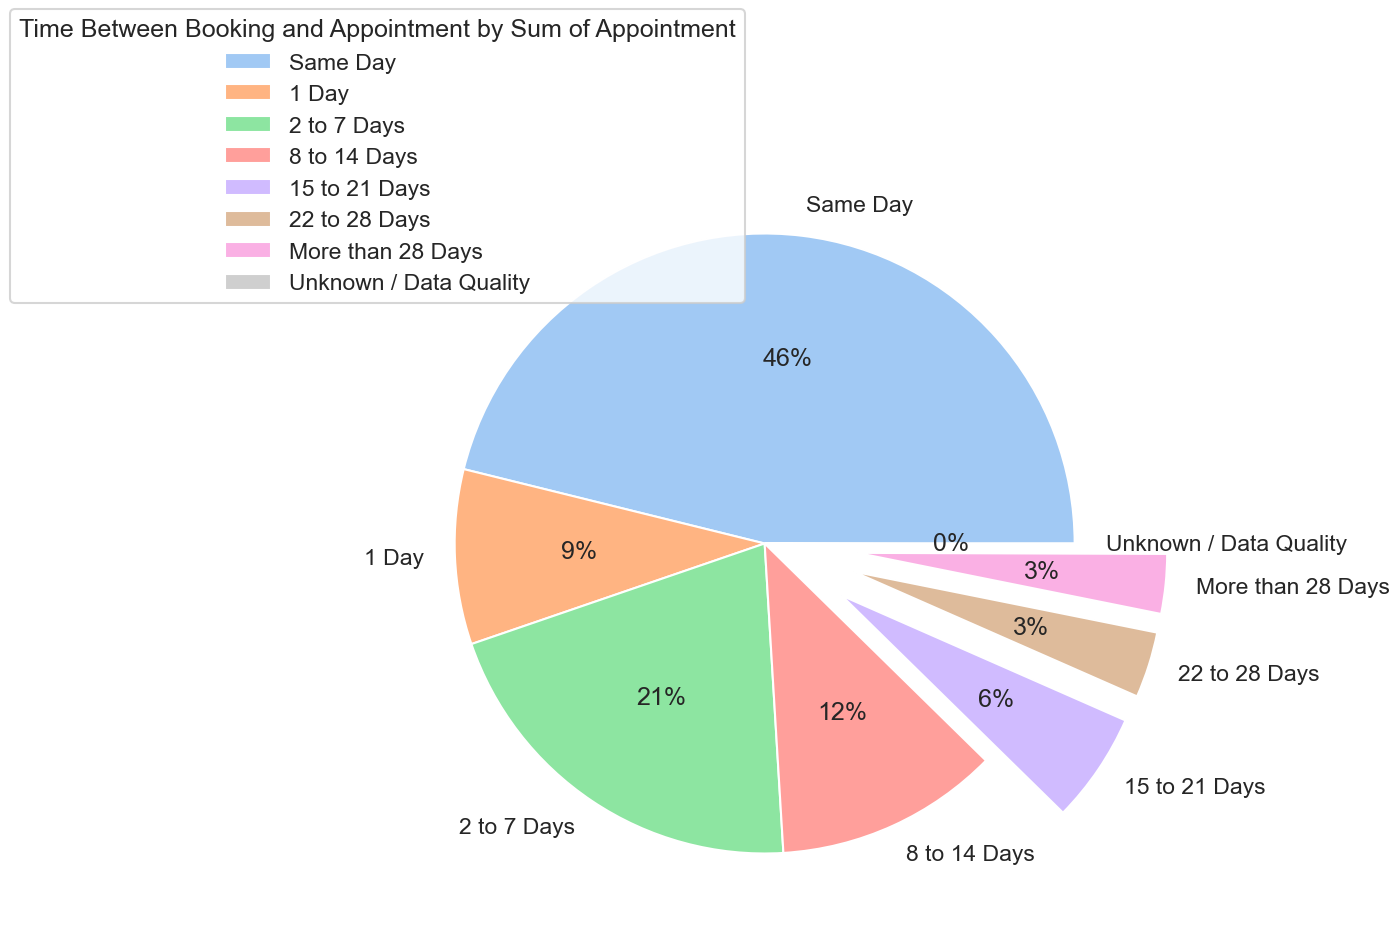

In [486]:
# Pie chart, where the slices will be ordered
# slice of significance have been exploded out for emphasis 


fig = plt.subplots(figsize=(10, 15))
explode = (0.0, 0.0, 0.0, 0.0, 0.3, 0.3, 0.3, 0.0 )

count_of_appointments = [342747171, 67716097, 153794531,86846519,42710574,25536541,23050987, 402105 ]
time_between_book_and_appointment = ['Same Day','1 Day','2 to 7 Days','8 to 14 Days','15 to 21 Days','22 to 28 Days','More than 28 Days','Unknown / Data Quality']


palette_color = sns.color_palette('pastel') 

plt.pie(count_of_appointments, 
        labels=time_between_book_and_appointment, 
        colors=palette_color,
        autopct='%.0f%%',
        explode=explode)

plt.legend(title="Time Between Booking and Appointment by Sum of Appointment",
           loc="center",
           bbox_to_anchor=(0.0, 1, 0.001, 0.0))


plt.show()

__*__ 22 to 28 Days' and 'More than 28 Days' and '15 to 21 Days' account for 12 percent of appointments

__*__ The afformentioned segments have the highest DNA rates

Therefore greater attention will be focused on these areas going forward

# 1.4 Trends and Time Series Exploration 

Changes to some time related data types 

In [487]:
#changing from object to datetime data types 

ar['appointment_month'] = ar['appointment_month'].astype('datetime64[ns]')

ar['appointment_qtr'] = ar['appointment_month'].dt.to_period('Q')

ad['appointment_date'] = ad['appointment_date'].astype('datetime64[ns]')

ad['appointment_month']=ad.appointment_date.dt.strftime("%Y-%m")

covid['date'] = covid['date'].astype('datetime64[ns]')

covid['date']= covid.date.dt.strftime("%Y-%m")

In [488]:
#Sense checking the COVID dataset

covid.head()

areaType areaName   areaCode     date  newCasesBySpecimenDate  \
0   nation  England  E92000001  2023-12                     583   
1   nation  England  E92000001  2023-12                    1040   
2   nation  England  E92000001  2023-12                    1183   
3   nation  England  E92000001  2023-12                     947   
4   nation  England  E92000001  2023-12                     771   

   cumCasesBySpecimenDate  newFirstEpisodesBySpecimenDate  \
0                21024823                             294   
1                21024240                             600   
2                21023200                             703   
3                21022017                             538   
4                21021070                             480   

   cumFirstEpisodesBySpecimenDate  newReinfectionsBySpecimenDate  \
0                        19384397                          289.0   
1                        19384103                          440.0   
2                        19383503                          480.0   
3                        19382800                          409.0   
4                        19382262                          291.0   

   cumReinfectionsBySpecimenDate  
0                      1640426.0  
1                      1640137.0  
2                      1639697.0  
3                      1639217.0  
4                      1638808.0

Plot the line of aggregate count of appointment from the acutal duration dataset 

In [489]:
appts_agg = ar.groupby('appointment_month')['count_of_appointments'].sum()
pd.DataFrame(appts_agg)
appts_agg.reset_index

<bound method Series.reset_index of appointment_month
2020-01-01    27199296
2020-02-01    24104621
2020-03-01    24053468
2020-04-01    16007881
2020-05-01    16417212
2020-06-01    20690805
2020-07-01    22491437
2020-08-01    20150520
2020-09-01    26714255
2020-10-01    28301932
2020-11-01    25061602
2020-12-01    23535936
2021-01-01    22492069
2021-02-01    22399569
2021-03-01    27225424
2021-04-01    23879932
2021-05-01    23508395
2021-06-01    26784182
2021-07-01    25739219
2021-08-01    23852171
2021-09-01    28522501
2021-10-01    30303834
2021-11-01    30405070
2021-12-01    25140776
2022-01-01    25635474
2022-02-01    25355260
2022-03-01    29595038
2022-04-01    23913060
2022-05-01    27495508
2022-06-01    25828078
Name: count_of_appointments, dtype: int64>

Lineplot of aggregage appointment status

<Axes: xlabel='appointment_month', ylabel='count_of_appointments'>

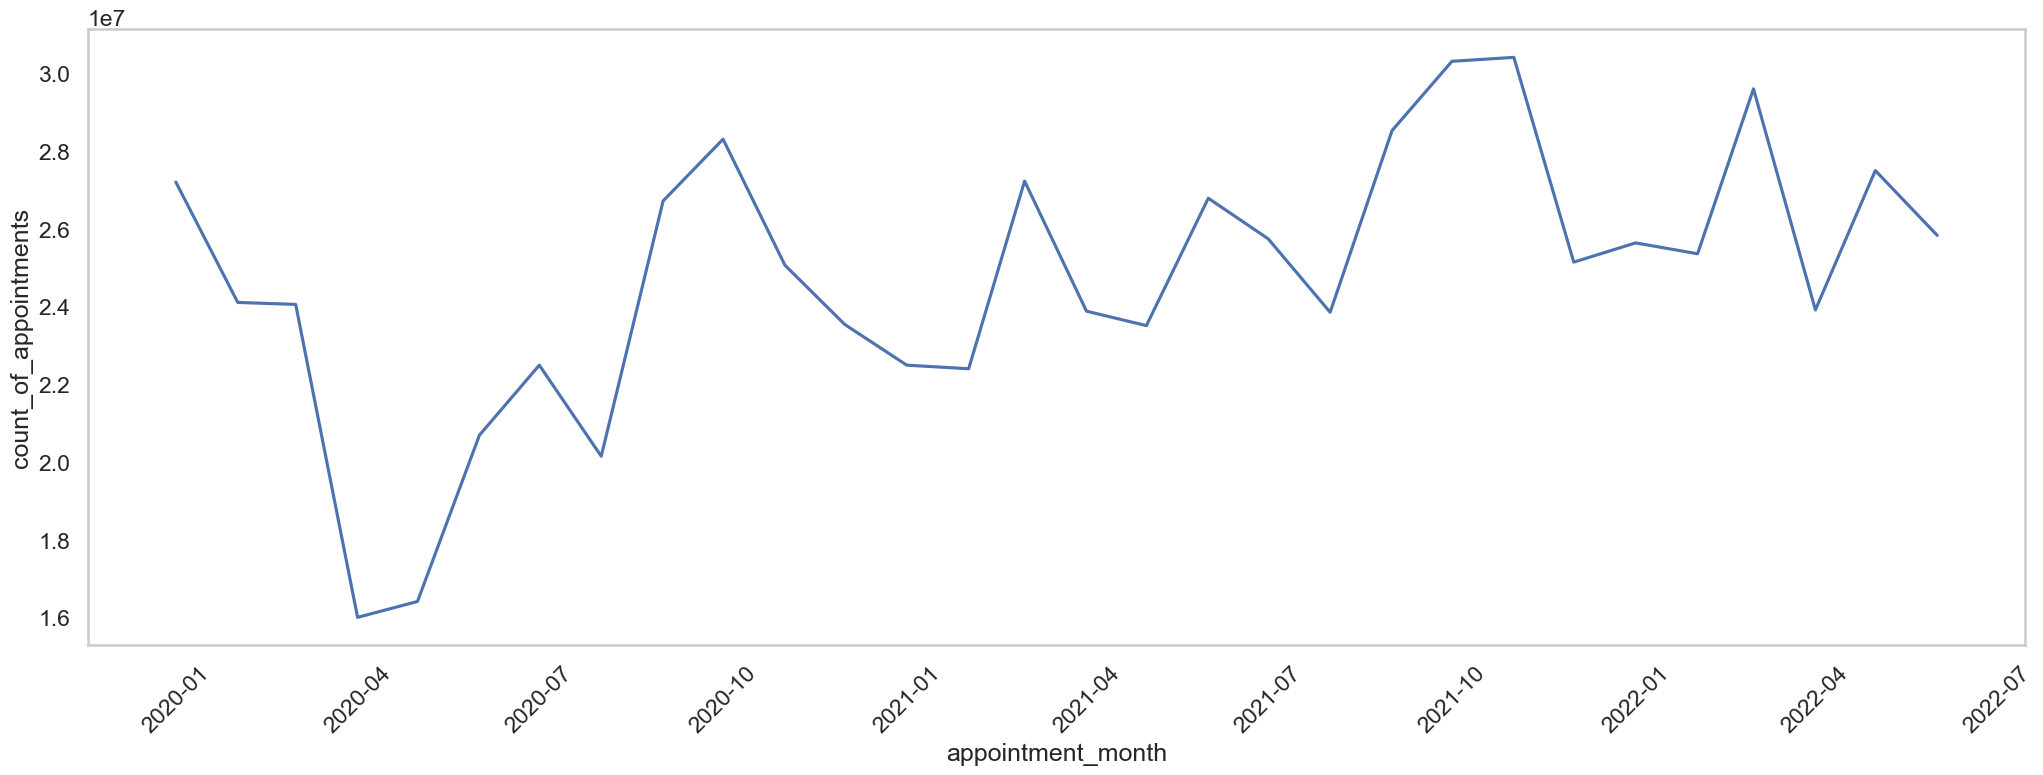

In [490]:
fig = plt.subplots(figsize=(25, 8))
plt.xticks(rotation=45)

plt.rcParams.update({'font.size': 19})

sns.lineplot( data=appts_agg )

Covid Dataset lineplots - is there any correlation between the two and how did both evolve? 

In [491]:
#first preparing the England Covid Data

covid_cases_eng = covid.groupby('date')['newFirstEpisodesBySpecimenDate'].sum()
covid_cases_eng.reset_index().head()

date  newFirstEpisodesBySpecimenDate
0  2020-01                               1
1  2020-02                              68
2  2020-03                           32858
3  2020-04                          118409
4  2020-05                           68273

In [492]:
#Sense checking the imported data

covid_cases_eng.isnull().sum()
covid_cases_eng.info()


<class 'pandas.core.series.Series'>
Index: 48 entries, 2020-01 to 2023-12
Series name: newFirstEpisodesBySpecimenDate
Non-Null Count  Dtype
--------------  -----
48 non-null     int64
dtypes: int64(1)
memory usage: 768.0+ bytes


Shape of the visualisation for covid case in England 2020-1 until 2023-12

<Axes: xlabel='date', ylabel='newFirstEpisodesBySpecimenDate'>

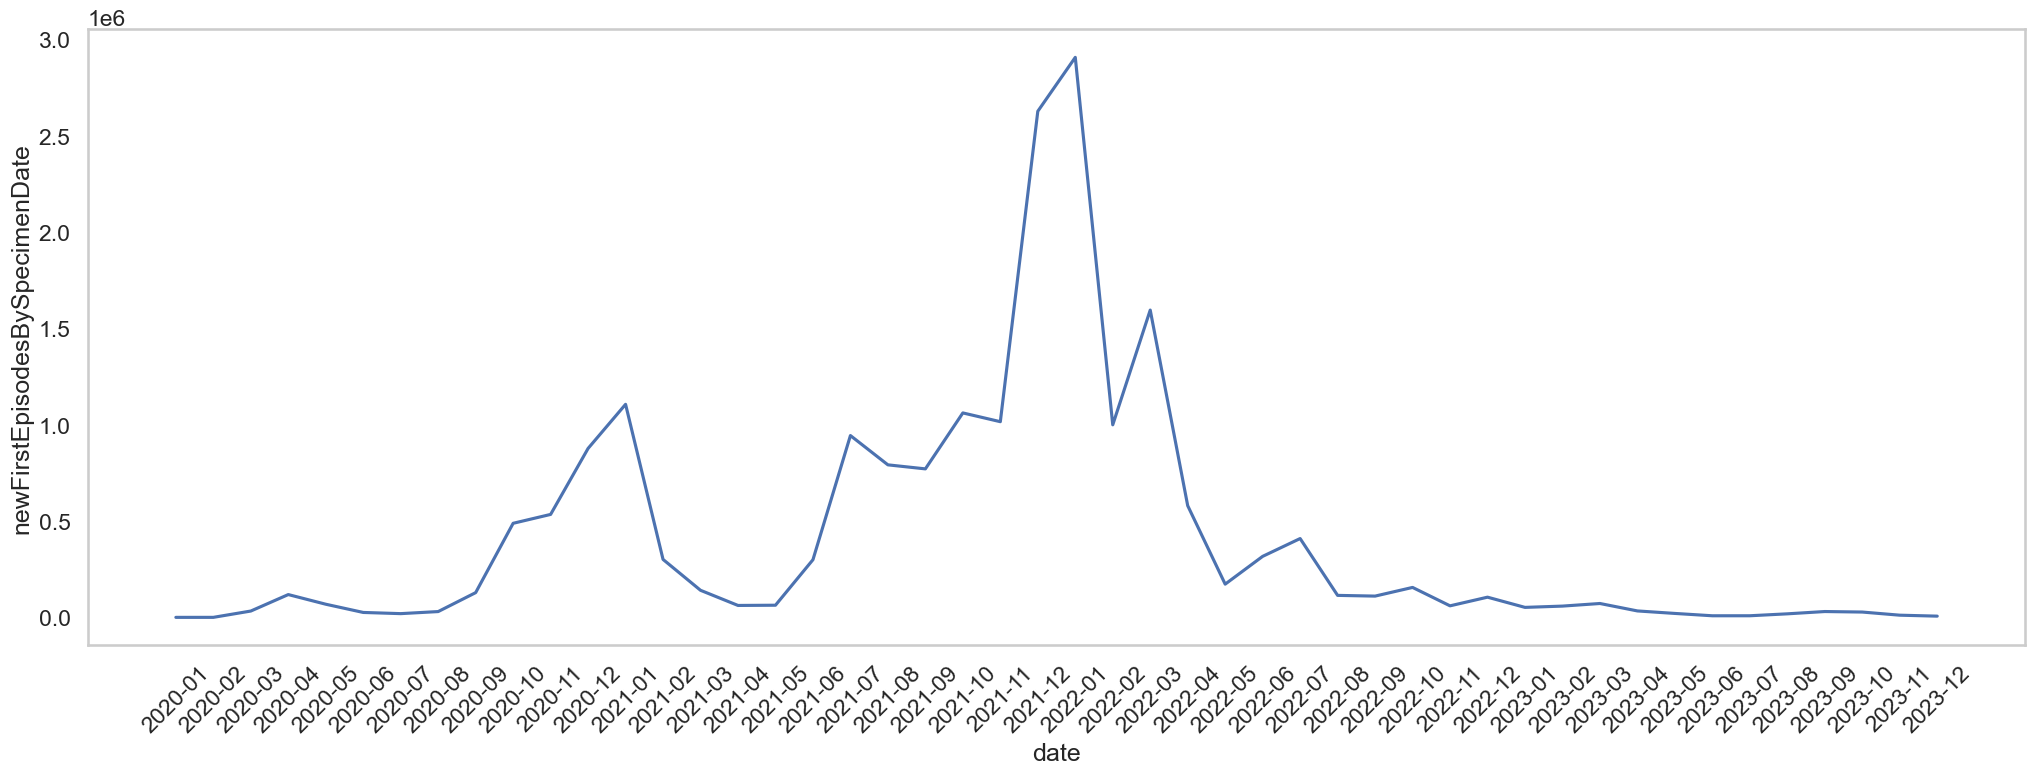

In [493]:


fig = plt.subplots(figsize=(25, 8))
plt.xticks(rotation=45)

plt.rcParams.update({'font.size': 15})

sns.lineplot( data=covid_cases_eng )

Aggregate count of appointment broken out by heathcare profesional (hcp_type) in lineplot

In [494]:
hcp_num = pd.crosstab([ar.appointment_month],
            ar.hcp_type,
            values=ar_sub.count_of_appointments,
            aggfunc='sum')

hcp_num

hcp_type                 GP  Other Practice staff  Unknown
appointment_month                                         
2020-01-01         14168932              12326031   704333
2020-02-01         12467976              11002550   634095
2020-03-01         12839993              10498713   714762
2020-04-01          8795939               6704003   507939
2020-05-01          8924583               6993557   499072
2020-06-01         11054065               9047092   589648
2020-07-01         11701906              10108127   681404
2020-08-01         10481447               9037362   631711
2020-09-01         13187253              12660278   866724
2020-10-01         13182629              14150521   968782
2020-11-01         12501963              11760406   799233
2020-12-01         11759814              11021668   754454
2021-01-01         11806927              10001104   684038
2021-02-01         11827794               9894163   677612
2021-03-01         14391125              11973606   860693
2021-04-01         12462924              10635500   781508
2021-05-01         12334764              10402894   770737
2021-06-01         14050148              11866623   867411
2021-07-01         13338516              11583564   817139
2021-08-01         12299022              10797821   755328
2021-09-01         14487785              13126731   907985
2021-10-01         14300751              14942504  1060579
2021-11-01         14897749              14432800  1074521
2021-12-01         12654767              11614470   871539
2022-01-01         13138050              11705142   792282
2022-02-01         12869711              11688107   797442
2022-03-01         15127227              13528583   939228
2022-04-01         11908463              11217738   786859
2022-05-01         13793934              12823200   878374
2022-06-01         12893983              12105677   828418

<Axes: xlabel='appointment_month'>

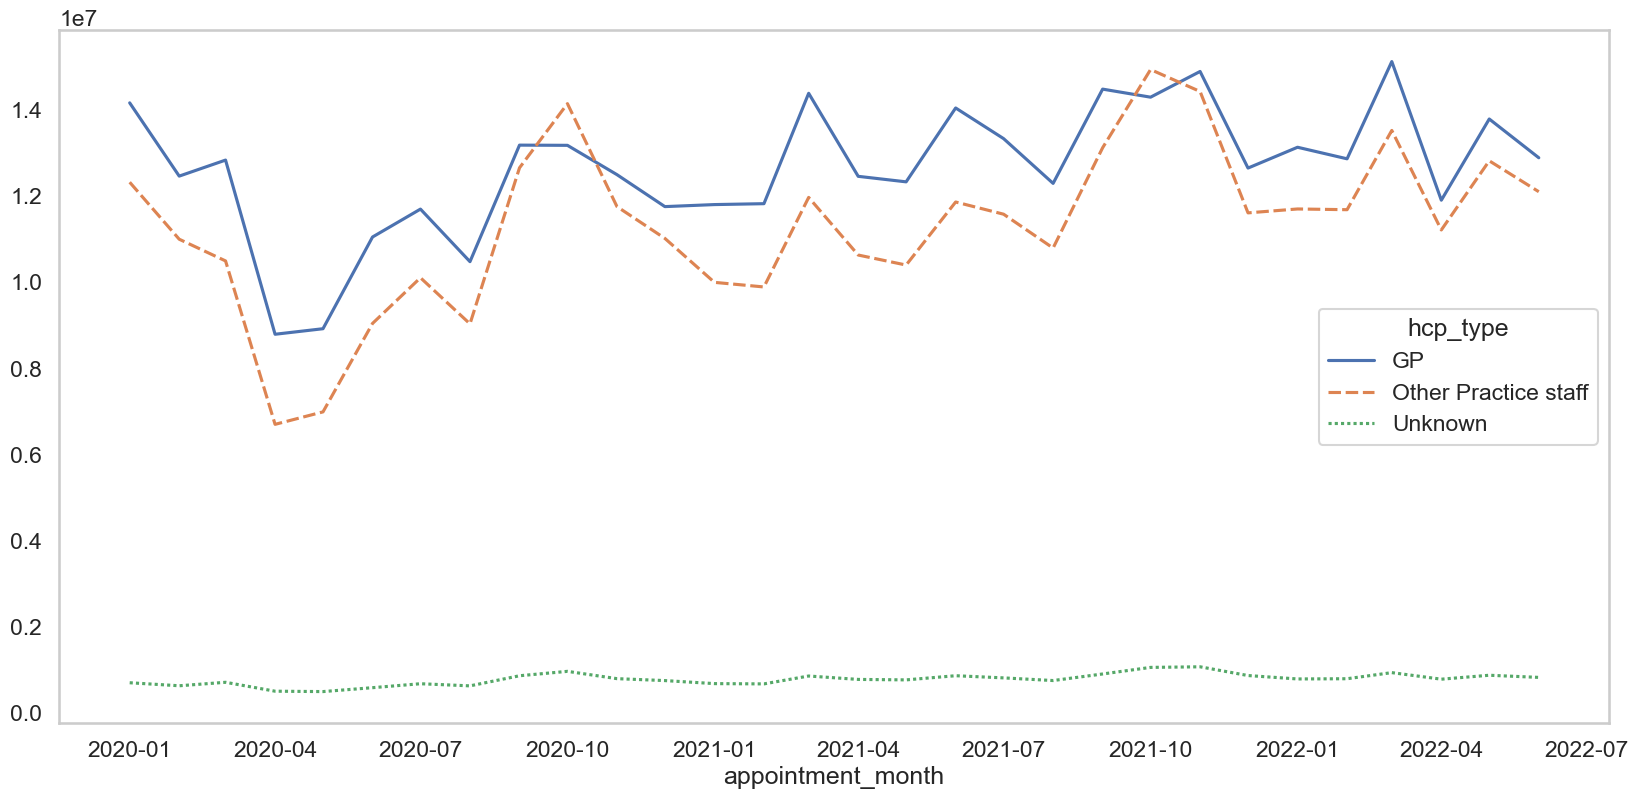

In [495]:

fig = plt.subplots(figsize=(20, 9))

sns.lineplot(data=hcp_num[['GP', 'Other Practice staff', 'Unknown']])

Aggregate count of appointment broken out by appointment mode in lineplot

In [496]:
app_mode_num = pd.crosstab([ar.appointment_month],
            ar.appointment_mode,
            values=ar_sub.count_of_appointments,
            aggfunc='sum')

app_mode_num.head(10)

appointment_mode   Face-to-Face  Home Visit  Telephone  Unknown  Video/Online
appointment_month                                                            
2020-01-01             21733394      266942    3701775  1302979        194206
2020-02-01             19230573      227935    3322242  1151233        172638
2020-03-01             15921794      172773    6637656  1194015        127230
2020-04-01              7480941      100673    7652390   729664         44213
2020-05-01              7729597      112018    7813734   720213         41650
2020-06-01              9763381      133805    9849385   885177         59057
2020-07-01             11184673      140787   10114285   970928         80764
2020-08-01             10388825      119250    8742071   823191         77183
2020-09-01             15092880      148978   10262198  1085917        124282
2020-10-01             16870816      161721    9950370  1181559        137466

<Axes: xlabel='appointment_month'>

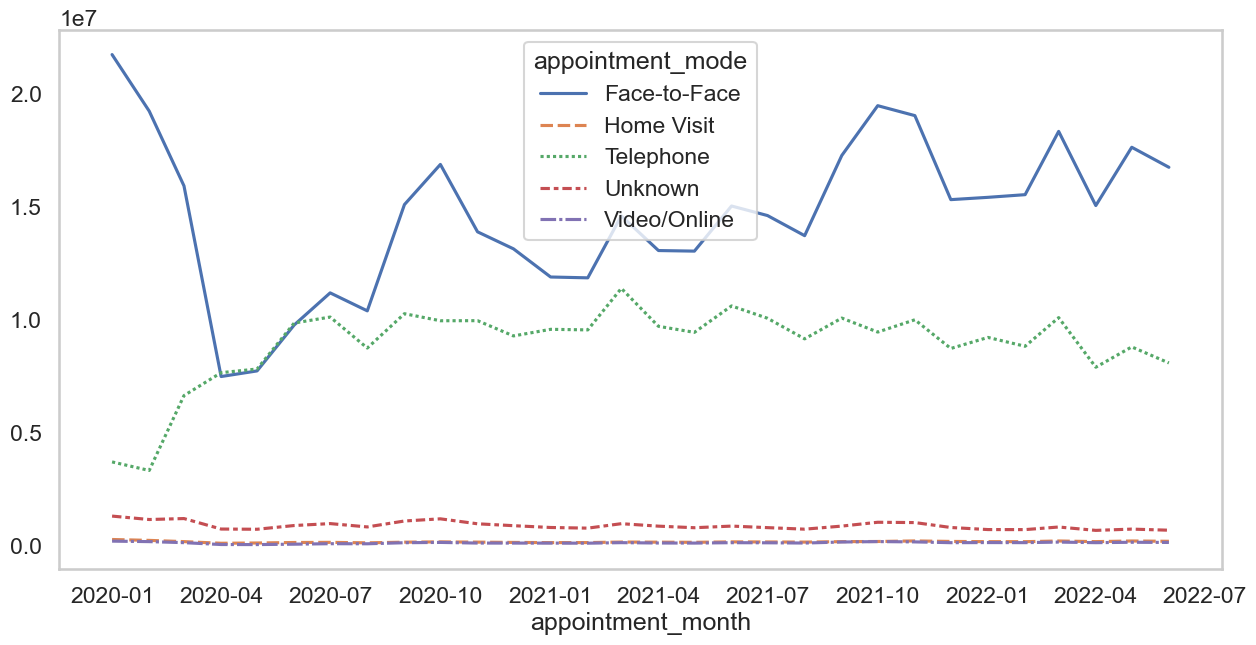

In [497]:
fig = plt.subplots(figsize=(15, 7))
sns.lineplot(data= app_mode_num[['Face-to-Face', 'Home Visit', 'Telephone','Unknown','Video/Online']])

A few comments on the possible effect of the COVID pandemic 

__*__ 1. Look at how the face to face plotline and the telephone lineplot are decoupled , and suddenly at 2020-4 move synchronosly right through until the 2021-10. By Deccember 2021 the vaccine programme - which prioritise healhtcare workers and those most a risk of mortality was in full swing, and we see incresing immunity in the population with a concomittent rise in face to face appointments 


__*__ 2 Note how there is a marked increase in telehealth usage following NHS campaigns to encourage this to protect heath workers from infection. 

__*__ Note also how social distancing seems to have depressed the occurance of normal winter diseases, and thus reducing the seasonal uptick in appointments usually seen in Q4. 



# 1.4.1 A deeper dive into crosstabs

In [498]:
# A closer look at appointment mode across the whole dataset of actual duration in crosstabs

pd.crosstab([ar_sub.appointment_mode,ar_sub.hcp_type],ar_sub.appointment_status,
            values=ar_sub.count_of_appointments,
            aggfunc='sum',   
            margins=True, 
            margins_name="Total")

appointment_status                      Attended       DNA   Unknown  \
appointment_mode hcp_type                                              
Face-to-Face     GP                    167801433   6154242   6961552   
                 Other Practice staff  221064499  17997316  15363717   
                 Unknown                 3840067    101480    697423   
Home Visit       GP                      1467308     49109    408836   
                 Other Practice staff    1690896     65562    466046   
                 Unknown                  453864     72900    213355   
Telephone        GP                    181497143   2963854   4597389   
                 Other Practice staff   69167800   2179623   2997418   
                 Unknown                 4134283    118774    206373   
Unknown          GP                      5336775    209413    329802   
                 Other Practice staff    5652916    480387    782450   
                 Unknown                12345659    359627    954276   
Video/Online     GP                      1744346     52317     76621   
                 Other Practice staff    1553466    106447     81992   
                 Unknown                    5421       182       166   
Total                                  677755876  30911233  34137416   

appointment_status                         Total  
appointment_mode hcp_type                         
Face-to-Face     GP                    180917227  
                 Other Practice staff  254425532  
                 Unknown                 4638970  
Home Visit       GP                      1925253  
                 Other Practice staff    2222504  
                 Unknown                  740119  
Telephone        GP                    189058386  
                 Other Practice staff   74344841  
                 Unknown                 4459430  
Unknown          GP                      5875990  
                 Other Practice staff    6915753  
                 Unknown                13659562  
Video/Online     GP                      1873284  
                 Other Practice staff    1741905  
                 Unknown                    5769  
Total                                  742804525

In [499]:
#DataFrame now normalised to show percentile value at the colum level

df1 = pd.crosstab([ar_sub.appointment_mode,ar_sub.hcp_type],ar_sub.appointment_status,
            values=ar_sub.count_of_appointments,
            aggfunc='sum',
            normalize='index'
            )

df1

appointment_status                     Attended       DNA   Unknown
appointment_mode hcp_type                                          
Face-to-Face     GP                    0.927504  0.034017  0.038479
                 Other Practice staff  0.868877  0.070737  0.060386
                 Unknown               0.827784  0.021876  0.150340
Home Visit       GP                    0.762138  0.025508  0.212354
                 Other Practice staff  0.760807  0.029499  0.209694
                 Unknown               0.613231  0.098498  0.288271
Telephone        GP                    0.960006  0.015677  0.024317
                 Other Practice staff  0.930364  0.029318  0.040318
                 Unknown               0.927088  0.026634  0.046278
Unknown          GP                    0.908234  0.035639  0.056127
                 Other Practice staff  0.817397  0.069463  0.113140
                 Unknown               0.903811  0.026328  0.069861
Video/Online     GP                    0.931170  0.027928  0.040902
                 Other Practice staff  0.891820  0.061110  0.047070
                 Unknown               0.939678  0.031548  0.028774

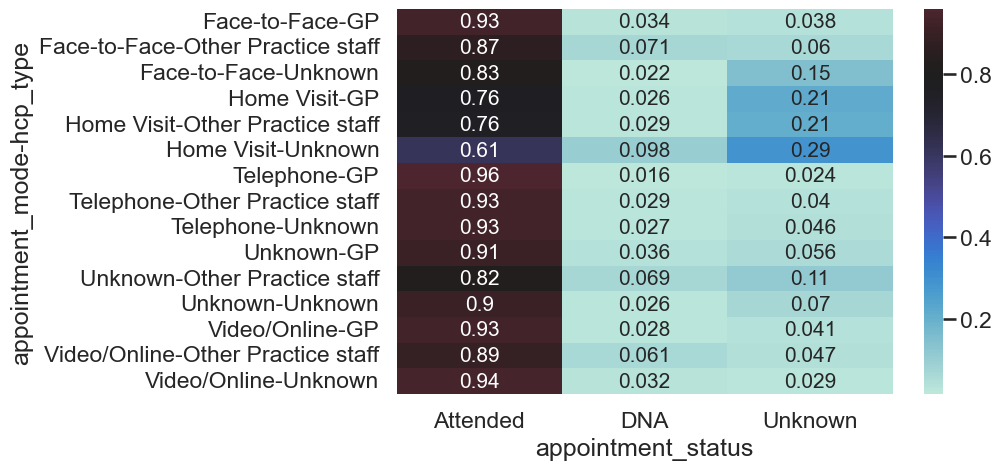

In [500]:
#heatmap with continous colour palette to illustrate outliers in the overall dataset and surface weak signals 


sns.heatmap(pd.crosstab([ar_sub.appointment_mode,ar_sub.hcp_type],ar_sub.appointment_status,
            values=ar_sub.count_of_appointments,
            aggfunc='sum',
            normalize='index'),cmap="BuGn", annot=True, cbar=False)

# plot heatmap
sns.heatmap(df1, center=0.8)
sns.set_context("talk")
plt.show()

(f"The heatmap demonstrates three interesting points in the DNA Column: 

__*__ 1 - the 'Home Visit' appointment mode shows the highest levels of DNA. Unclear form the data whether the healthcare professional or the patience is the cause. 

__*__ 2. face to face mode in  hcp type 'other practice staff' shows the 2nd highest level of DNA. Could this be due to social distancing/COVID related phenomena early in the pandemic? More data needed. 

__*__ 3. Hcp_type 'Other Practice Staff' show the highest levels of DNA. Could it be that patience are less inclined to keep their appointments when they are aware they will not be seeing a Doctor. Appointment lead times also may be a factor where it may be leadtimes of 15 days or more allows patience to recover from short lived viral illness and thereby leave them less inclined to keep their appointment       

# 2.0  Closer Examination of DNA rates and IQR

First we subset and normalise the data on appointment mode

In [501]:
#normalising the data in the crosstab

appt_qtr_ons_status = pd.crosstab([ar.appointment_qtr,
                                   ar.icb_ons_code,
                                   ar.hcp_type,ar.appointment_mode],
                                  ar.appointment_status,
                                  normalize='index')
appt_qtr_ons_status.head()

appointment_status                                      Attended       DNA  \
appointment_qtr icb_ons_code hcp_type appointment_mode                       
2020Q1          E54000008    GP       Face-to-Face      0.344942  0.325041   
                                      Home Visit        0.452450  0.175793   
                                      Telephone         0.356506  0.304813   
                                      Unknown           0.370166  0.325967   
                                      Video/Online      0.324324  0.229730   

appointment_status                                       Unknown  
appointment_qtr icb_ons_code hcp_type appointment_mode            
2020Q1          E54000008    GP       Face-to-Face      0.330017  
                                      Home Visit        0.371758  
                                      Telephone         0.338681  
                                      Unknown           0.303867  
                                      Video/Online      0.445946

In [502]:
#we also have a view of the absolute numbers too

pd.crosstab([ar.appointment_qtr,ar.icb_ons_code,ar.hcp_type,ar.appointment_mode],ar.appointment_status)





appointment_status                                                  Attended  \
appointment_qtr icb_ons_code hcp_type             appointment_mode             
2020Q1          E54000008    GP                   Face-to-Face           208   
                                                  Home Visit             157   
                                                  Telephone              200   
                                                  Unknown                 67   
                                                  Video/Online            24   
...                                                                      ...   
2022Q2          E54000062    Other Practice staff Video/Online            21   
                             Unknown              Face-to-Face            24   
                                                  Home Visit              18   
                                                  Telephone               21   
                                                  Unknown                 24   

appointment_status                                                  DNA  \
appointment_qtr icb_ons_code hcp_type             appointment_mode        
2020Q1          E54000008    GP                   Face-to-Face      196   
                                                  Home Visit         61   
                                                  Telephone         171   
                                                  Unknown            59   
                                                  Video/Online       17   
...                                                                 ...   
2022Q2          E54000062    Other Practice staff Video/Online       20   
                             Unknown              Face-to-Face       21   
                                                  Home Visit         21   
                                                  Telephone          10   
                                                  Unknown            21   

appointment_status                                                  Unknown  
appointment_qtr icb_ons_code hcp_type             appointment_mode           
2020Q1          E54000008    GP                   Face-to-Face          199  
                                                  Home Visit            129  
                                                  Telephone             190  
                                                  Unknown                55  
                                                  Video/Online           33  
...                                                                     ...  
2022Q2          E54000062    Other Practice staff Video/Online           13  
                             Unknown              Face-to-Face           24  
                                                  Home Visit             17  
                                                  Telephone              15  
                                                  Unknown                21  

[5577 rows x 3 columns]

In [503]:
#to create a 'Total column we create a dataframe with asolute numbers '

for_contact = pd.crosstab([ar.appointment_qtr,ar.icb_ons_code,ar.hcp_type,ar.appointment_mode],ar.appointment_status)

In [504]:
#creating the column to be attached to the final normalized dataset by concatination 

#df.loc[:,'Total'] = df.sum(axis=1)


for_contact.loc[:,'Total'] = for_contact.sum(axis=1)

In [505]:
pd.DataFrame(for_contact['Total'])
c = for_contact['Total']


In [506]:
appt_qtr_ons_status.head()

appointment_status                                      Attended       DNA  \
appointment_qtr icb_ons_code hcp_type appointment_mode                       
2020Q1          E54000008    GP       Face-to-Face      0.344942  0.325041   
                                      Home Visit        0.452450  0.175793   
                                      Telephone         0.356506  0.304813   
                                      Unknown           0.370166  0.325967   
                                      Video/Online      0.324324  0.229730   

appointment_status                                       Unknown  
appointment_qtr icb_ons_code hcp_type appointment_mode            
2020Q1          E54000008    GP       Face-to-Face      0.330017  
                                      Home Visit        0.371758  
                                      Telephone         0.338681  
                                      Unknown           0.303867  
                                      Video/Online      0.445946

In [507]:
# horizontal_concat = pd.concat([df1, df2], axis=1)

appt_qtr_ons_status = pd.concat([appt_qtr_ons_status,c], axis=1)
appt_qtr_ons_status.head()

Attended       DNA  \
appointment_qtr icb_ons_code hcp_type appointment_mode                       
2020Q1          E54000008    GP       Face-to-Face      0.344942  0.325041   
                                      Home Visit        0.452450  0.175793   
                                      Telephone         0.356506  0.304813   
                                      Unknown           0.370166  0.325967   
                                      Video/Online      0.324324  0.229730   

                                                         Unknown  Total  
appointment_qtr icb_ons_code hcp_type appointment_mode                   
2020Q1          E54000008    GP       Face-to-Face      0.330017    603  
                                      Home Visit        0.371758    347  
                                      Telephone         0.338681    561  
                                      Unknown           0.303867    181  
                                      Video/Online      0.445946     74

N.B the crosstab above combined normalized data and real absolute numbers in the 'total' column,  a column on which the IQR will later be based

In [508]:
appt_qtr_ons_status["DNA"].describe()

count    5577.000000
mean        0.244346
std         0.101490
min         0.000000
25%         0.187500
50%         0.288136
75%         0.316583
max         1.000000
Name: DNA, dtype: float64

In [509]:
appt_qtr_ons_status["Total"].describe()

count    5577.000000
mean      107.014703
std       119.538885
min         1.000000
25%        46.000000
50%        67.000000
75%       119.000000
max       689.000000
Name: Total, dtype: float64

So from here we calculate the interquartile range of the 'Total' column to isolate the values we will use going forward and exclude outliers. 

In [510]:
# calculate IQR for column Height
Q1 = appt_qtr_ons_status['Total'].quantile(0.25)
Q3 = appt_qtr_ons_status['Total'].quantile(0.75)
IQR = Q3 - Q1


In [511]:
# identify outliers
threshold = 1.5
outliers = appt_qtr_ons_status[(appt_qtr_ons_status['Total'] < Q1 - threshold * IQR) | (appt_qtr_ons_status['Total'] > Q3 + threshold * IQR)]

      Visual Representation in Seaborn Boxplot of IQR of number of appointments in Appointments Regional dataset

In [512]:
LowerWhisker = np.max([appt_qtr_ons_status['Total'].min() , Q1-1.5*IQR])
LowerWhisker

1.0

In [513]:
UpperWhisker = np.min([appt_qtr_ons_status['Total'].max() , Q3 + 1.5 * IQR])
UpperWhisker

228.5

<Axes: ylabel='Total'>

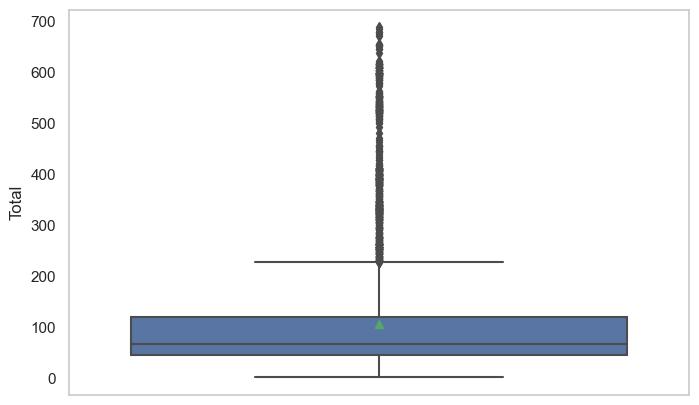

In [514]:
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("whitegrid", {'axes.grid' : False})
sns.boxplot(y=appt_qtr_ons_status['Total'], orient='v', showmeans=True)

 We can conclude here there the distribution is skweeded to the right here. 
 The green triangle shows the mean value. 

In [515]:
# drop rows containing outliers
appt_qtr_ons_statusIQR = appt_qtr_ons_status.drop(outliers.index)

In [516]:
appt_qtr_ons_statusIQR.shape

(4958, 4)

In [517]:
# get descritive statistics on the column 'Total'

appt_qtr_ons_statusIQR['Total'].describe()

count    4958.000000
mean       70.800323
std        49.387469
min         1.000000
25%        43.000000
50%        64.000000
75%        71.000000
max       228.000000
Name: Total, dtype: float64

In [518]:
#get an initial view on the location with the highest percentage of 'DNA' appointment count

appt_qtr_ons_statusIQR.nlargest(100, columns='DNA')

Attended  \
appointment_qtr icb_ons_code hcp_type             appointment_mode             
2020Q4          E54000015    Unknown              Face-to-Face      0.000000   
                E54000018    Unknown              Video/Online      0.000000   
2021Q3          E54000051    GP                   Unknown           0.000000   
2021Q4          E54000024    Other Practice staff Unknown           0.000000   
2020Q2          E54000062    GP                   Unknown           0.222222   
...                                                                      ...   
2021Q1          E54000040    Other Practice staff Video/Online      0.437500   
2020Q1          E54000010    Other Practice staff Unknown           0.323077   
                E54000029    Other Practice staff Unknown           0.323077   
                E54000034    Other Practice staff Unknown           0.323077   
                E54000055    GP                   Unknown           0.323077   

                                                                         DNA  \
appointment_qtr icb_ons_code hcp_type             appointment_mode             
2020Q4          E54000015    Unknown              Face-to-Face      1.000000   
                E54000018    Unknown              Video/Online      1.000000   
2021Q3          E54000051    GP                   Unknown           1.000000   
2021Q4          E54000024    Other Practice staff Unknown           1.000000   
2020Q2          E54000062    GP                   Unknown           0.722222   
...                                                                      ...   
2021Q1          E54000040    Other Practice staff Video/Online      0.354167   
2020Q1          E54000010    Other Practice staff Unknown           0.353846   
                E54000029    Other Practice staff Unknown           0.353846   
                E54000034    Other Practice staff Unknown           0.353846   
                E54000055    GP                   Unknown           0.353846   

                                                                     Unknown  \
appointment_qtr icb_ons_code hcp_type             appointment_mode             
2020Q4          E54000015    Unknown              Face-to-Face      0.000000   
                E54000018    Unknown              Video/Online      0.000000   
2021Q3          E54000051    GP                   Unknown           0.000000   
2021Q4          E54000024    Other Practice staff Unknown           0.000000   
2020Q2          E54000062    GP                   Unknown           0.055556   
...                                                                      ...   
2021Q1          E54000040    Other Practice staff Video/Online      0.208333   
2020Q1          E54000010    Other Practice staff Unknown           0.323077   
                E54000029    Other Practice staff Unknown           0.323077   
                E54000034    Other Practice staff Unknown           0.323077   
                E54000055    GP                   Unknown           0.323077   

                                                                    Total  
appointment_qtr icb_ons_code hcp_type             appointment_mode         
2020Q4          E54000015    Unknown              Face-to-Face          1  
                E54000018    Unknown              Video/Online          1  
2021Q3          E54000051    GP                   Unknown               1  
2021Q4          E54000024    Other Practice staff Unknown               1  
2020Q2          E54000062    GP                   Unknown              18  
...                                                                   ...  
2021Q1          E54000040    Other Practice staff Video/Online         48  
2020Q1          E54000010    Other Practice staff Unknown              65  
                E54000029    Other Practice staff Unknown              65  
                E54000034    Other Practice staff Unknown              65  
                E54000055    GP  

In [519]:
print(appt_qtr_ons_statusIQR['Total'].min())
print(appt_qtr_ons_statusIQR['Total'].max())
print(appt_qtr_ons_statusIQR['Total'].mean())
print(appt_qtr_ons_statusIQR['Total'].std())

1
228
70.80032271077047
49.38746920098105


In [520]:
# get descritive statistics on the column 'DNA'

appt_qtr_ons_statusIQR['DNA'].describe()

count    4958.000000
mean        0.239789
std         0.104704
min         0.000000
25%         0.181818
50%         0.280000
75%         0.314286
max         1.000000
Name: DNA, dtype: float64

In [521]:
IQR_make_up_hcp = appt_qtr_ons_statusIQR.groupby('hcp_type').size()
IQR_make_up_hcp.reset_index
pd.DataFrame(IQR_make_up_hcp)


0
hcp_type                  
GP                    1770
Other Practice staff  1747
Unknown               1441

In [522]:
IQR_make_up_appt_mode = appt_qtr_ons_statusIQR.groupby('appointment_mode').size()
pd.DataFrame(IQR_make_up_appt_mode)

0
appointment_mode      
Face-to-Face      1013
Home Visit        1105
Telephone         1019
Unknown            893
Video/Online       928

In [523]:
print (ar.groupby('hcp_type').size())


hcp_type
GP                      226036
Other Practice staff    241557
Unknown                 129228
dtype: int64


In [524]:
print (ar.groupby('appointment_mode').size())

appointment_mode
Face-to-Face    180410
Home Visit      111194
Telephone       166483
Unknown          79147
Video/Online     59587
dtype: int64


# 3.0  Activity 6 Questions 

Question: Create a new DataFrame and group the month of appointment and number of appointments

In [525]:
ar_df = ar.groupby('appointment_month')['count_of_appointments'].sum()
ar_df.head(5)

appointment_month
2020-01-01    27199296
2020-02-01    24104621
2020-03-01    24053468
2020-04-01    16007881
2020-05-01    16417212
Name: count_of_appointments, dtype: int64

In [526]:
ar_agg = ar[[ 'hcp_type', 'appointment_status', 'appointment_mode','time_between_book_and_appointment','count_of_appointments']]
ar_agg.columns


Index(['hcp_type', 'appointment_status', 'appointment_mode',
       'time_between_book_and_appointment', 'count_of_appointments'],
      dtype='object')

In [527]:
ar_agg.groupby('appointment_status')['count_of_appointments'].sum()
pd.DataFrame(ar_agg)



hcp_type appointment_status appointment_mode  \
0            GP           Attended     Face-to-Face   
1            GP           Attended     Face-to-Face   
2            GP           Attended     Face-to-Face   
3            GP           Attended     Face-to-Face   
4            GP           Attended     Face-to-Face   
...         ...                ...              ...   
596816  Unknown            Unknown          Unknown   
596817  Unknown            Unknown          Unknown   
596818  Unknown            Unknown          Unknown   
596819  Unknown            Unknown          Unknown   
596820  Unknown            Unknown          Unknown   

       time_between_book_and_appointment  count_of_appointments  
0                                  1 Day                   8107  
1                         15  to 21 Days                   6791  
2                            2 to 7 Days                  20686  
3                         22  to 28 Days                   4268  
4                          8  to 14 Days                  11971  
...                                  ...                    ...  
596816                       2 to 7 Days                     21  
596817                    22  to 28 Days                      8  
596818                     8  to 14 Days                     28  
596819                 More than 28 Days                     17  
596820                          Same Day                     10  

[596821 rows x 5 columns]

In [528]:
ar_agg_sum = ar_agg.groupby('hcp_type')['count_of_appointments'].sum()
ar_agg_sum.reset_index()

hcp_type  count_of_appointments
0                    GP              379650140
1  Other Practice staff              339650535
2               Unknown               23503850

In [529]:
ar_agg_sum.sum()

742804525

In [530]:
#changing datatype out of datetime to avoid error

ar['appointment_month'] = ar['appointment_month'].astype('object')

ar_df = ar.groupby('appointment_month')['count_of_appointments'].sum()

pd.DataFrame(ar_df)

ar_df = ar_df.reset_index()

ar_df


appointment_month  count_of_appointments
0         2020-01-01               27199296
1         2020-02-01               24104621
2         2020-03-01               24053468
3         2020-04-01               16007881
4         2020-05-01               16417212
5         2020-06-01               20690805
6         2020-07-01               22491437
7         2020-08-01               20150520
8         2020-09-01               26714255
9         2020-10-01               28301932
10        2020-11-01               25061602
11        2020-12-01               23535936
12        2021-01-01               22492069
13        2021-02-01               22399569
14        2021-03-01               27225424
15        2021-04-01               23879932
16        2021-05-01               23508395
17        2021-06-01               26784182
18        2021-07-01               25739219
19        2021-08-01               23852171
20        2021-09-01               28522501
21        2021-10-01               30303834
22        2021-11-01               30405070
23        2021-12-01               25140776
24        2022-01-01               25635474
25        2022-02-01               25355260
26        2022-03-01               29595038
27        2022-04-01               23913060
28        2022-05-01               27495508
29        2022-06-01               25828078

Visualisation of count_of_appointments over time 

In [531]:
#monthly capacity calculation 

ar_df_cap = ar_df.assign(monthly_cap_use_percentage =lambda x: x.count_of_appointments / nhs_appt_capacity_month)


ar_df_cap

appointment_month  count_of_appointments  monthly_cap_use_percentage
0         2020-01-01               27199296                    0.755536
1         2020-02-01               24104621                    0.669573
2         2020-03-01               24053468                    0.668152
3         2020-04-01               16007881                    0.444663
4         2020-05-01               16417212                    0.456034
5         2020-06-01               20690805                    0.574745
6         2020-07-01               22491437                    0.624762
7         2020-08-01               20150520                    0.559737
8         2020-09-01               26714255                    0.742063
9         2020-10-01               28301932                    0.786165
10        2020-11-01               25061602                    0.696156
11        2020-12-01               23535936                    0.653776
12        2021-01-01               22492069                    0.624780
13        2021-02-01               22399569                    0.622210
14        2021-03-01               27225424                    0.756262
15        2021-04-01               23879932                    0.663331
16        2021-05-01               23508395                    0.653011
17        2021-06-01               26784182                    0.744005
18        2021-07-01               25739219                    0.714978
19        2021-08-01               23852171                    0.662560
20        2021-09-01               28522501                    0.792292
21        2021-10-01               30303834                    0.841773
22        2021-11-01               30405070                    0.844585
23        2021-12-01               25140776                    0.698355
24        2022-01-01               25635474                    0.712097
25        2022-02-01               25355260                    0.704313
26        2022-03-01               29595038                    0.822084
27        2022-04-01               23913060                    0.664252
28        2022-05-01               27495508                    0.763764
29        2022-06-01               25828078                    0.717447

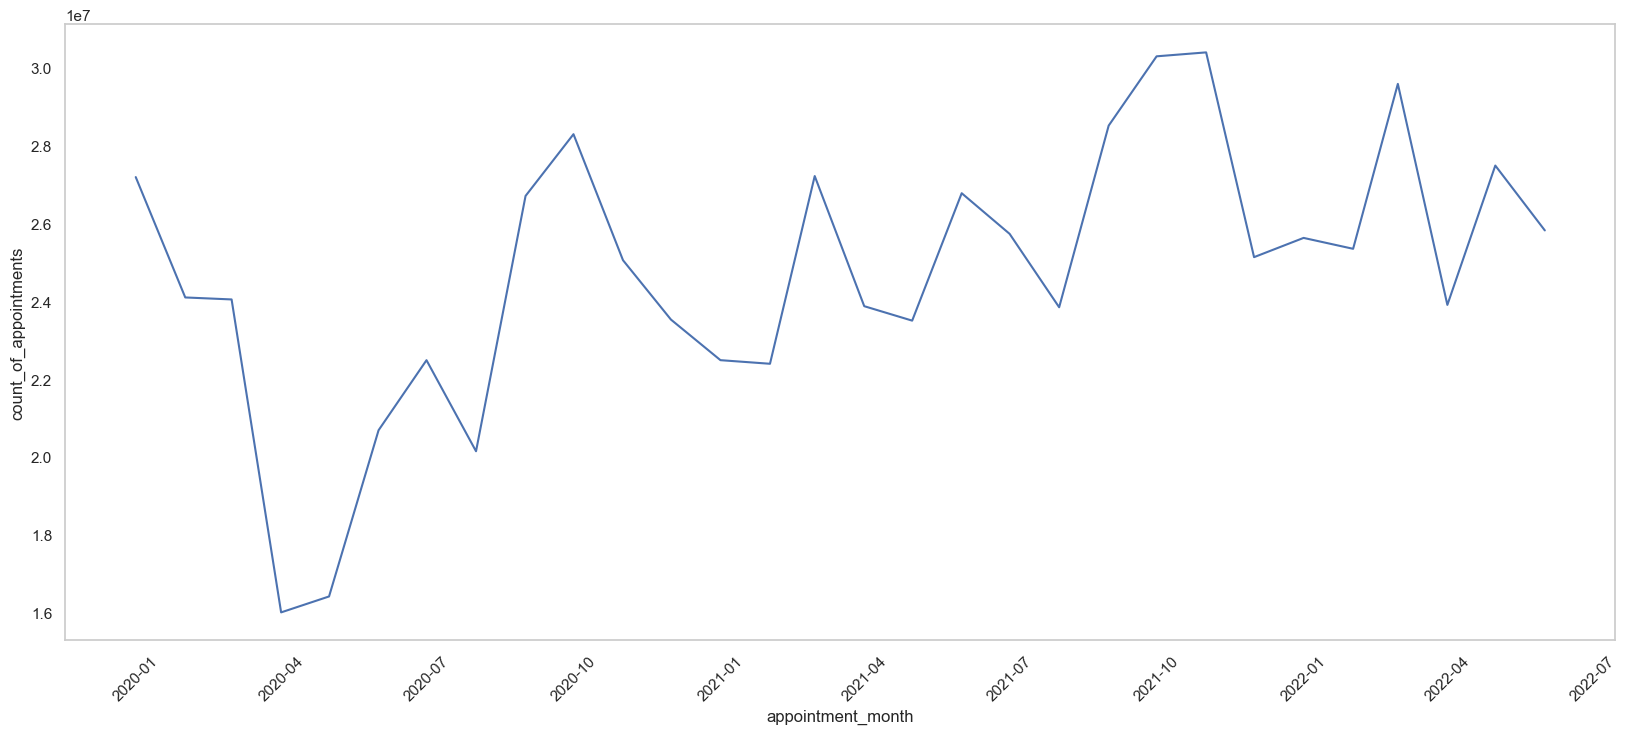

In [532]:
fig = plt.subplots(figsize=(20, 8))
plt.xticks(rotation=45)

sns.lineplot(x="appointment_month", y="count_of_appointments", data=ar_df_cap) 
plt.show()

Calculating Utilisation using lamda function

In [533]:
ar_df.assign(utilisation=lambda x: x.count_of_appointments / 30)




appointment_month  count_of_appointments   utilisation
0         2020-01-01               27199296  9.066432e+05
1         2020-02-01               24104621  8.034874e+05
2         2020-03-01               24053468  8.017823e+05
3         2020-04-01               16007881  5.335960e+05
4         2020-05-01               16417212  5.472404e+05
5         2020-06-01               20690805  6.896935e+05
6         2020-07-01               22491437  7.497146e+05
7         2020-08-01               20150520  6.716840e+05
8         2020-09-01               26714255  8.904752e+05
9         2020-10-01               28301932  9.433977e+05
10        2020-11-01               25061602  8.353867e+05
11        2020-12-01               23535936  7.845312e+05
12        2021-01-01               22492069  7.497356e+05
13        2021-02-01               22399569  7.466523e+05
14        2021-03-01               27225424  9.075141e+05
15        2021-04-01               23879932  7.959977e+05
16        2021-05-01               23508395  7.836132e+05
17        2021-06-01               26784182  8.928061e+05
18        2021-07-01               25739219  8.579740e+05
19        2021-08-01               23852171  7.950724e+05
20        2021-09-01               28522501  9.507500e+05
21        2021-10-01               30303834  1.010128e+06
22        2021-11-01               30405070  1.013502e+06
23        2021-12-01               25140776  8.380259e+05
24        2022-01-01               25635474  8.545158e+05
25        2022-02-01               25355260  8.451753e+05
26        2022-03-01               29595038  9.865013e+05
27        2022-04-01               23913060  7.971020e+05
28        2022-05-01               27495508  9.165169e+05
29        2022-06-01               25828078  8.609359e+05

In [534]:
#calculating capacity reverse engineers the numbers of 1.2M multiplied by 30 days (representing 1 month)

nhs_appt_capacity_month = (1200000 * 30 )
print(nhs_appt_capacity_month)

36000000


In [535]:
#monthly capacity calculation 

ar_df_cap = ar_df.assign(monthly_cap_use_percentage =lambda x: x.count_of_appointments / nhs_appt_capacity_month)


ar_df_cap

appointment_month  count_of_appointments  monthly_cap_use_percentage
0         2020-01-01               27199296                    0.755536
1         2020-02-01               24104621                    0.669573
2         2020-03-01               24053468                    0.668152
3         2020-04-01               16007881                    0.444663
4         2020-05-01               16417212                    0.456034
5         2020-06-01               20690805                    0.574745
6         2020-07-01               22491437                    0.624762
7         2020-08-01               20150520                    0.559737
8         2020-09-01               26714255                    0.742063
9         2020-10-01               28301932                    0.786165
10        2020-11-01               25061602                    0.696156
11        2020-12-01               23535936                    0.653776
12        2021-01-01               22492069                    0.624780
13        2021-02-01               22399569                    0.622210
14        2021-03-01               27225424                    0.756262
15        2021-04-01               23879932                    0.663331
16        2021-05-01               23508395                    0.653011
17        2021-06-01               26784182                    0.744005
18        2021-07-01               25739219                    0.714978
19        2021-08-01               23852171                    0.662560
20        2021-09-01               28522501                    0.792292
21        2021-10-01               30303834                    0.841773
22        2021-11-01               30405070                    0.844585
23        2021-12-01               25140776                    0.698355
24        2022-01-01               25635474                    0.712097
25        2022-02-01               25355260                    0.704313
26        2022-03-01               29595038                    0.822084
27        2022-04-01               23913060                    0.664252
28        2022-05-01               27495508                    0.763764
29        2022-06-01               25828078                    0.717447

In [536]:
#changing datatype of appointment_month to string for ease of visualisation

ar_df_cap = ar_df.assign(monthly_cap_use_percentage =lambda x: x.count_of_appointments / nhs_appt_capacity_month)
ar_df_cap




appointment_month  count_of_appointments  monthly_cap_use_percentage
0         2020-01-01               27199296                    0.755536
1         2020-02-01               24104621                    0.669573
2         2020-03-01               24053468                    0.668152
3         2020-04-01               16007881                    0.444663
4         2020-05-01               16417212                    0.456034
5         2020-06-01               20690805                    0.574745
6         2020-07-01               22491437                    0.624762
7         2020-08-01               20150520                    0.559737
8         2020-09-01               26714255                    0.742063
9         2020-10-01               28301932                    0.786165
10        2020-11-01               25061602                    0.696156
11        2020-12-01               23535936                    0.653776
12        2021-01-01               22492069                    0.624780
13        2021-02-01               22399569                    0.622210
14        2021-03-01               27225424                    0.756262
15        2021-04-01               23879932                    0.663331
16        2021-05-01               23508395                    0.653011
17        2021-06-01               26784182                    0.744005
18        2021-07-01               25739219                    0.714978
19        2021-08-01               23852171                    0.662560
20        2021-09-01               28522501                    0.792292
21        2021-10-01               30303834                    0.841773
22        2021-11-01               30405070                    0.844585
23        2021-12-01               25140776                    0.698355
24        2022-01-01               25635474                    0.712097
25        2022-02-01               25355260                    0.704313
26        2022-03-01               29595038                    0.822084
27        2022-04-01               23913060                    0.664252
28        2022-05-01               27495508                    0.763764
29        2022-06-01               25828078                    0.717447

Plot below shows the utlization of appointment capacity

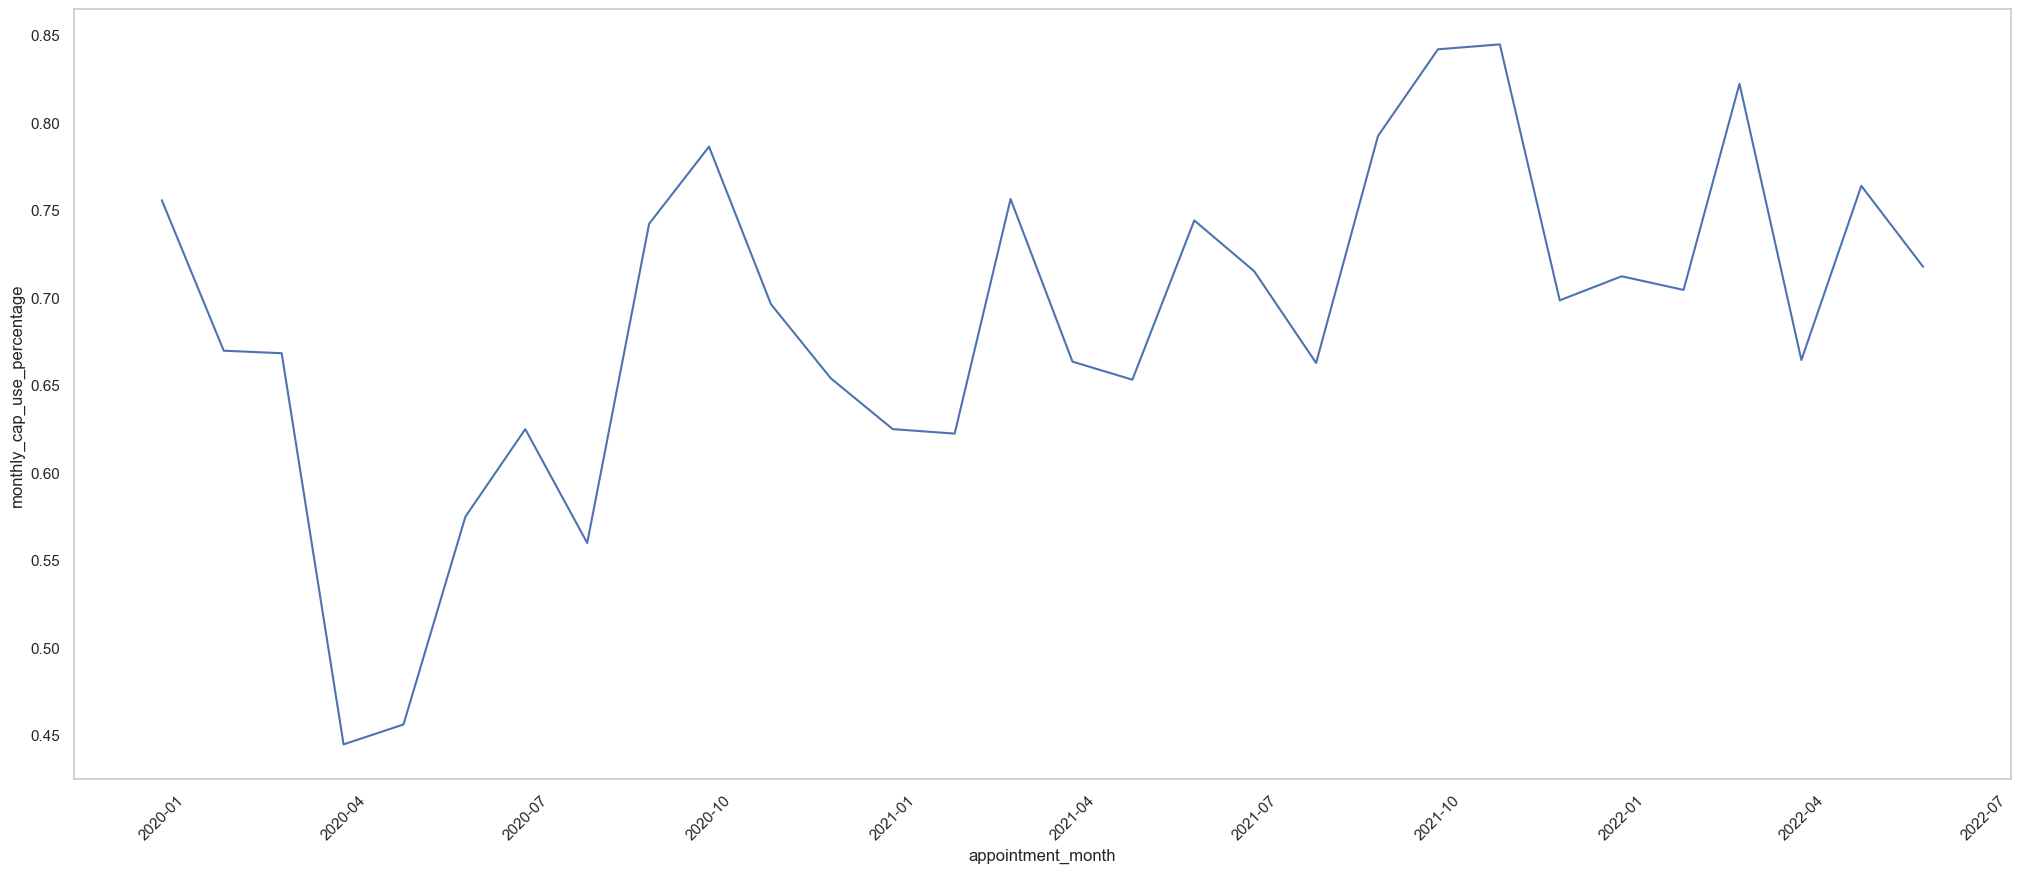

In [537]:
fig = plt.subplots(figsize=(25, 10))
plt.xticks(rotation=45)

sns.lineplot(x="appointment_month", y="monthly_cap_use_percentage", data=ar_df_cap) 
plt.show()

The visualisation confirms that at no point did the NHS reach appointment capacity. However, it would seem likely that this figure did not take account of the effect of the pandemic nor the likely reduction in capacity of the system due to healthcare worker self-isolating.   

In [538]:
#appt_status_vis = pd.crosstab(ar['appointment_month'],ar(['appointment_status']),
                              #values=ar['count_of_appointments'],
                              #aggfunc='sum')



appt_status_vis = pd.crosstab(ar['appointment_month'],
            ar['appointment_status'],
            values=ar['count_of_appointments'],
            aggfunc='sum')

appt_status_vis.reset_index()

appointment_status appointment_month  Attended      DNA  Unknown
0                         2020-01-01  24538291  1298269  1362736
1                         2020-02-01  21640067  1215154  1249400
2                         2020-03-01  20718865  1166314  2168289
3                         2020-04-01  13982824   478766  1546291
4                         2020-05-01  14962850   449057  1005305
5                         2020-06-01  18943022   594382  1153401
6                         2020-07-01  20606888   698327  1186222
7                         2020-08-01  18438932   669462  1042126
8                         2020-09-01  23988492  1145971  1579792
9                         2020-10-01  25529275  1358138  1414519
10                        2020-11-01  23072059  1021408   968135
11                        2020-12-01  21592221   996416   947299
12                        2021-01-01  20645718   899833   946518
13                        2021-02-01  20736205   804659   858705
14                        2021-03-01  25289991   964719   970714
15                        2021-04-01  22056413   893723   929796
16                        2021-05-01  21779605   878219   850571
17                        2021-06-01  24815463  1030367   938352
18                        2021-07-01  23761001  1029665   948553
19                        2021-08-01  22081765   949137   821269
20                        2021-09-01  25757066  1321348  1444087
21                        2021-10-01  27170506  1565624  1567704
22                        2021-11-01  27667665  1428087  1309318
23                        2021-12-01  22853483  1198866  1088427
24                        2022-01-01  23597196  1076013   962265
25                        2022-02-01  23351939  1076658   926663
26                        2022-03-01  27170002  1289888  1135148
27                        2022-04-01  21948814  1045455   918791
28                        2022-05-01  25343941  1199518   952049
29                        2022-06-01  23715317  1167790   944971

Evolution of DNA appointment status over time 

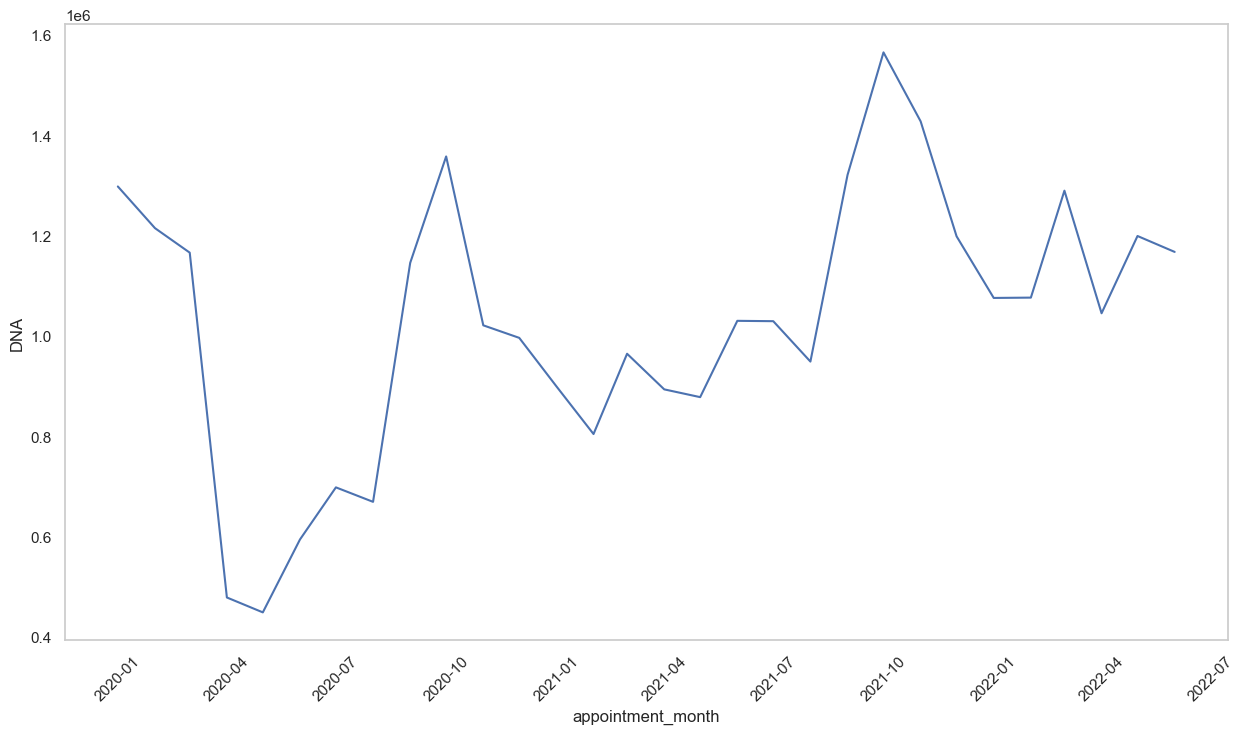

In [539]:

fig = plt.subplots(figsize=(15, 8))
plt.xticks(rotation=45)

sns.lineplot(x="appointment_month", y="DNA", data=appt_status_vis) 
plt.show()

Combined Appointment Count and Capacity Visualisation 

In [540]:
ar_df_cap = ar_df.assign(monthly_cap_use_percentage =lambda x: x.count_of_appointments / nhs_appt_capacity_month)
ar_df_cap
ar_df_cap.reset_index().head()

index appointment_month  count_of_appointments  monthly_cap_use_percentage
0      0        2020-01-01               27199296                    0.755536
1      1        2020-02-01               24104621                    0.669573
2      2        2020-03-01               24053468                    0.668152
3      3        2020-04-01               16007881                    0.444663
4      4        2020-05-01               16417212                    0.456034

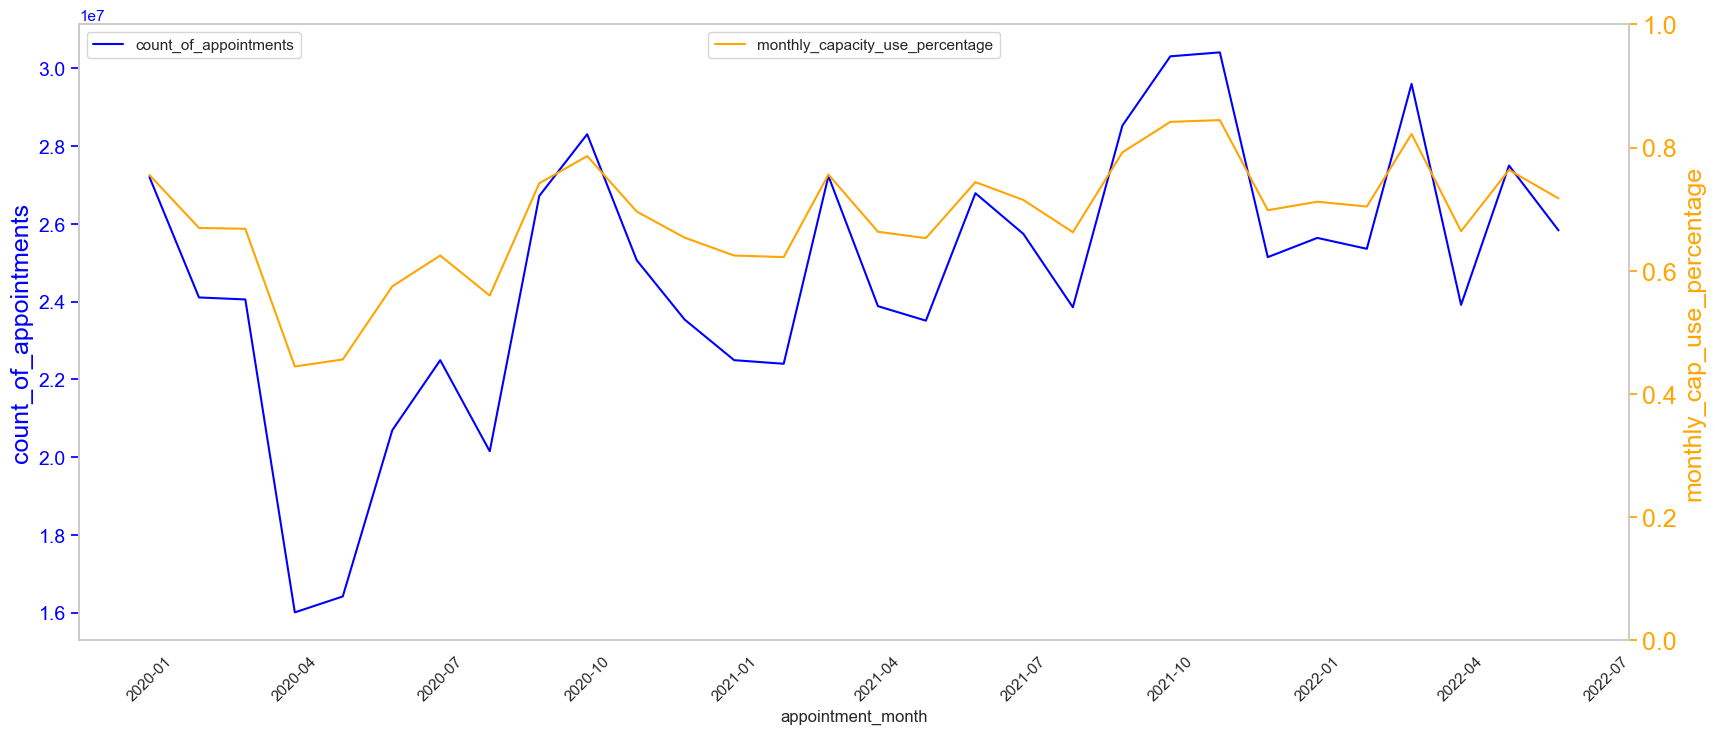

In [541]:


fig = plt.subplots(figsize=(20, 8))
plt.xticks(rotation=45)

sns.set_palette('colorblind')

# plot line chart on axis #1
ax1 = sns.lineplot(
    x='appointment_month', 
    y='count_of_appointments', 
    data=ar_df_cap.reset_index(), 
    sort=False, 
    color='blue'
)
ax1.set_ylabel('count_of_appointments')
ax1.legend(['count_of_appointments'], loc="upper left")
ax1.yaxis.label.set_color('blue')
ax1.yaxis.label.set_fontsize(18)
ax1.tick_params(axis='y', colors='blue', labelsize=14)


# set up the 2nd axis
ax2 = ax1.twinx() 

# plot bar chart on axis #2
sns.lineplot(
    x='appointment_month', 
    y='monthly_cap_use_percentage', 
    data=ar_df_cap.reset_index(), 
    sort=False, 
    color='orange', 
    ax = ax2       # Pre-existing axes for the plot
)
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('monthly_cap_use_percentage')
ax2.set_ylim(0, 1)
ax2.legend(['monthly_capacity_use_percentage'], loc="upper center")
ax2.yaxis.label.set_color('orange')
ax2.yaxis.label.set_fontsize(18)
ax2.tick_params(axis='y', colors='orange', labelsize=18)




Question: breaking out of all the apointment modes over time 

In [542]:
#different types of appointment over time 


appt_type_vis = pd.crosstab(ar['appointment_month'],
            ar['appointment_mode'],
            values=ar['count_of_appointments'],
            aggfunc='sum')


appt_type_vis.reset_index()


appointment_mode appointment_month  Face-to-Face  Home Visit  Telephone  \
0                       2020-01-01      21733394      266942    3701775   
1                       2020-02-01      19230573      227935    3322242   
2                       2020-03-01      15921794      172773    6637656   
3                       2020-04-01       7480941      100673    7652390   
4                       2020-05-01       7729597      112018    7813734   
5                       2020-06-01       9763381      133805    9849385   
6                       2020-07-01      11184673      140787   10114285   
7                       2020-08-01      10388825      119250    8742071   
8                       2020-09-01      15092880      148978   10262198   
9                       2020-10-01      16870816      161721    9950370   
10                      2020-11-01      13886990      150187    9954012   
11                      2020-12-01      13133882      137310    9278556   
12                      2021-01-01      11887083      129033    9571141   
13                      2021-02-01      11850255      130396    9546051   
14                      2021-03-01      14593975      154148   11383424   
15                      2021-04-01      13058306      148827    9704359   
16                      2021-05-01      13032902      142291    9436985   
17                      2021-06-01      15030018      161666   10606719   
18                      2021-07-01      14607857      157992   10060423   
19                      2021-08-01      13717325      151619    9149072   
20                      2021-09-01      17266602      171829   10068770   
21                      2021-10-01      19471561      178593    9449544   
22                      2021-11-01      19031327      203352    9993842   
23                      2021-12-01      15312340      181264    8723325   
24                      2022-01-01      15414102      171669    9212553   
25                      2022-02-01      15531971      170435    8820538   
26                      2022-03-01      18333743      200945   10088419   
27                      2022-04-01      15049567      172936    7893805   
28                      2022-05-01      17630858      200862    8792743   
29                      2022-06-01      16744191      187640    8082270   

appointment_mode  Unknown  Video/Online  
0                 1302979        194206  
1                 1151233        172638  
2                 1194015        127230  
3                  729664         44213  
4                  720213         41650  
5                  885177         59057  
6                  970928         80764  
7                  823191         77183  
8                 1085917        124282  
9                 1181559        137466  
10                 961830        108583  
11                 878469        107719  
12                 798248        106564  
13                 769622        103245  
14                 966730        127147  
15                 857408        111032  
16                 788132        108085  
17                 860215        125564  
18                 792114        120833  
19                 724126        110029  
20                 859946        155354  
21                1029671        174465  
22                1015969        160580  
23                 798049        125798  
24                 706352        130798  
25                 704619        127697  
26                 819913        152018  
27                 670299        126453  
28                 726857        144188  
29                 677860        136117

Breaking out of data in respect of appointment type and evolution over time 

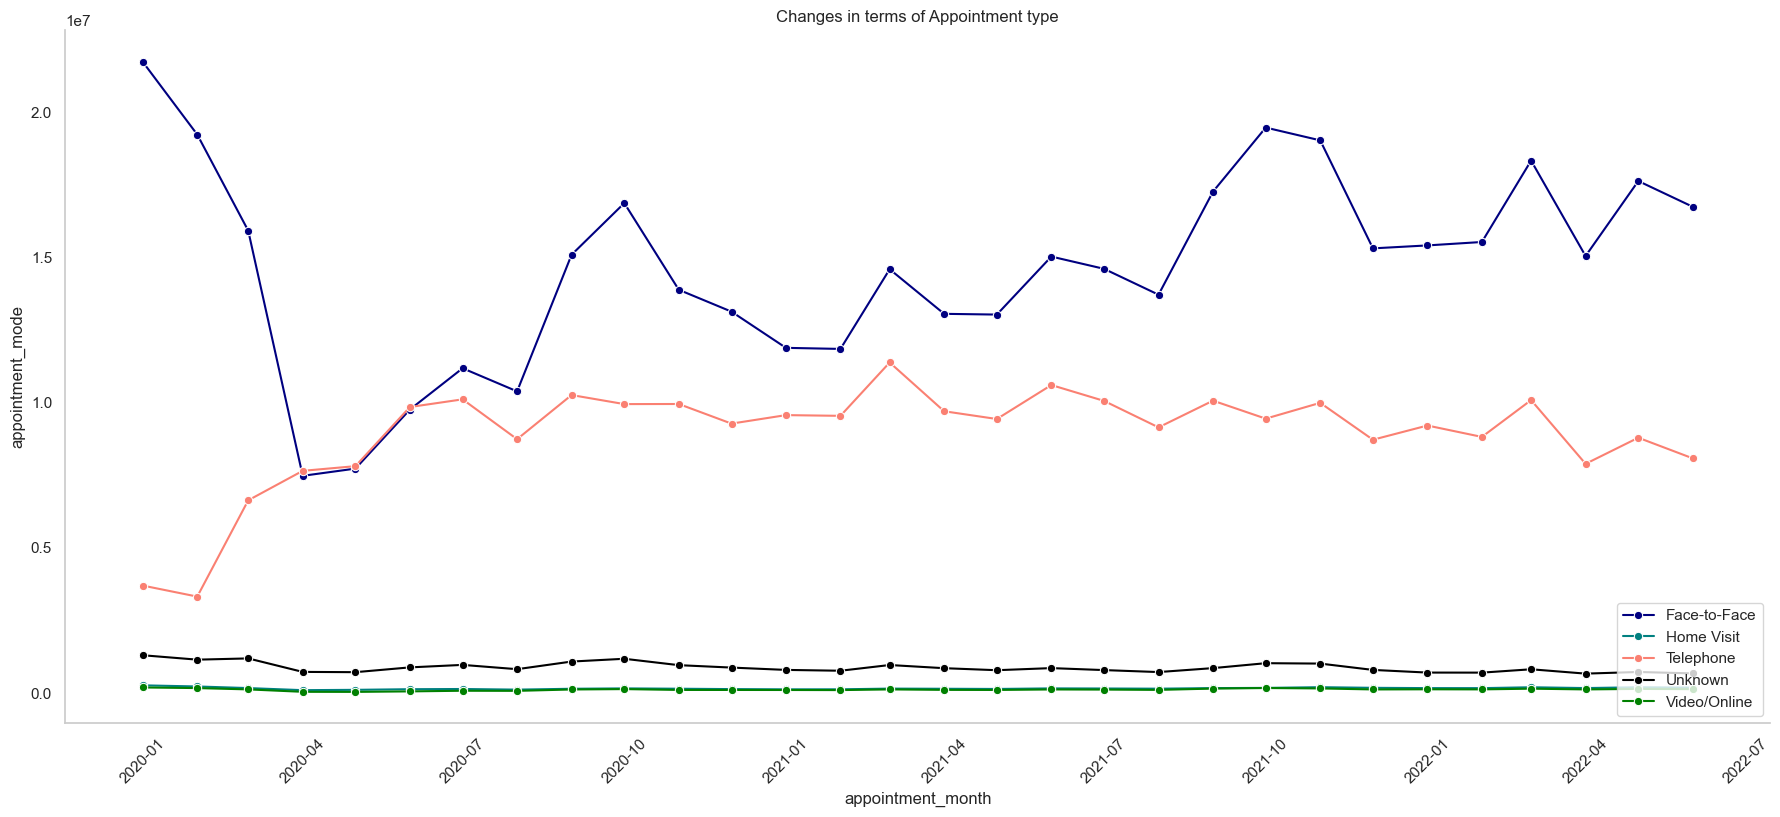

In [543]:

fig = plt.subplots(figsize=(22, 9))
plt.xticks(rotation=45)

plt.rcParams.update({'font.size': 17})


# Create a Seaborn line plot with different markers for each product
sns.lineplot(x='appointment_month', y='Face-to-Face', data=appt_type_vis.reset_index(), marker='o', color='navy', label='Face-to-Face')
sns.lineplot(x='appointment_month', y='Home Visit', data=appt_type_vis.reset_index(), marker='o', color='teal', label='Home Visit')
sns.lineplot(x='appointment_month', y='Telephone', data=appt_type_vis.reset_index(), marker='o', color='salmon', label='Telephone')
sns.lineplot(x='appointment_month', y='Unknown', data=appt_type_vis.reset_index(), marker='o', color='black', label='Unknown')
sns.lineplot(x='appointment_month', y='Video/Online', data=appt_type_vis.reset_index(), marker='o', color='green', label='Video/Online')
 
# Set plot title and axes labels
plt.title('Changes in terms of Appointment type')
plt.xlabel('appointment_month')
plt.ylabel('appointment_mode')
 
# Add a legend
plt.legend(loc='lower right')
 
# Add a grid
plt.grid(False)
 
# Remove the top and right spines
sns.despine()
 
# Show the plot
plt.show()

In [544]:
t2b_vis = pd.crosstab(ar['appointment_month'],
            ar['time_between_book_and_appointment'],
            values=ar['count_of_appointments'],
            aggfunc='sum')

t2b_vis.reset_index()

time_between_book_and_appointment appointment_month    1 Day  15  to 21 Days  \
0                                        2020-01-01  1945711         1881819   
1                                        2020-02-01  1666076         1917994   
2                                        2020-03-01  1822926         1743581   
3                                        2020-04-01  1523077          404639   
4                                        2020-05-01  1821810          303101   
5                                        2020-06-01  2268962          447255   
6                                        2020-07-01  2443479          694472   
7                                        2020-08-01  2005241          840855   
8                                        2020-09-01  2464063         1645808   
9                                        2020-10-01  2564396         1974824   
10                                       2020-11-01  2285210         1395087   
11                                       2020-12-01  2315757         1276951   
12                                       2021-01-01  2435465          962788   
13                                       2021-02-01  2361443          816466   
14                                       2021-03-01  2695469         1170037   
15                                       2021-04-01  2301670         1298564   
16                                       2021-05-01  2188719         1303048   
17                                       2021-06-01  2389097         1630126   
18                                       2021-07-01  2344552         1548831   
19                                       2021-08-01  2018319         1453209   
20                                       2021-09-01  2666072         1869263   
21                                       2021-10-01  2598516         2005851   
22                                       2021-11-01  2506532         2254189   
23                                       2021-12-01  2219212         1709999   
24                                       2022-01-01  2334274         1312377   
25                                       2022-02-01  2272923         1524398   
26                                       2022-03-01  2709362         1908058   
27                                       2022-04-01  2088881         1720218   
28                                       2022-05-01  2270686         1782026   
29                                       2022-06-01  2188197         1914740   

time_between_book_and_appointment  2 to 7 Days  22  to 28 Days  8  to 14 Days  \
0                                      5604909         1313557        3444637   
1                                      4692881         1289642        3448287   
2                                      4251364         1277924        2882845   
3                                      2016527          460284         725571   
4                                      2601179          226697         842962   
5                                      4168832          290802        1303387   
6                                      4865824          394032        1974898   
7                                      4218540          451518        2053578   
8                                      5612408          895969        3236710   
9                                      5934097         1250696        3615907   
10                                     5533276          786091        2961047   
11                                     5016592          631592        3040822   
12                                     5064495          624615        1971087   
13                                     5457349          471673        2235364   
14                                     6572676          629531        3097674   
15                                     5167763          701223        2911630   
16                                     5229193          673570        3029254   
17                                     5607424          87869

Visualisation appointment leadtimes and their respective numbers over time 

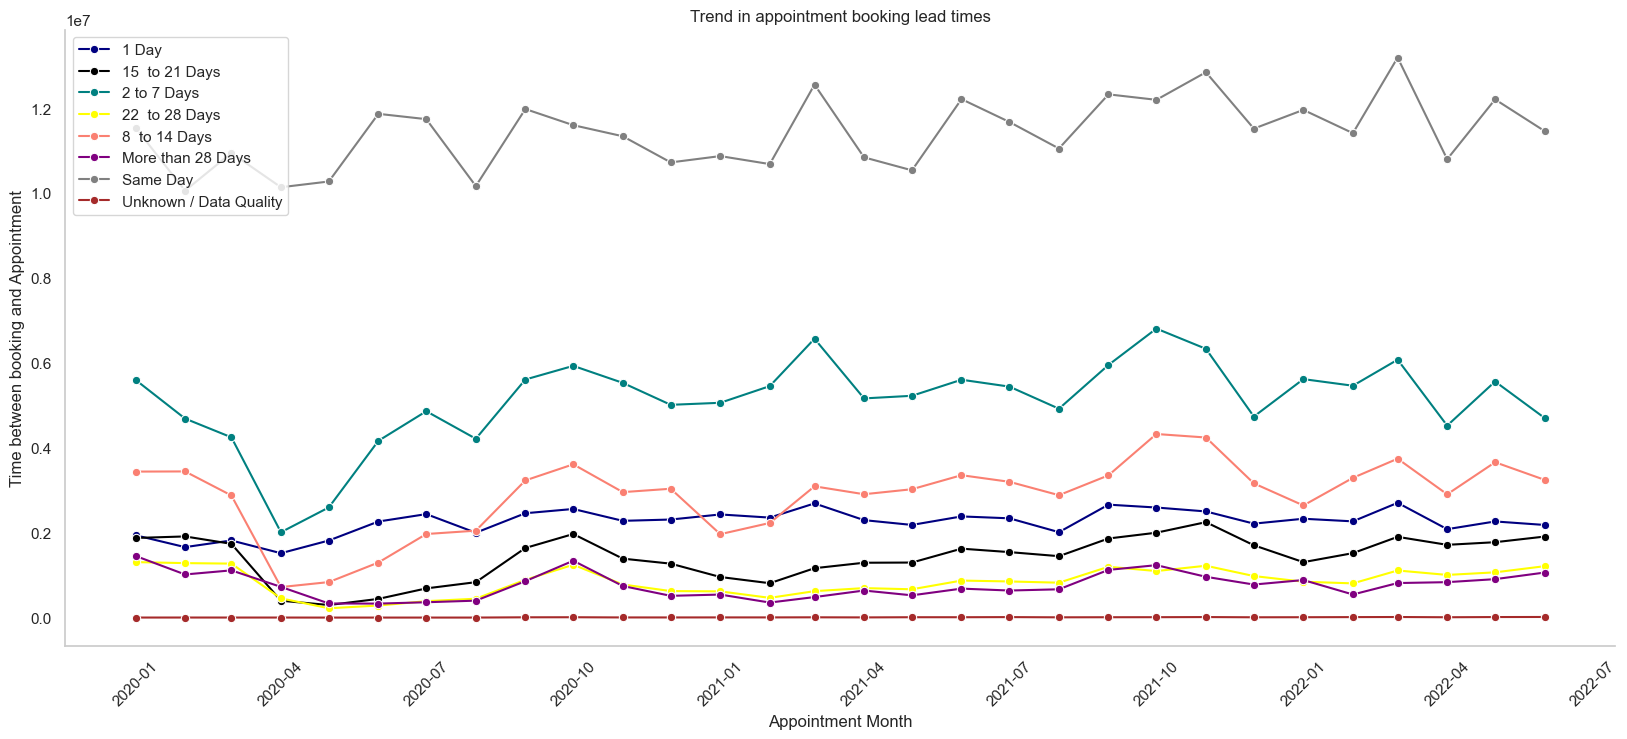

In [545]:
fig = plt.subplots(figsize=(20, 8))
plt.xticks(rotation=45)

plt.rcParams.update({'font.size': 17})


# Create a Seaborn line plot with different markers for each product
sns.lineplot(x='appointment_month', y='1 Day', data=t2b_vis.reset_index(), marker='o', color='navy', label='1 Day')
sns.lineplot(x='appointment_month', y='15  to 21 Days', data=t2b_vis.reset_index(), marker='o', color='black', label='15  to 21 Days')
sns.lineplot(x='appointment_month', y='2 to 7 Days', data=t2b_vis.reset_index(), marker='o', color='teal', label='2 to 7 Days')
sns.lineplot(x='appointment_month', y='22  to 28 Days', data=t2b_vis.reset_index(), marker='o', color='yellow', label='22  to 28 Days')
sns.lineplot(x='appointment_month', y='8  to 14 Days', data=t2b_vis.reset_index(), marker='o', color='salmon', label='8  to 14 Days')
sns.lineplot(x='appointment_month', y='More than 28 Days', data=t2b_vis.reset_index(), marker='o', color='purple', label='More than 28 Days')
sns.lineplot(x='appointment_month', y='Same Day', data=t2b_vis.reset_index(), marker='o', color='grey', label='Same Day')
sns.lineplot(x='appointment_month', y='Unknown / Data Quality', data=t2b_vis.reset_index(), marker='o', color='brown', label='Unknown / Data Quality')
    
    
    
    
# Set plot title and axes labels
plt.title('Trend in appointment booking lead times')
plt.xlabel('Appointment Month')
plt.ylabel('Time between booking and Appointment')
 
# Add a legend
plt.legend(loc='upper left')
 
# Add a grid
plt.grid(False)
 
# Remove the top and right spines
sns.despine()
 
# Show the plot
plt.show()

In [546]:
nc.columns

Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')

In [547]:
nc.groupby('appointment_month')['count_of_appointments'].sum()

appointment_month
2021-08    23852171
2021-09    28522501
2021-10    30303834
2021-11    30405070
2021-12    25140776
2022-01    25635474
2022-02    25355260
2022-03    29595038
2022-04    23913060
2022-05    27495508
2022-06    25828078
Name: count_of_appointments, dtype: int64

In [548]:
ct_nc = pd.crosstab(nc['appointment_month'],
            nc['service_setting'],
            values=nc['count_of_appointments'],
            aggfunc='sum')


ct_nc.reset_index()

service_setting appointment_month  Extended Access Provision  \
0                         2021-08                     160927   
1                         2021-09                     187906   
2                         2021-10                     209539   
3                         2021-11                     207577   
4                         2021-12                     173504   
5                         2022-01                     186375   
6                         2022-02                     196627   
7                         2022-03                     231905   
8                         2022-04                     192284   
9                         2022-05                     220511   
10                        2022-06                     209652   

service_setting  General Practice   Other  Primary Care Network  Unmapped  
0                        21575852  449101                432448   1233843  
1                        25940821  527174                530485   1336115  
2                        27606171  556487                564981   1366656  
3                        27767889  558784                614324   1256496  
4                        23008818  464718                539479    954257  
5                        23583053  457440                569044    839562  
6                        23305934  456153                585300    811246  
7                        27187368  530677                702176    942912  
8                        21916791  437402                606270    760313  
9                        25238620  503327                712280    820770  
10                       23680374  478813                700599    758640

In [549]:
nc.columns


Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')

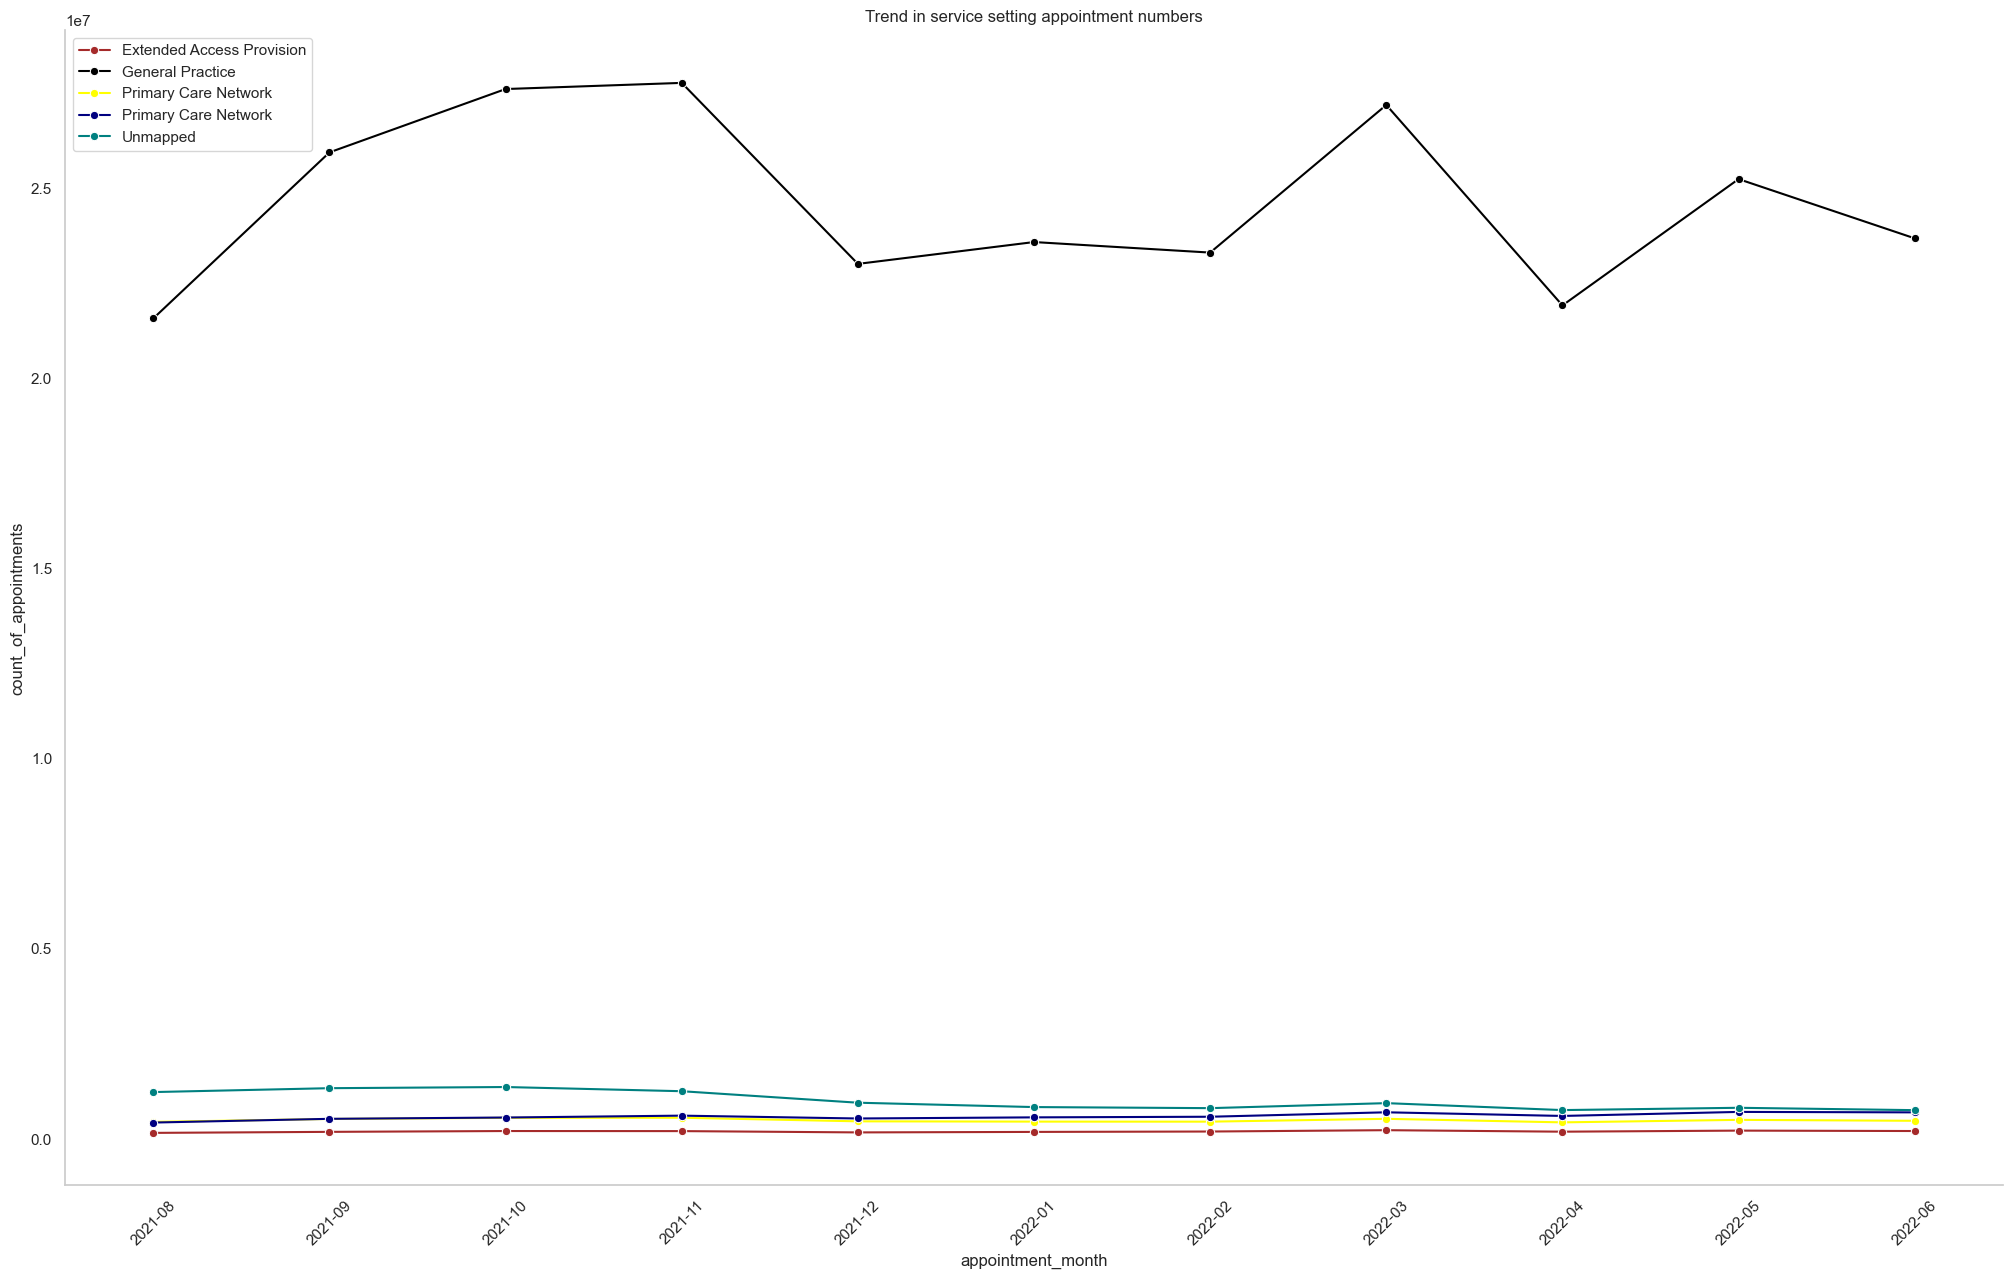

In [550]:
fig = plt.subplots(figsize=(25, 15))
plt.xticks(rotation=45)

plt.rcParams.update({'font.size': 17}) 


# Create a Seaborn line plot with different markers for each product
sns.lineplot(x='appointment_month', y='Extended Access Provision', data=ct_nc.reset_index(), marker='o', color='brown', label='Extended Access Provision')
sns.lineplot(x='appointment_month', y='General Practice', data=ct_nc.reset_index(), marker='o', color='black', label='General Practice')
sns.lineplot(x='appointment_month', y='Other', data=ct_nc.reset_index(), marker='o', color='yellow', label='Primary Care Network')
sns.lineplot(x='appointment_month', y='Primary Care Network', data=ct_nc.reset_index(), marker='o', color='navy', label='Primary Care Network')
sns.lineplot (x='appointment_month', y='Unmapped', data=ct_nc.reset_index(), marker='o', color='teal', label='Unmapped')


# Set plot title and axes labels
plt.title('Trend in service setting appointment numbers')
plt.xlabel('appointment_month')
plt.ylabel('count_of_appointments')
 
# Add a legend
plt.legend(loc='upper left')
 
# Add a grid
plt.grid(False)
 
# Remove the top and right spines
sns.despine()
 
# Show the plot
plt.show()


In [551]:
ct_nc = pd.crosstab(nc['appointment_month'],
            nc['service_setting'],
            values=nc['count_of_appointments'],
            aggfunc='sum',
            normalize='index')

ct_nc.reset_index()

service_setting appointment_month  Extended Access Provision  \
0                         2021-08                   0.006747   
1                         2021-09                   0.006588   
2                         2021-10                   0.006915   
3                         2021-11                   0.006827   
4                         2021-12                   0.006901   
5                         2022-01                   0.007270   
6                         2022-02                   0.007755   
7                         2022-03                   0.007836   
8                         2022-04                   0.008041   
9                         2022-05                   0.008020   
10                        2022-06                   0.008117   

service_setting  General Practice     Other  Primary Care Network  Unmapped  
0                        0.904566  0.018829              0.018130  0.051729  
1                        0.909486  0.018483              0.018599  0.046844  
2                        0.910979  0.018364              0.018644  0.045098  
3                        0.913265  0.018378              0.020205  0.041325  
4                        0.915199  0.018485              0.021458  0.037957  
5                        0.919938  0.017844              0.022198  0.032750  
6                        0.919176  0.017990              0.023084  0.031995  
7                        0.918646  0.017931              0.023726  0.031860  
8                        0.916520  0.018291              0.025353  0.031795  
9                        0.917918  0.018306              0.025905  0.029851  
10                       0.916846  0.018538              0.027125  0.029373

Question: Create a second visualisation in Seaborn where you concentrate on all the service settings, excluding GP visits.

In [552]:
# a second visualisation in Seaborn where you concentrate on all the service settings, excluding GP visits.


ct_nc_gp = ct_nc.reset_index().drop('General Practice', axis=1)

ct_nc_gp

service_setting appointment_month  Extended Access Provision     Other  \
0                         2021-08                   0.006747  0.018829   
1                         2021-09                   0.006588  0.018483   
2                         2021-10                   0.006915  0.018364   
3                         2021-11                   0.006827  0.018378   
4                         2021-12                   0.006901  0.018485   
5                         2022-01                   0.007270  0.017844   
6                         2022-02                   0.007755  0.017990   
7                         2022-03                   0.007836  0.017931   
8                         2022-04                   0.008041  0.018291   
9                         2022-05                   0.008020  0.018306   
10                        2022-06                   0.008117  0.018538   

service_setting  Primary Care Network  Unmapped  
0                            0.018130  0.051729  
1                            0.018599  0.046844  
2                            0.018644  0.045098  
3                            0.020205  0.041325  
4                            0.021458  0.037957  
5                            0.022198  0.032750  
6                            0.023084  0.031995  
7                            0.023726  0.031860  
8                            0.025353  0.031795  
9                            0.025905  0.029851  
10                           0.027125  0.029373

In [553]:
ct_nc_gp.describe()

service_setting  Extended Access Provision      Other  Primary Care Network  \
count                            11.000000  11.000000             11.000000   
mean                              0.007365   0.018313              0.022221   
std                               0.000594   0.000292              0.003126   
min                               0.006588   0.017844              0.018130   
25%                               0.006864   0.018141              0.019424   
50%                               0.007270   0.018364              0.022198   
75%                               0.007928   0.018484              0.024540   
max                               0.008117   0.018829              0.027125   

service_setting   Unmapped  
count            11.000000  
mean              0.037325  
std               0.007770  
min               0.029373  
25%               0.031828  
50%               0.032750  
75%               0.043212  
max               0.051729

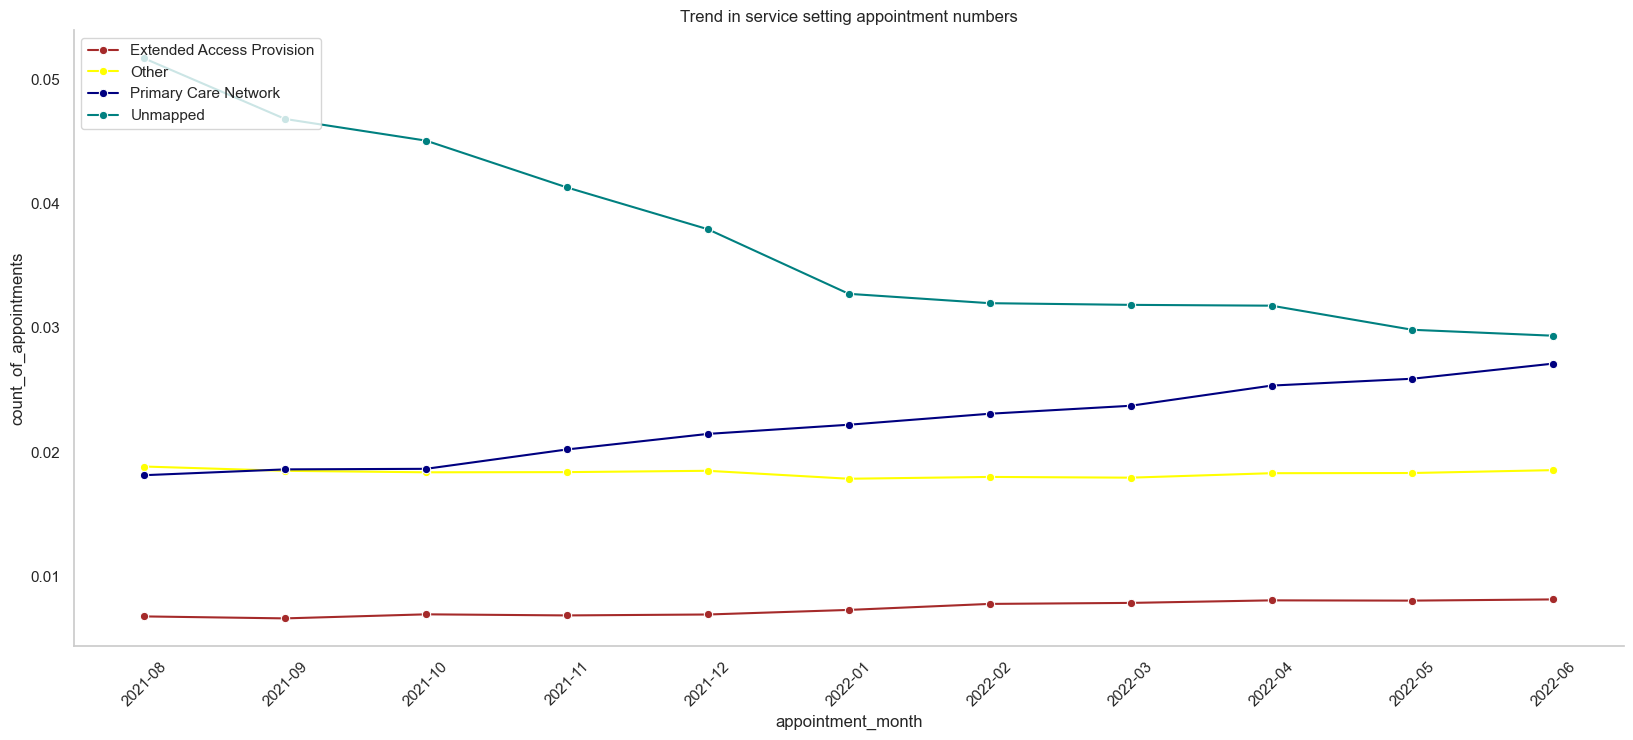

In [554]:
fig = plt.subplots(figsize=(20, 8))
plt.xticks(rotation=45)

plt.rcParams.update({'font.size': 17}) 


# Create a Seaborn line plot with different markers for each product
sns.lineplot(x='appointment_month', y='Extended Access Provision', data=ct_nc.reset_index(), marker='o', color='brown', label='Extended Access Provision')
sns.lineplot(x='appointment_month', y='Other', data=ct_nc.reset_index(), marker='o', color='yellow', label='Other')
sns.lineplot(x='appointment_month', y='Primary Care Network', data=ct_nc.reset_index(), marker='o', color='navy', label='Primary Care Network')
sns.lineplot (x='appointment_month', y='Unmapped', data=ct_nc.reset_index(), marker='o', color='teal', label='Unmapped')


# Set plot title and axes labels
plt.title('Trend in service setting appointment numbers')
plt.xlabel('appointment_month')
plt.ylabel('count_of_appointments')
 
# Add a legend
plt.legend(loc='upper left')
 
# Add a grid
plt.grid(False)
 
# Remove the top and right spines
sns.despine()
 
# Show the plot
plt.show()

# 4.0 NHS Related Twitter Data Analysis


Question: Summarise any insights you've discovered and anything you would like to explore further. For example, indicate the steps you followed to improve the visualisations to optimise feedback to your team and the NHS.

I do not believe insights from tweets are particularly powerful here, for the following reasons:

__*__ Tweet are neither geolocated nor do they have timestamps.

__*__ Twitter handles do not all seem to be NHS related and the subject matter does not always relate to the UK context 

It is unsurprising that Digital Health and Digital Transformation figure highly in the hashtag data, reflecting a wider trend in society reflective of the social distancing imposed by the State due to the pandemic. This is supported by statistical data showing up in appointment mode where telephone appointment early on in the pandemic were briefly level with face to face appointments as social distancing rules were imposed well prior to widespread natural immunity being established or the roll out of the vacine to heathcare workers. 

Please see ny working code below  

In [555]:
tweets = pd.DataFrame(tweets)

In [556]:
#review and sense checking the twitter sourced dataset
tweets.head(5)


tweet_id                                    tweet_full_text  \
0  1567629223795527681  As Arkansas’ first Comprehensive Stroke Certif...   
1  1567582846612553728  RT @AndreaGrammer: Work-life balance is at the...   
2  1567582787070304256  RT @OntarioGreens: $10 billion can go a long w...   
3  1567582767625428992  RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies...   
4  1567582720460570625  ICYMI: Our recent blogs on Cybersecurity in Ac...   

                                      tweet_entities  \
0  {'hashtags': [{'text': 'Healthcare', 'indices'...   
1  {'hashtags': [{'text': 'PremiseHealth', 'indic...   
2  {'hashtags': [{'text': 'Healthcare', 'indices'...   
3  {'hashtags': [{'text': 'NEW', 'indices': [20, ...   
4  {'hashtags': [{'text': 'blogs', 'indices': [18...   

                             tweet_entities_hashtags  \
0                                        #Healthcare   
1                            #PremiseHealth, #hiring   
2                                        #Healthcare   
3                                               #NEW   
4  #blogs, #digitaltransformation, #cybersecurity...   

                                      tweet_metadata  tweet_retweet_count  \
0  {'iso_language_code': 'en', 'result_type': 're...                    0   
1  {'iso_language_code': 'en', 'result_type': 're...                    2   
2  {'iso_language_code': 'en', 'result_type': 're...                   39   
3  {'iso_language_code': 'en', 'result_type': 're...                    5   
4  {'iso_language_code': 'en', 'result_type': 're...                    0   

   tweet_favorite_count  tweet_favorited  tweet_retweeted tweet_lang  
0                     0            False            False         en  
1                     0            False            False         en  
2                     0            False            False         en  
3                     0            False            False         en  
4                     0            False            False         en

In [557]:
tweets.shape

(1174, 10)

In [558]:

tags = []

for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())

In [559]:
# Create a DataFrame.
data = pd.DataFrame(tweets, columns=['tweet_full_text'])
data.head()


tweet_full_text
0  As Arkansas’ first Comprehensive Stroke Certif...
1  RT @AndreaGrammer: Work-life balance is at the...
2  RT @OntarioGreens: $10 billion can go a long w...
3  RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies...
4  ICYMI: Our recent blogs on Cybersecurity in Ac...

In [560]:
# Loop through the full tweet column and build list of values containing hashtag symbol.

tags = []

for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())

In [561]:
# Create a DataFrame.
data = pd.DataFrame(tags, columns=['tweet_full_text']).value_counts().reset_index(name='count_tag')
#Clean the #
data['tweet_full_text'] = data['tweet_full_text'].str.replace('#','').sort_values(ascending=False)

#Display the first 30 records
data.head(10)

tweet_full_text  count_tag
0      healthcare        716
1          health         80
2        medicine         41
3              ai         40
4             job         38
5         medical         35
6        strategy         30
7  pharmaceutical         28
8   digitalhealth         25
9       marketing         25

In [562]:
#rename columns and reset index

data = data.rename(columns={"tweet_full_text": "word", "count_tag": "count"})
data.head()

word  count
0  healthcare    716
1      health     80
2    medicine     41
3          ai     40
4         job     38

In [563]:
#sense checking 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754 entries, 0 to 1753
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    1754 non-null   object
 1   count   1754 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 27.5+ KB


In [564]:
#Create a Seaborn barplot of all records with a count>10.

data1 = data[data['count'] >10]
data1.shape


(47, 2)

In [565]:
#ordering data by count column 

data1 = data1.sort_values(by=['count'],ascending=False)
data1.head()

word  count
0  healthcare    716
1      health     80
2    medicine     41
3          ai     40
4         job     38

In [566]:
#displaying the largest 30 in terms of count using 'nlargest()'

data_final_sorted = data1.nlargest(30, "count")

data_final_sorted.head()

word  count
0  healthcare    716
1      health     80
2    medicine     41
3          ai     40
4         job     38

[Text(0.5, 1.0, 'Twitter Word Count by Full Tweet')]

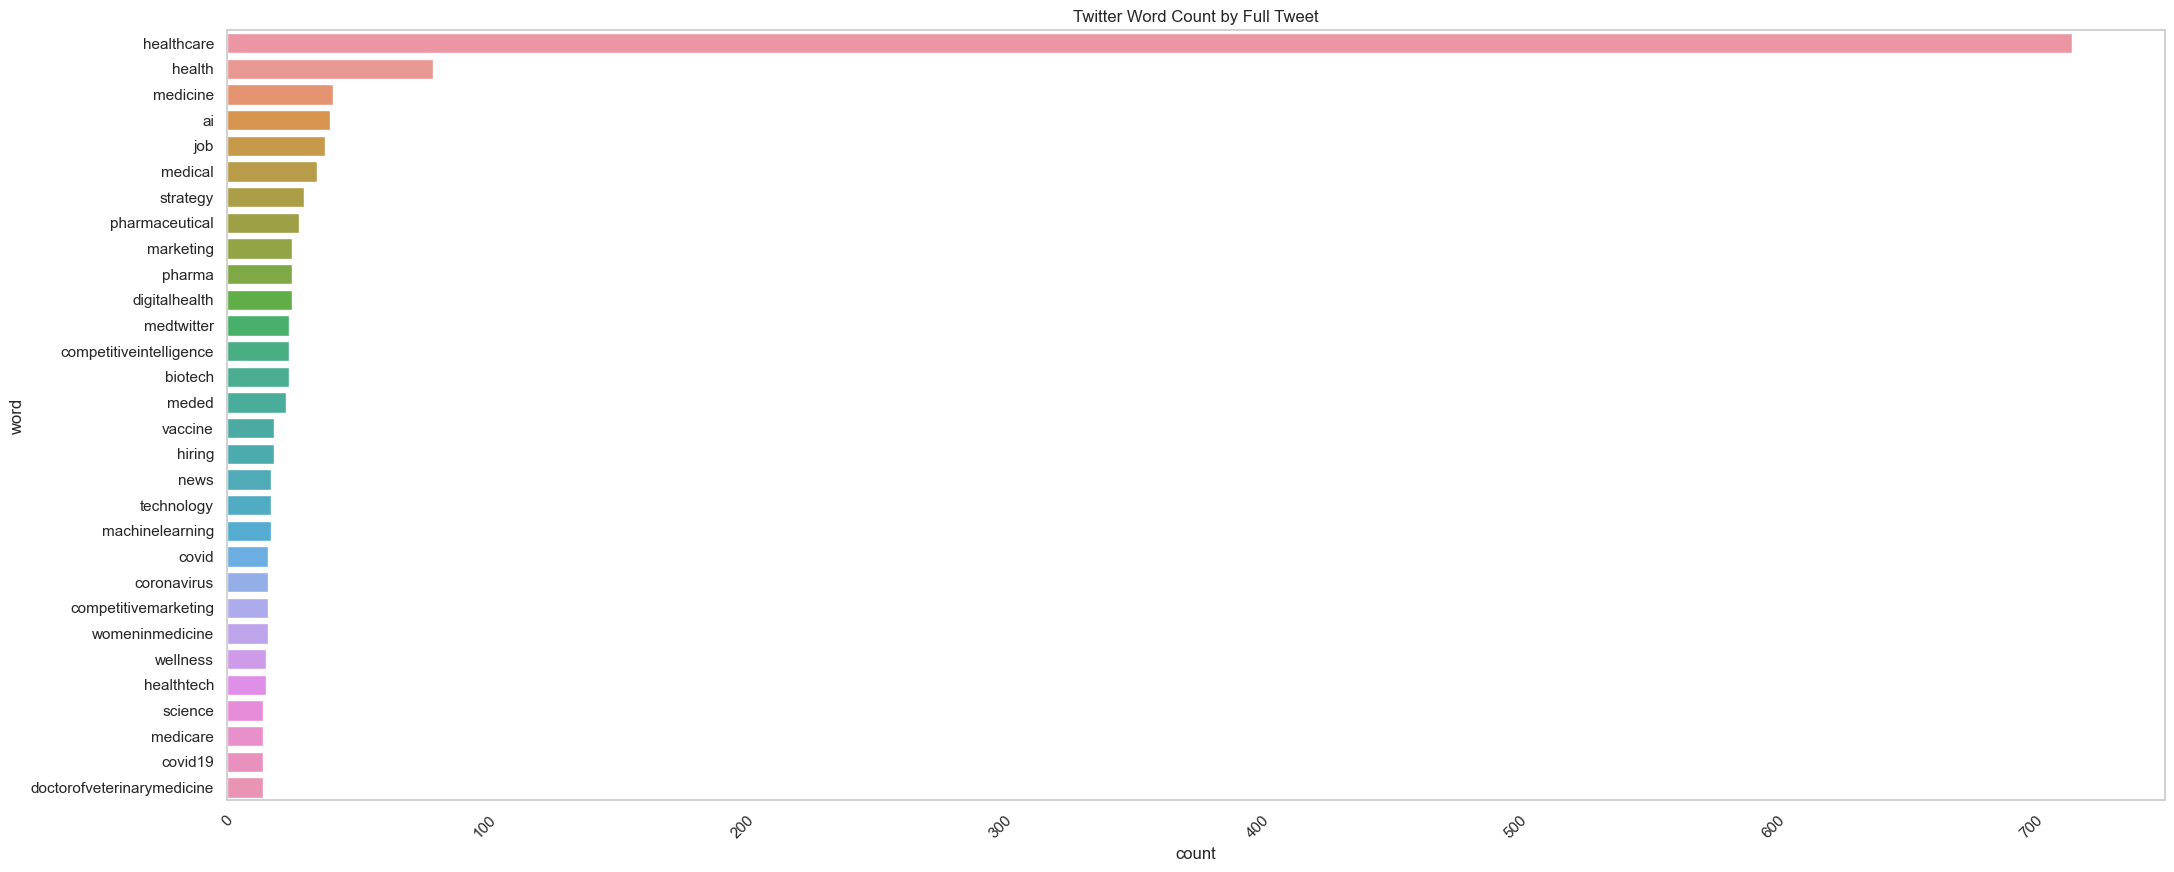

In [567]:
fig = plt.subplots(figsize=(25, 10))
plt.xticks(rotation=45)

plt.rcParams.update({'font.size': 18}) 

sns.barplot(data_final_sorted, x="count", y="word").set(title='Twitter Word Count by Full Tweet')

# 5.0 Data Quality

__*__ high levels of 'Unknown'data due to data collection challenges 

__*__ Inconsistency between the National Category dataset and the Actual Duration Dataset

__*__ Metadata ambiguities 

In [568]:
ad.groupby('appointment_date')['count_of_appointments'].sum().head(3)

appointment_date
2021-12-01    1156233
2021-12-02    1143290
2021-12-03    1109114
Name: count_of_appointments, dtype: int64

In [569]:
nc.groupby('appointment_date')['count_of_appointments'].sum().head(3)

appointment_date
2021-08-01       5627
2021-08-02    1222768
2021-08-03    1169920
Name: count_of_appointments, dtype: int64

In [570]:
nc_timespan = nc
ad_timespan = ad

In [571]:
ad_timespan['appointment_date'] = ad_timespan['appointment_date'].astype('datetime64[ns]')
ad_timespan['appointment_date']=ad_timespan.appointment_date.dt.strftime("%Y-%m")
nc_timespan['appointment_date']=nc_timespan.appointment_date.dt.strftime("%Y-%m")

In [572]:
df_nc_timespan = nc_timespan.groupby('appointment_date')['count_of_appointments'].sum()
df_nc_timespan.reset_index()


df_ad_timespan = ad_timespan.groupby('appointment_date')['count_of_appointments'].sum()
df_ad_timespan.reset_index()


appointment_date  count_of_appointments
0          2021-12               22853483
1          2022-01               23597196
2          2022-02               23351939
3          2022-03               27170002
4          2022-04               21948814
5          2022-05               25343941
6          2022-06               23715317

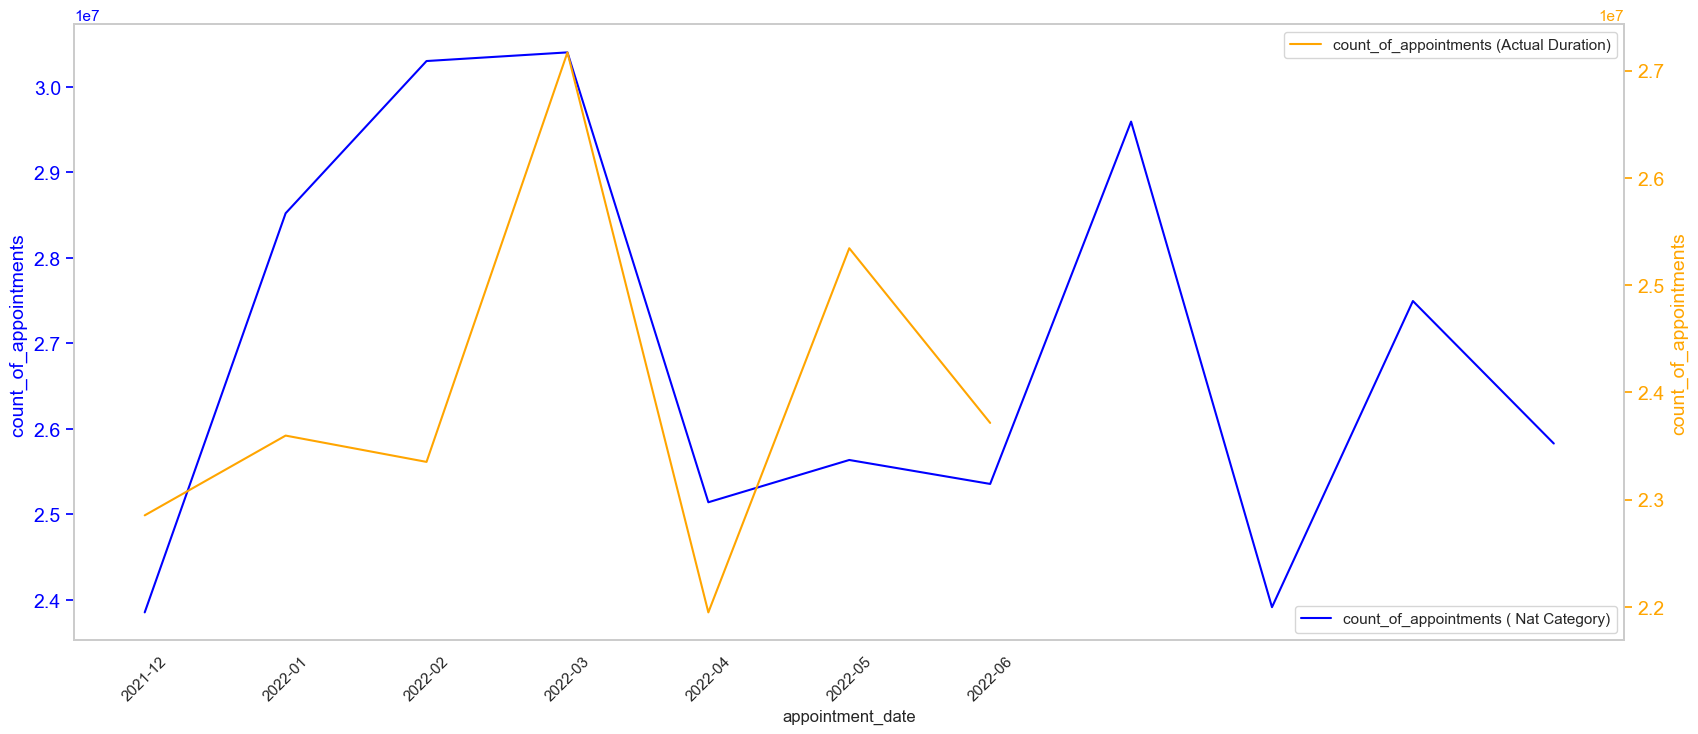

In [573]:
fig = plt.subplots(figsize=(20, 8))
plt.xticks(rotation=45)

sns.set_palette('colorblind')


# plot line chart on axis #1
ax1 = sns.lineplot(
    x='appointment_date', 
    y='count_of_appointments', 
    data=df_nc_timespan.reset_index(), 
    sort=False, 
    color='blue'
)
ax1.set_ylabel('count_of_appointments ')
ax1.legend(['count_of_appointments ( Nat Category)'], loc="lower right")
ax1.yaxis.label.set_color('blue')
ax1.yaxis.label.set_fontsize(14)
ax1.tick_params(axis='y', colors='blue', labelsize=14)


# set up the 2nd axis #ax2.set_ylim(0, 1)
ax2 = ax1.twinx() 

# plot bar chart on axis #2
sns.lineplot(
    x='appointment_date', 
    y='count_of_appointments', 
    data=df_ad_timespan.reset_index(), 
    sort=False, 
    color='orange', 
    ax = ax2       # Pre-existing axes for the plot
)
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('count_of_appointments')
ax2.legend(['count_of_appointments (Actual Duration)'], loc="upper right")
ax2.yaxis.label.set_color('orange')
ax2.yaxis.label.set_fontsize(14)
ax2.tick_params(axis='y', colors='orange', labelsize=14)
plt.show()

This plot shows the very large discrepancies between the appointment_date datapoint contained in the National Category dataset and the Actual Duration Dataset. Between January and February 2022 they actually diverge

In [574]:
pd.crosstab(ar['hcp_type'],
            ar['time_between_book_and_appointment'],
            values=ar['count_of_appointments'],
            aggfunc='sum',
            normalize='all',
            margins=True
           )

time_between_book_and_appointment     1 Day  15  to 21 Days  2 to 7 Days  \
hcp_type                                                                   
GP                                 0.047614        0.018880     0.087297   
Other Practice staff               0.040608        0.037635     0.115126   
Unknown                            0.002940        0.000984     0.004623   
All                                0.091163        0.057499     0.207046   

time_between_book_and_appointment  22  to 28 Days  8  to 14 Days  \
hcp_type                                                           
GP                                       0.010510       0.039641   
Other Practice staff                     0.023267       0.075211   
Unknown                                  0.000601       0.002066   
All                                      0.034379       0.116917   

time_between_book_and_appointment  More than 28 Days  Same Day  \
hcp_type                                                         
GP                                          0.007172  0.299728   
Other Practice staff                        0.023121  0.142035   
Unknown                                     0.000739  0.019660   
All                                         0.031032  0.461423   

time_between_book_and_appointment  Unknown / Data Quality       All  
hcp_type                                                             
GP                                               0.000262  0.511104  
Other Practice staff                             0.000251  0.457254  
Unknown                                          0.000029  0.031642  
All                                              0.000541  1.000000

And for 3.1% of all appointment the data cannot tell us what hcp_type the appoiontment took place in,  a very basic piece of information. 

# 6.0 Visualisations for Presentations 

sns.set_context("talk") used for powerpoint presentation and other cosmetic changes 

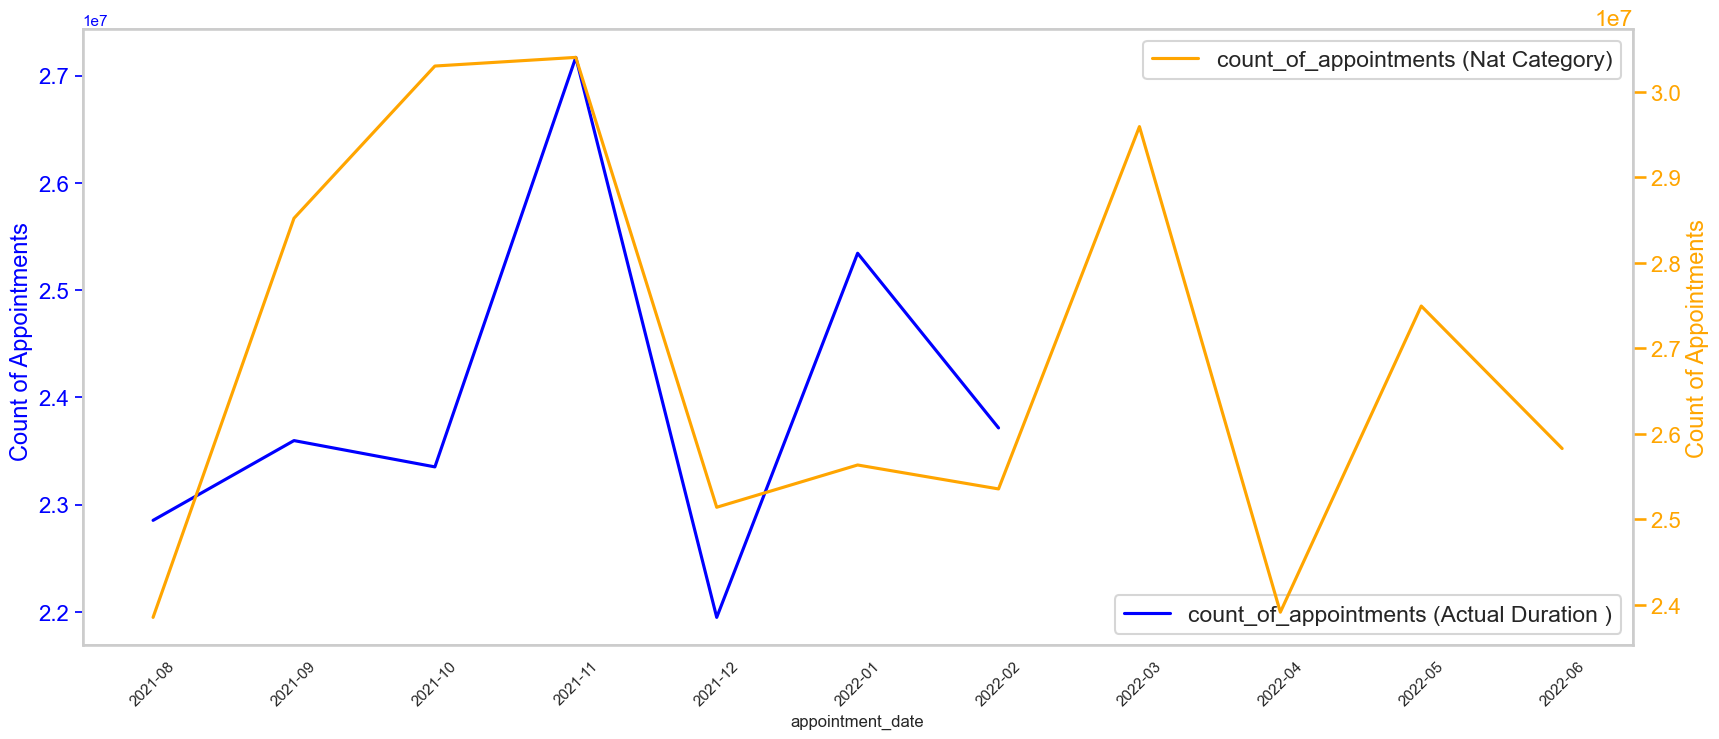

In [575]:
fig = plt.subplots(figsize=(20, 8))
plt.xticks(rotation=45)
sns.set_context("talk")


sns.set_palette('colorblind')


# plot line chart on axis #1
ax1 = sns.lineplot(
    x='appointment_date', 
    y='count_of_appointments', 
    data=df_ad_timespan.reset_index(), 
    sort=False, 
    color='blue'
)
ax1.set_ylabel('Count of Appointments ')
ax1.legend(['count_of_appointments (Actual Duration )'], loc="lower right")
ax1.yaxis.label.set_color('blue')
ax1.yaxis.label.set_fontsize(17)
ax1.tick_params(axis='y', colors='blue', labelsize=16)


# set up the 2nd axis #ax2.set_ylim(0, 1)
ax2 = ax1.twinx() 

# plot bar chart on axis #2
sns.lineplot(
    x='appointment_date', 
    y='count_of_appointments', 
    data=df_nc_timespan.reset_index(), 
    sort=False, 
    color='orange', 
    ax = ax2       # Pre-existing axes for the plot
)
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('Count of Appointments')
ax2.legend(['count_of_appointments (Nat Category)'], loc="upper right")
ax2.yaxis.label.set_color('orange')
ax2.yaxis.label.set_fontsize(17)
ax2.tick_params(axis='y', colors='orange', labelsize=16)
plt.show()

[Text(0.5, 1.0, 'Tweeter Hashtags showing above 10 times')]

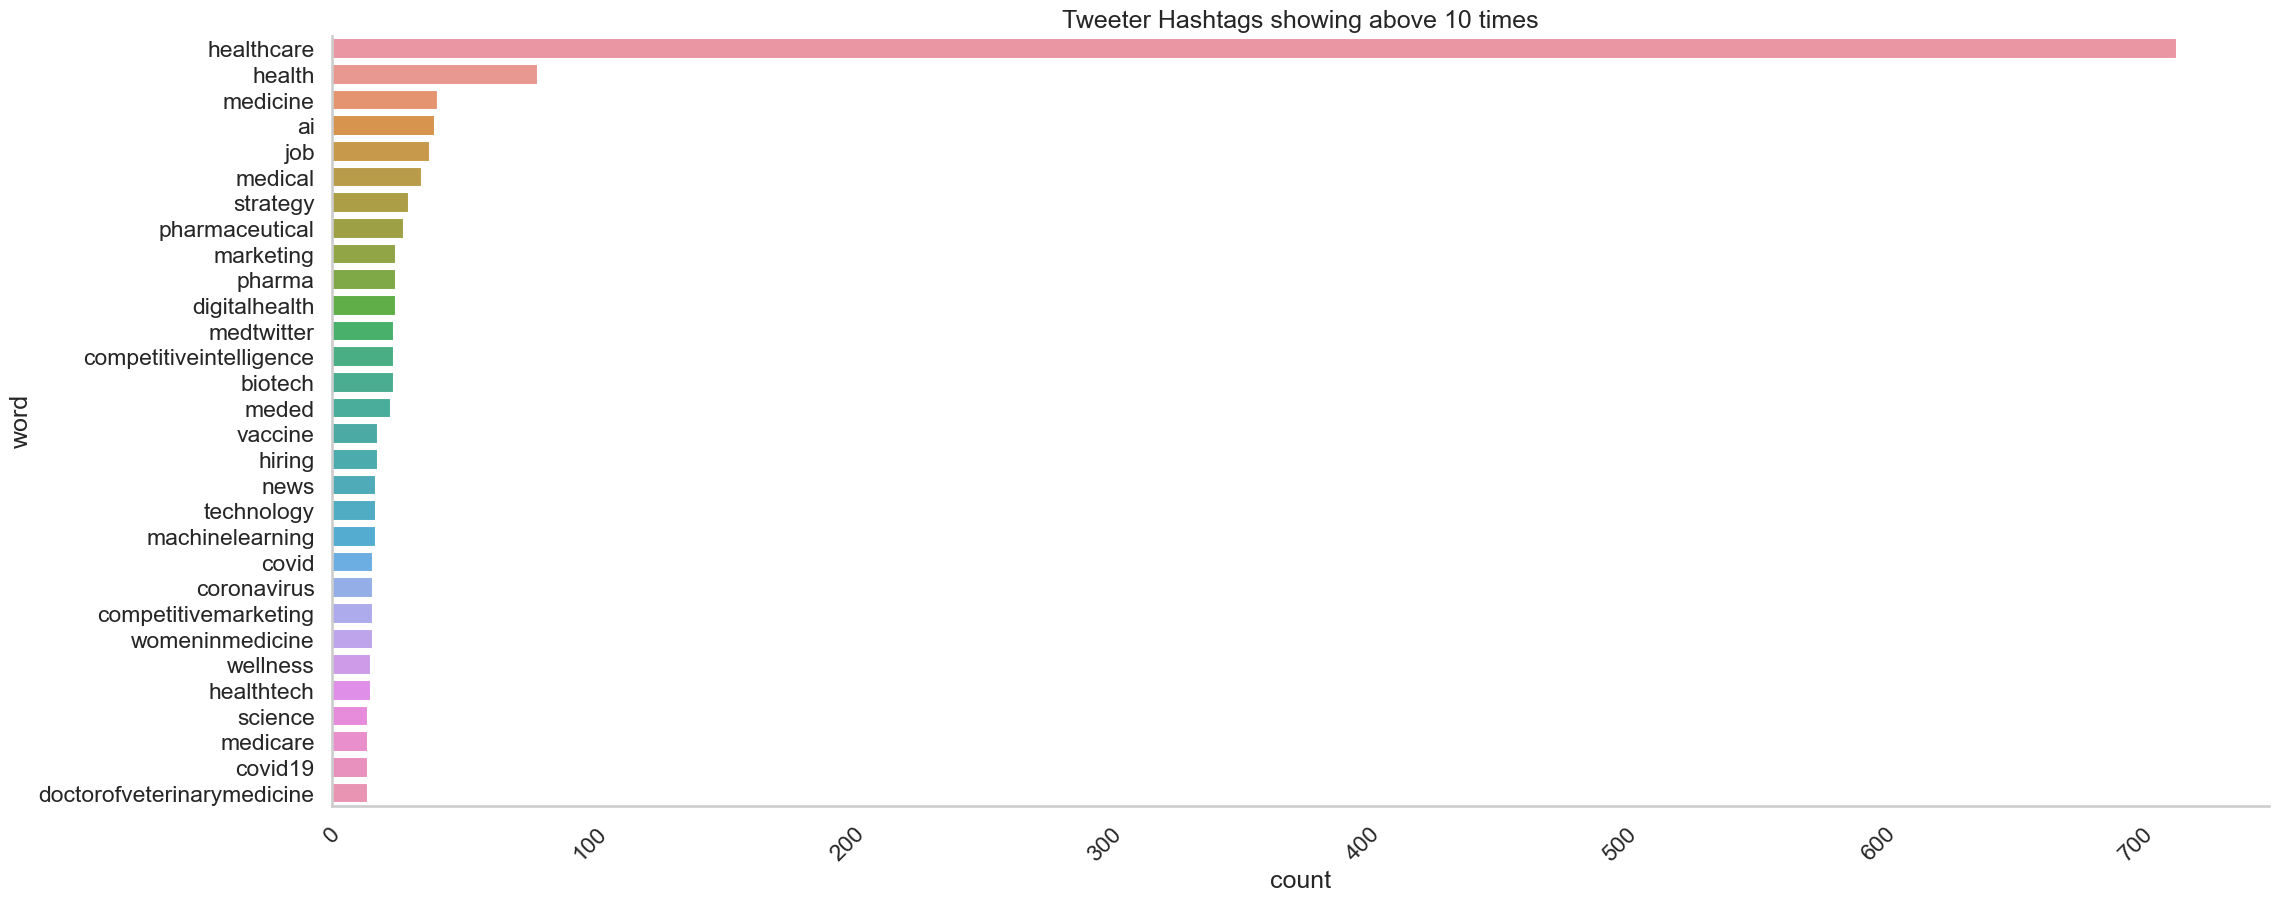

In [576]:
fig = plt.subplots(figsize=(25, 10))
plt.xticks(rotation=45)
sns.set_context("talk")
sns.color_palette("viridis", as_cmap=True)

# Remove the top and right spines
sns.despine()

plt.rcParams.update({'font.size': 20}) 

sns.barplot(data_final_sorted, x="count", y="word").set(title='Tweeter Hashtags showing above 10 times')

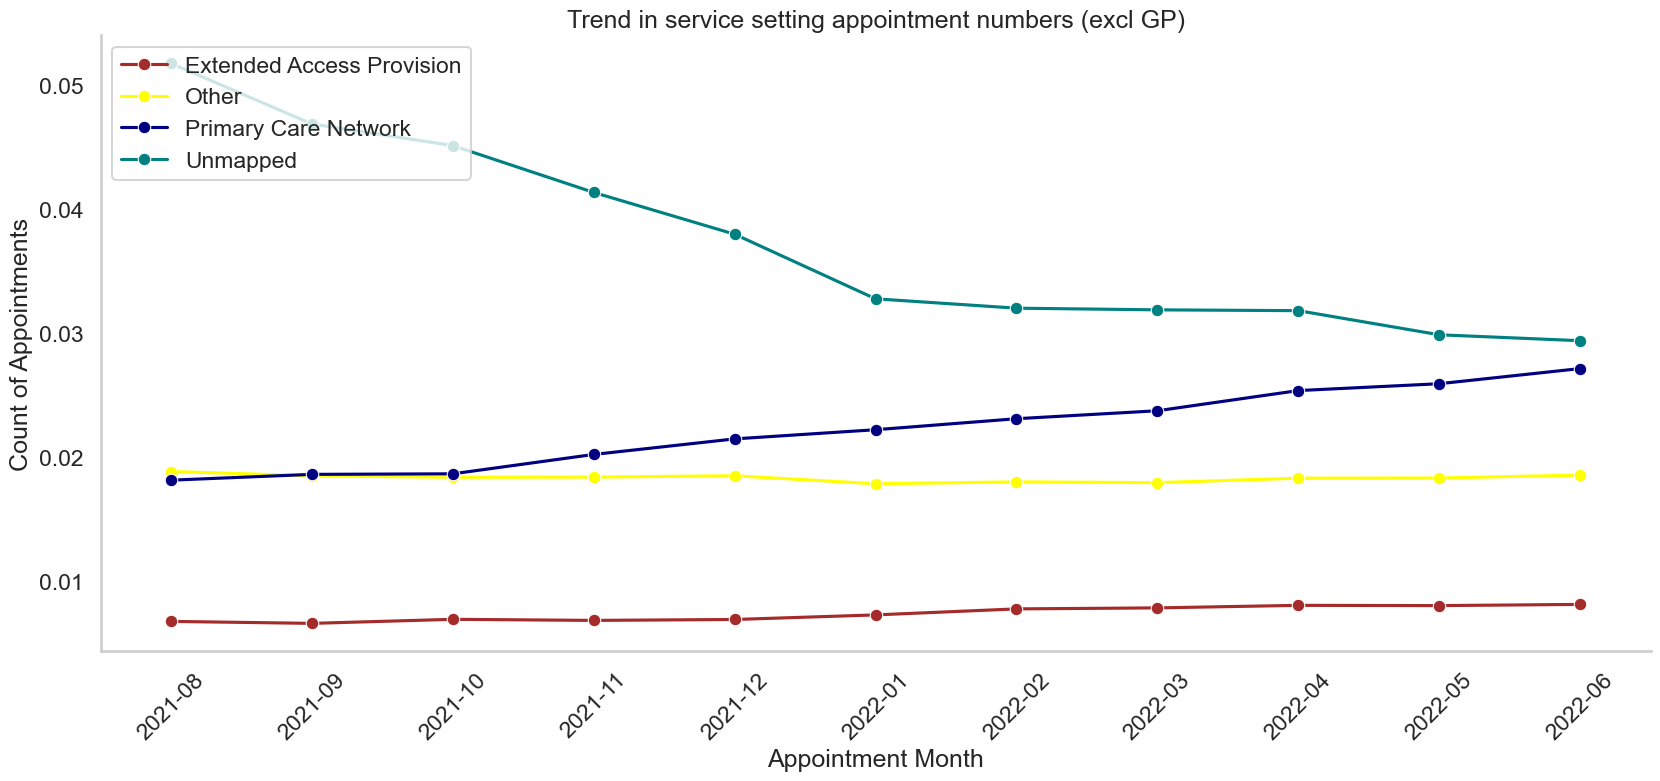

In [577]:
fig = plt.subplots(figsize=(20, 8))
plt.xticks(rotation=45)

sns.set_context("talk")

plt.rcParams.update({'font.size': 17}) 


# Create a Seaborn line plot with different markers for each product
sns.lineplot(x='appointment_month', y='Extended Access Provision', data=ct_nc.reset_index(), marker='o', color='brown', label='Extended Access Provision')
sns.lineplot(x='appointment_month', y='Other', data=ct_nc.reset_index(), marker='o', color='yellow', label='Other')
sns.lineplot(x='appointment_month', y='Primary Care Network', data=ct_nc.reset_index(), marker='o', color='navy', label='Primary Care Network')
sns.lineplot (x='appointment_month', y='Unmapped', data=ct_nc.reset_index(), marker='o', color='teal', label='Unmapped')


# Set plot title and axes labels
plt.title('Trend in service setting appointment numbers (excl GP)')
plt.xlabel('Appointment Month')
plt.ylabel('Count of Appointments')
 
# Add a legend
plt.legend(loc='upper left')
 
# Add a grid
plt.grid(False)
 
# Remove the top and right spines
sns.despine()

 
# Show the plot
plt.show()

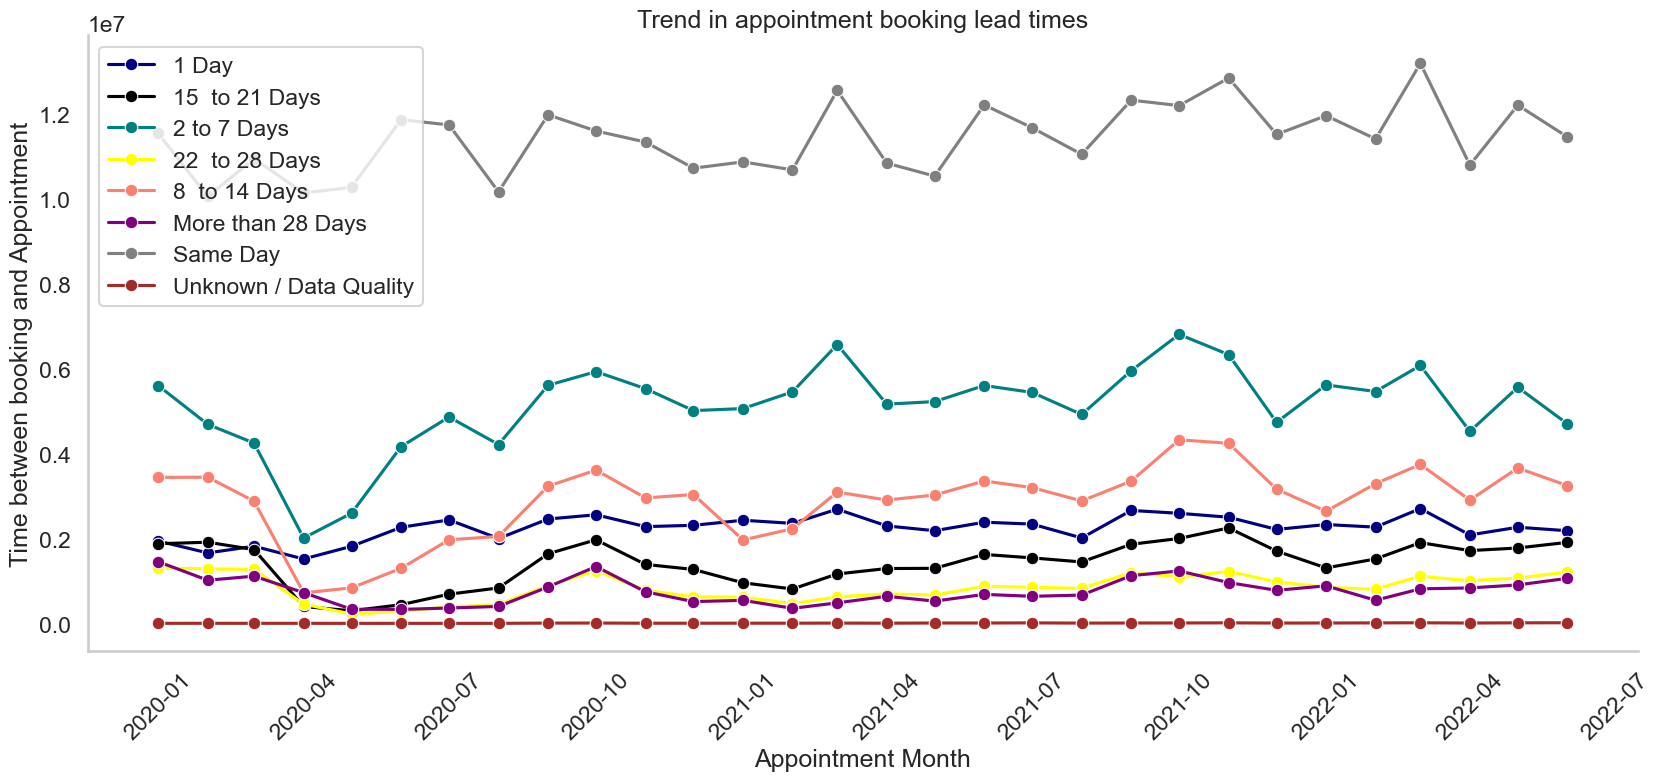

In [578]:
fig = plt.subplots(figsize=(20, 8))
plt.xticks(rotation=45)

sns.set_context("talk")

plt.rcParams.update({'font.size': 17})


# Create a Seaborn line plot with different markers for each product
sns.lineplot(x='appointment_month', y='1 Day', data=t2b_vis.reset_index(), marker='o', color='navy', label='1 Day')
sns.lineplot(x='appointment_month', y='15  to 21 Days', data=t2b_vis.reset_index(), marker='o', color='black', label='15  to 21 Days')
sns.lineplot(x='appointment_month', y='2 to 7 Days', data=t2b_vis.reset_index(), marker='o', color='teal', label='2 to 7 Days')
sns.lineplot(x='appointment_month', y='22  to 28 Days', data=t2b_vis.reset_index(), marker='o', color='yellow', label='22  to 28 Days')
sns.lineplot(x='appointment_month', y='8  to 14 Days', data=t2b_vis.reset_index(), marker='o', color='salmon', label='8  to 14 Days')
sns.lineplot(x='appointment_month', y='More than 28 Days', data=t2b_vis.reset_index(), marker='o', color='purple', label='More than 28 Days')
sns.lineplot(x='appointment_month', y='Same Day', data=t2b_vis.reset_index(), marker='o', color='grey', label='Same Day')
sns.lineplot(x='appointment_month', y='Unknown / Data Quality', data=t2b_vis.reset_index(), marker='o', color='brown', label='Unknown / Data Quality')
    
    
    
    
# Set plot title and axes labels
plt.title('Trend in appointment booking lead times')
plt.xlabel('Appointment Month')
plt.ylabel('Time between booking and Appointment')
 
# Add a legend
plt.legend(loc='upper left')
 
# Add a grid
plt.grid(False)
 
# Remove the top and right spines
sns.despine()
 
# Show the plot
plt.show()

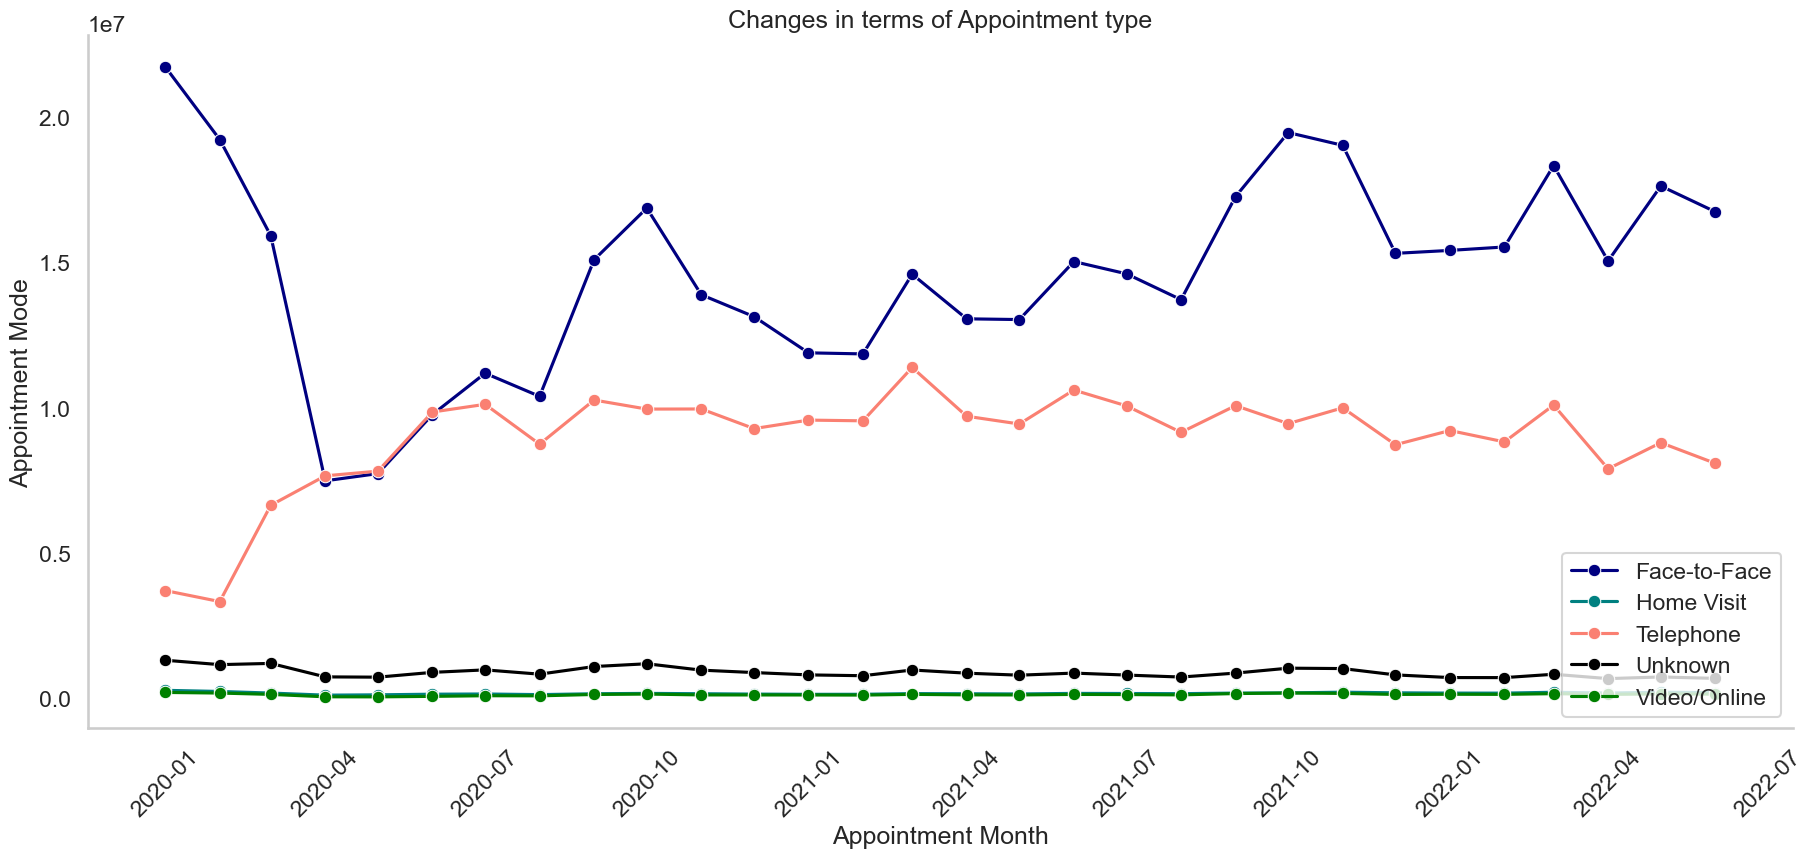

In [579]:

fig = plt.subplots(figsize=(22, 9))
plt.xticks(rotation=45)

sns.set_context("talk")

plt.rcParams.update({'font.size': 19})


# Create a Seaborn line plot with different markers for each product
sns.lineplot(x='appointment_month', y='Face-to-Face', data=appt_type_vis.reset_index(), marker='o', color='navy', label='Face-to-Face')
sns.lineplot(x='appointment_month', y='Home Visit', data=appt_type_vis.reset_index(), marker='o', color='teal', label='Home Visit')
sns.lineplot(x='appointment_month', y='Telephone', data=appt_type_vis.reset_index(), marker='o', color='salmon', label='Telephone')
sns.lineplot(x='appointment_month', y='Unknown', data=appt_type_vis.reset_index(), marker='o', color='black', label='Unknown')
sns.lineplot(x='appointment_month', y='Video/Online', data=appt_type_vis.reset_index(), marker='o', color='green', label='Video/Online')
 
# Set plot title and axes labels
plt.title('Changes in terms of Appointment type')
plt.xlabel('Appointment Month')
plt.ylabel('Appointment Mode')
 
# Add a legend
plt.legend(loc='lower right')
 
# Add a grid
plt.grid(False)
 
# Remove the top and right spines
sns.despine()
 
# Show the plot
plt.show()

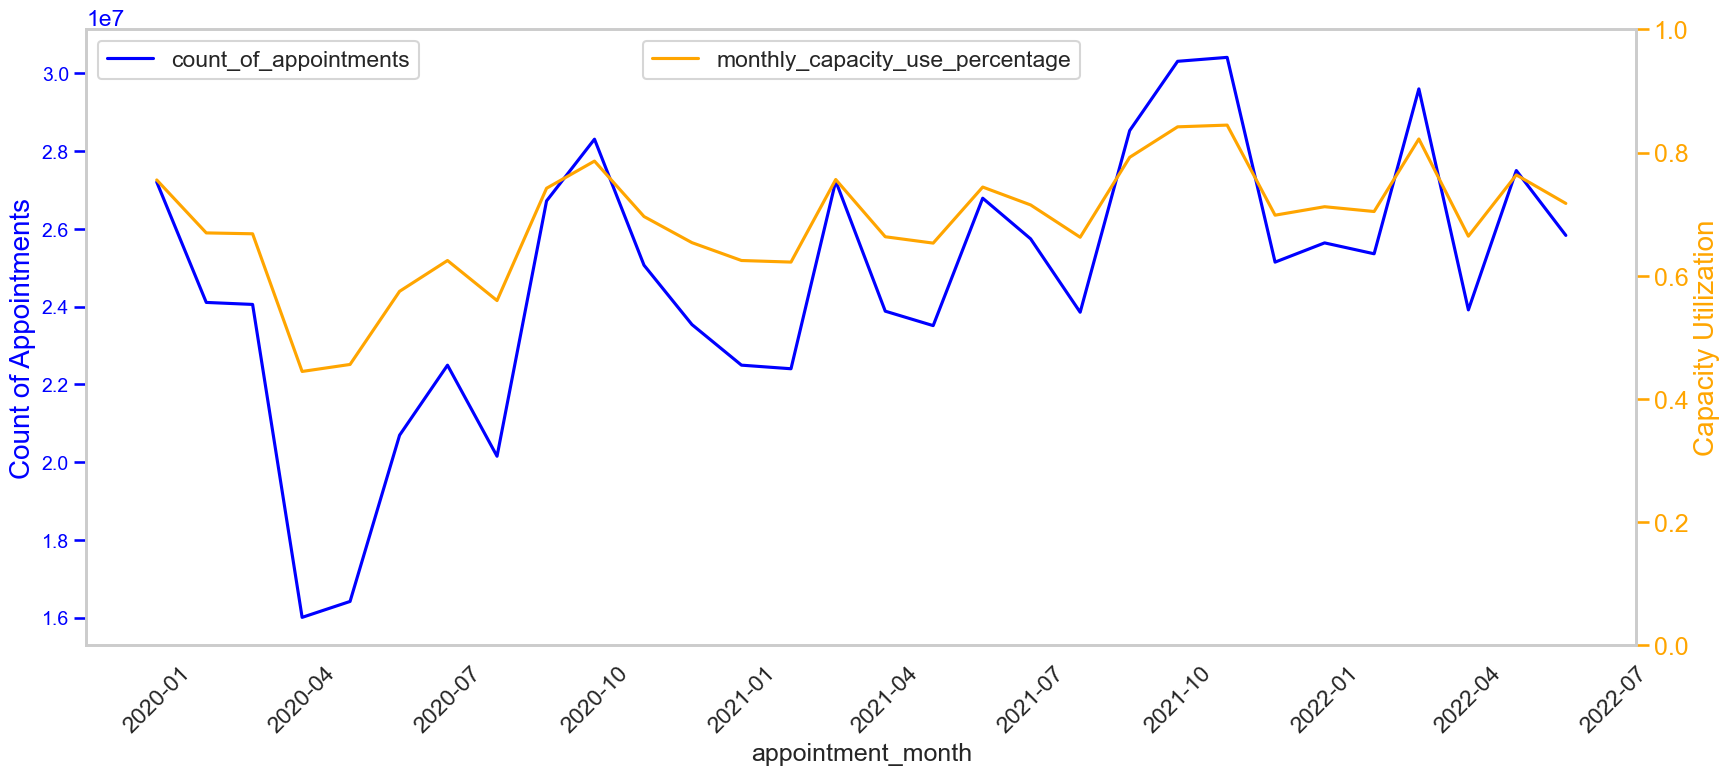

In [580]:
fig = plt.subplots(figsize=(20, 8))
plt.xticks(rotation=45)

sns.set_context("talk")



sns.set_palette('colorblind')

# plot line chart on axis #1
ax1 = sns.lineplot(
    x='appointment_month', 
    y='count_of_appointments', 
    data=ar_df_cap.reset_index(), 
    sort=False, 
    color='blue'
)
ax1.set_ylabel('Count of Appointments')
ax1.legend(['count_of_appointments'], loc="upper left")
ax1.yaxis.label.set_color('blue')
ax1.yaxis.label.set_fontsize(20)
ax1.tick_params(axis='y', colors='blue', labelsize=14)


# set up the 2nd axis
ax2 = ax1.twinx() 

# plot bar chart on axis #2
sns.lineplot(
    x='appointment_month', 
    y='monthly_cap_use_percentage', 
    data=ar_df_cap.reset_index(), 
    sort=False, 
    color='orange', 
    ax = ax2       # Pre-existing axes for the plot
)
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('Capacity Utilization')
ax2.set_ylim(0, 1)
ax2.legend(['monthly_capacity_use_percentage'], loc="upper center")
ax2.yaxis.label.set_color('orange')
ax2.yaxis.label.set_fontsize(20)
ax2.tick_params(axis='y', colors='orange', labelsize=18)




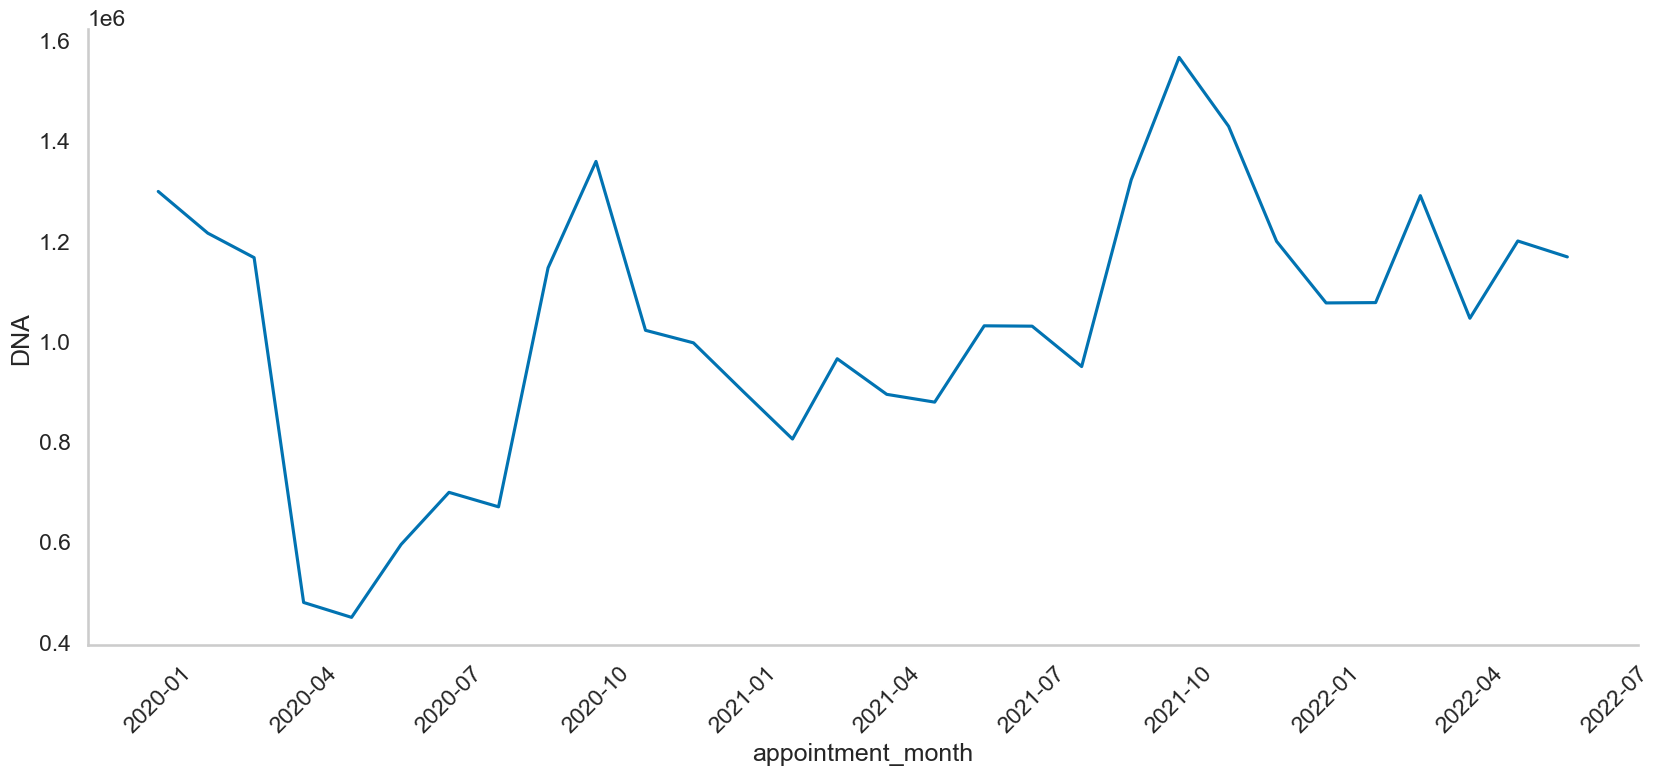

In [581]:
fig = plt.subplots(figsize=(20, 8))
plt.xticks(rotation=45)

sns.set_context("talk")

# Remove the top and right spines
sns.despine()

sns.lineplot(x="appointment_month", y="DNA", data=appt_status_vis) 
plt.show()

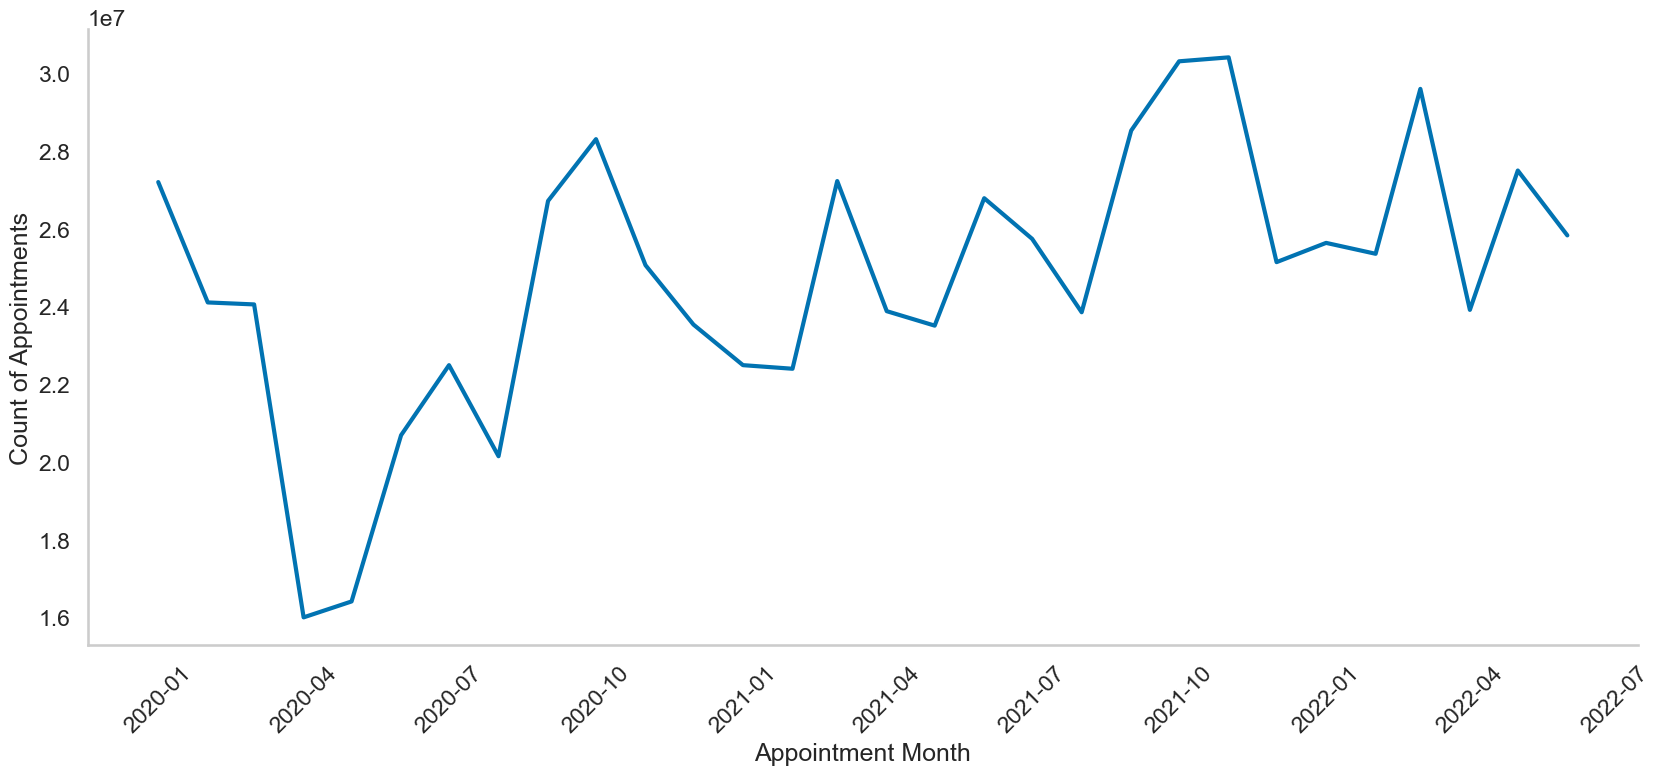

In [582]:
fig = plt.subplots(figsize=(20, 8))
plt.xticks(rotation=45)

sns.set_context("poster")

plt.xlabel('Appointment Month')
plt.ylabel('Count of Appointments')

# Remove the top and right spines
sns.despine()

sns.lineplot(x="appointment_month", y="count_of_appointments", data=ar_df_cap) 
plt.show()

<Axes: ylabel='Total'>

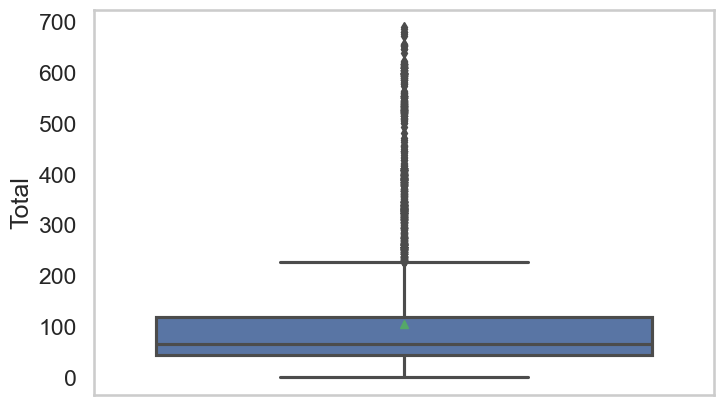

In [583]:
sns.set(rc={'figure.figsize':(8,5)})

sns.set_context("talk")


sns.set_style("whitegrid", 
              {'axes.grid' : False})
sns.boxplot(y=appt_qtr_ons_status['Total'], 
            orient='v', 
            showmeans=True)


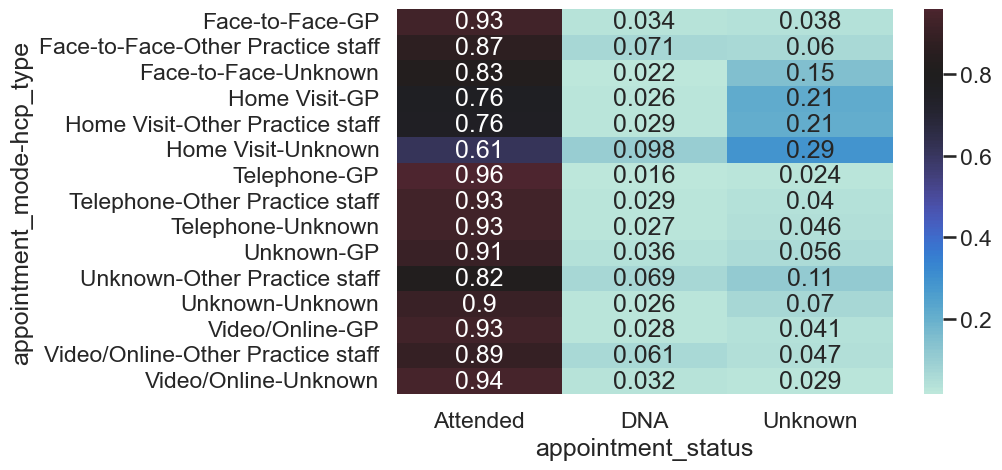

In [584]:
#heatmap with continous colour palette to illustrate outliers in the overall dataset and surface weak signals 


sns.heatmap(pd.crosstab([ar_sub.appointment_mode,ar_sub.hcp_type],ar_sub.appointment_status,
            values=ar_sub.count_of_appointments,
            aggfunc='sum',
            normalize='index'),cmap="BuGn", annot=True, cbar=False)

# plot heatmap
sns.heatmap(df1, center=0.8)
plt.show()
sns.set_context("talk")

<Axes: title={'center': 'Trend in Appointment Mode numbers'}, xlabel='Appointment Month', ylabel='Appointment Mode'>

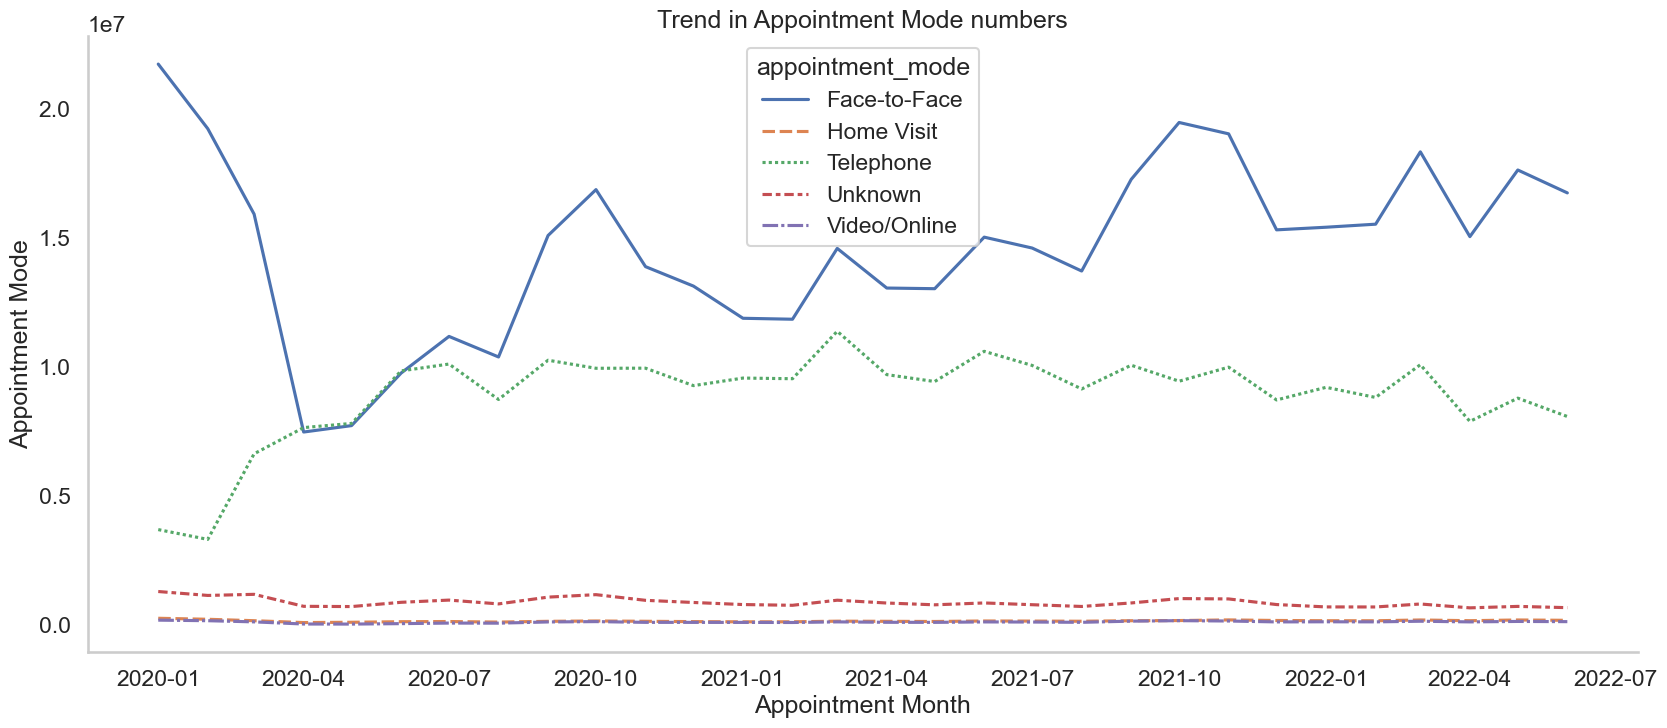

In [585]:
fig = plt.subplots(figsize=(20, 8))

sns.set_context("talk")

plt.xlabel('Appointment Month')
plt.ylabel('Appointment Mode')
plt.title('Trend in Appointment Mode numbers')

# Remove the top and right spines
sns.despine()

sns.lineplot(data= app_mode_num[['Face-to-Face', 'Home Visit', 'Telephone','Unknown','Video/Online']])

<Axes: title={'center': 'Trend in Healthcare Professional Appointment numbers'}, xlabel='Appointment Month', ylabel='Healthcare Professional Type (hcp)'>

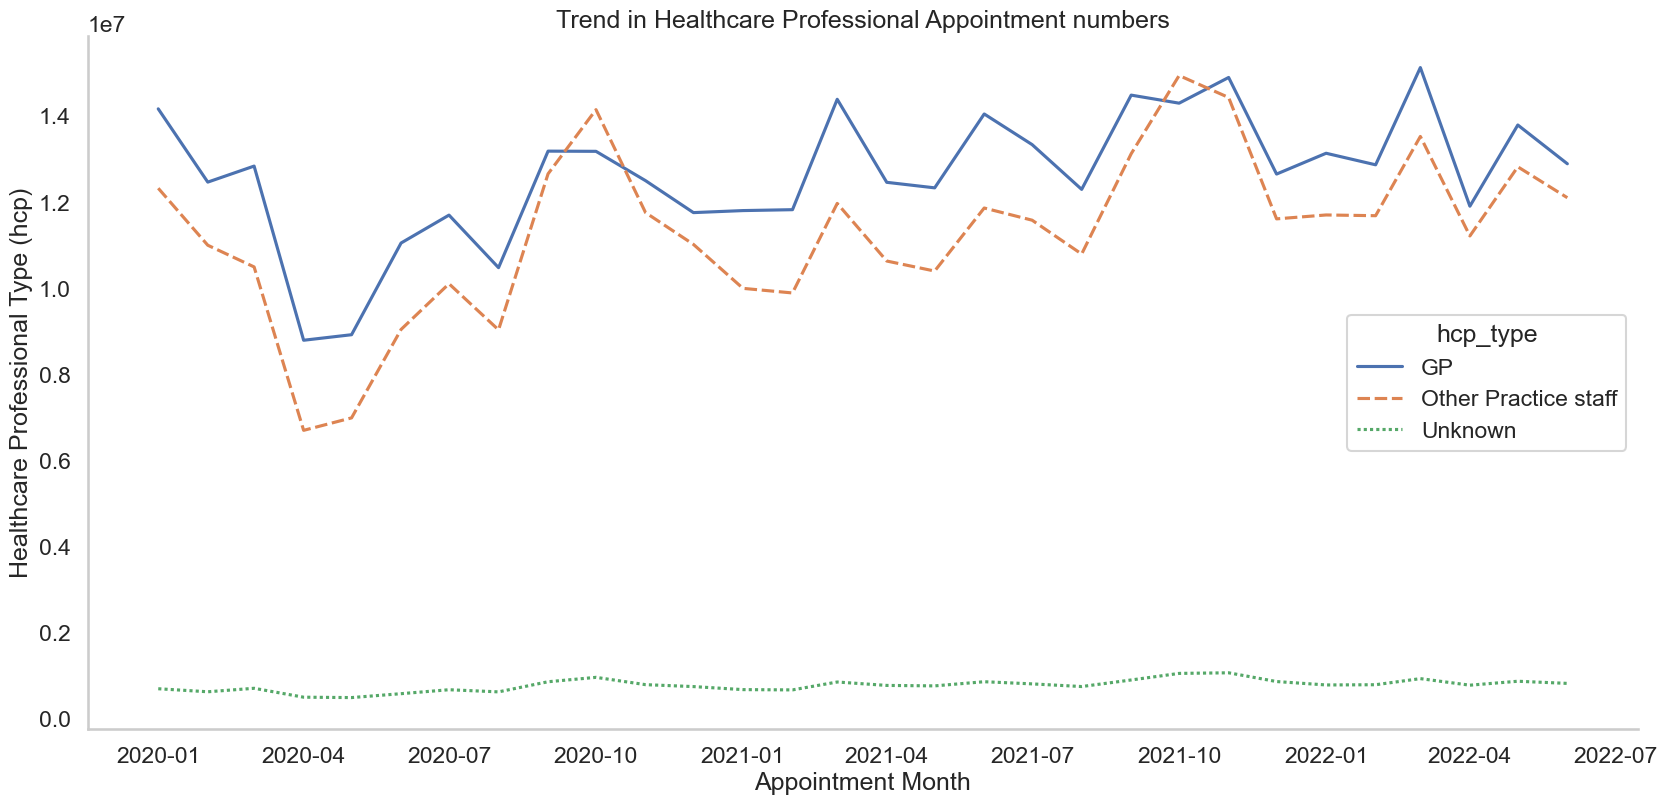

In [586]:
fig = plt.subplots(figsize=(20, 9))

sns.set_context("talk")

plt.xlabel('Appointment Month')
plt.ylabel('Healthcare Professional Type (hcp)')
plt.title('Trend in Healthcare Professional Appointment numbers')

# Remove the top and right spines
sns.despine()

sns.lineplot(data=hcp_num[['GP', 'Other Practice staff', 'Unknown']])

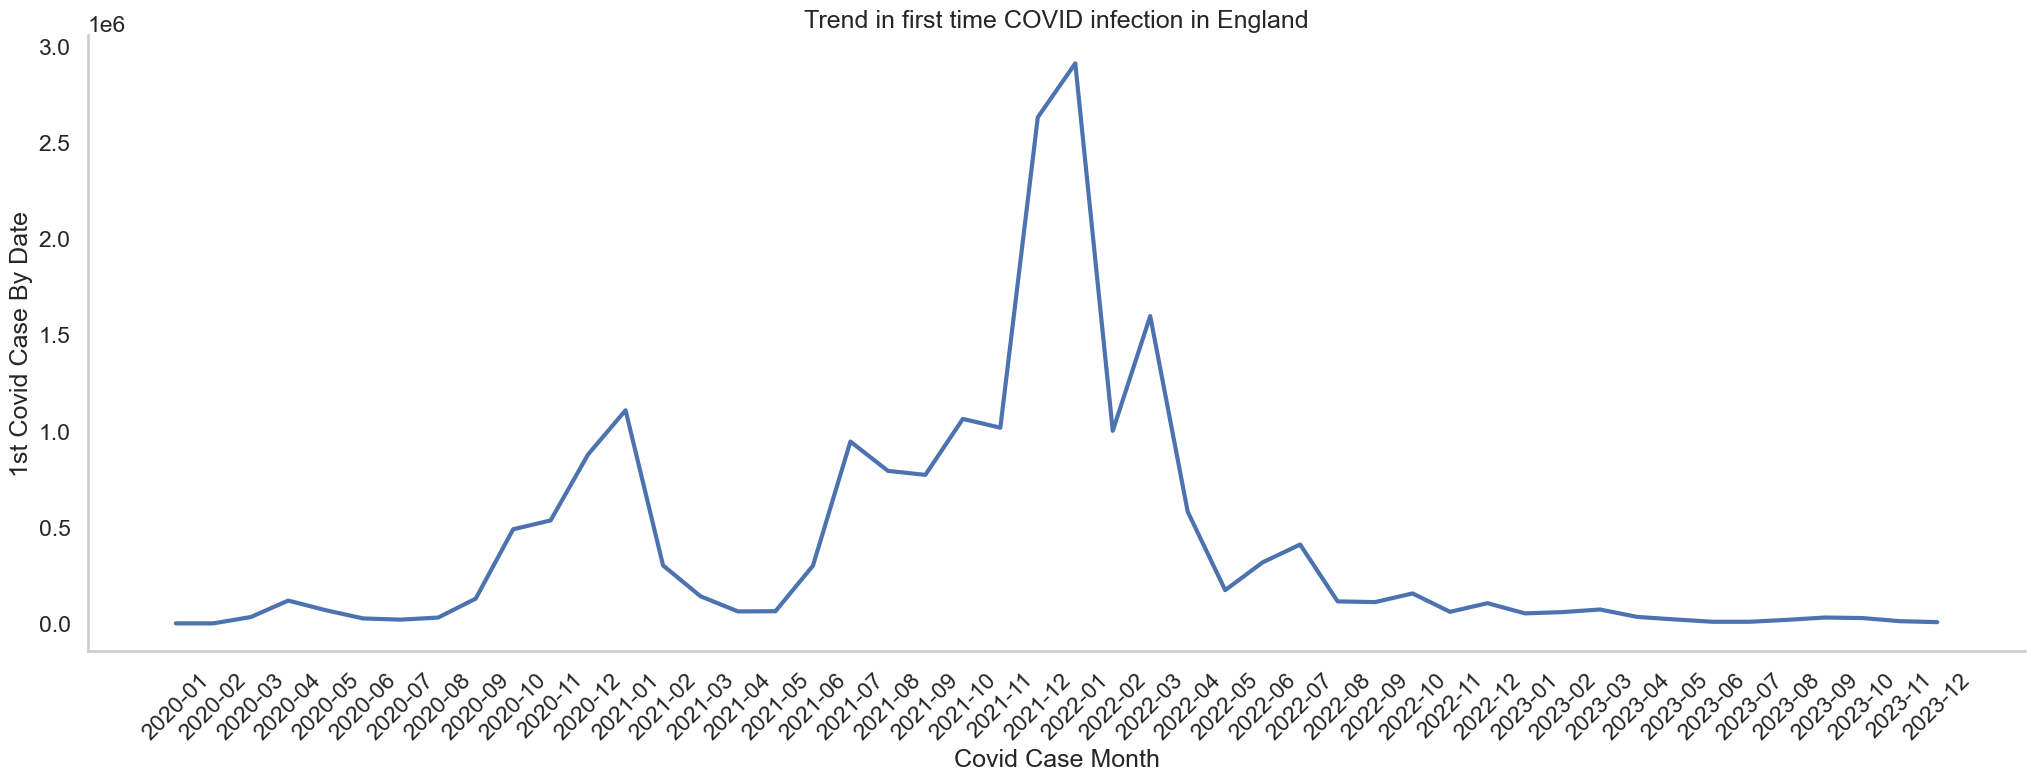

In [587]:

fig = plt.subplots(figsize=(25, 8))
plt.xticks(rotation=45)



plt.xlabel('Covid Case Month')
plt.ylabel('1st Covid Case By Date')
plt.title('Trend in first time COVID infection in England')

plt.rcParams.update({'font.size': 30})

sns.set_context("poster")

# Remove the top and right spines
sns.despine()

sns.lineplot( data=covid_cases_eng )
plt.show()

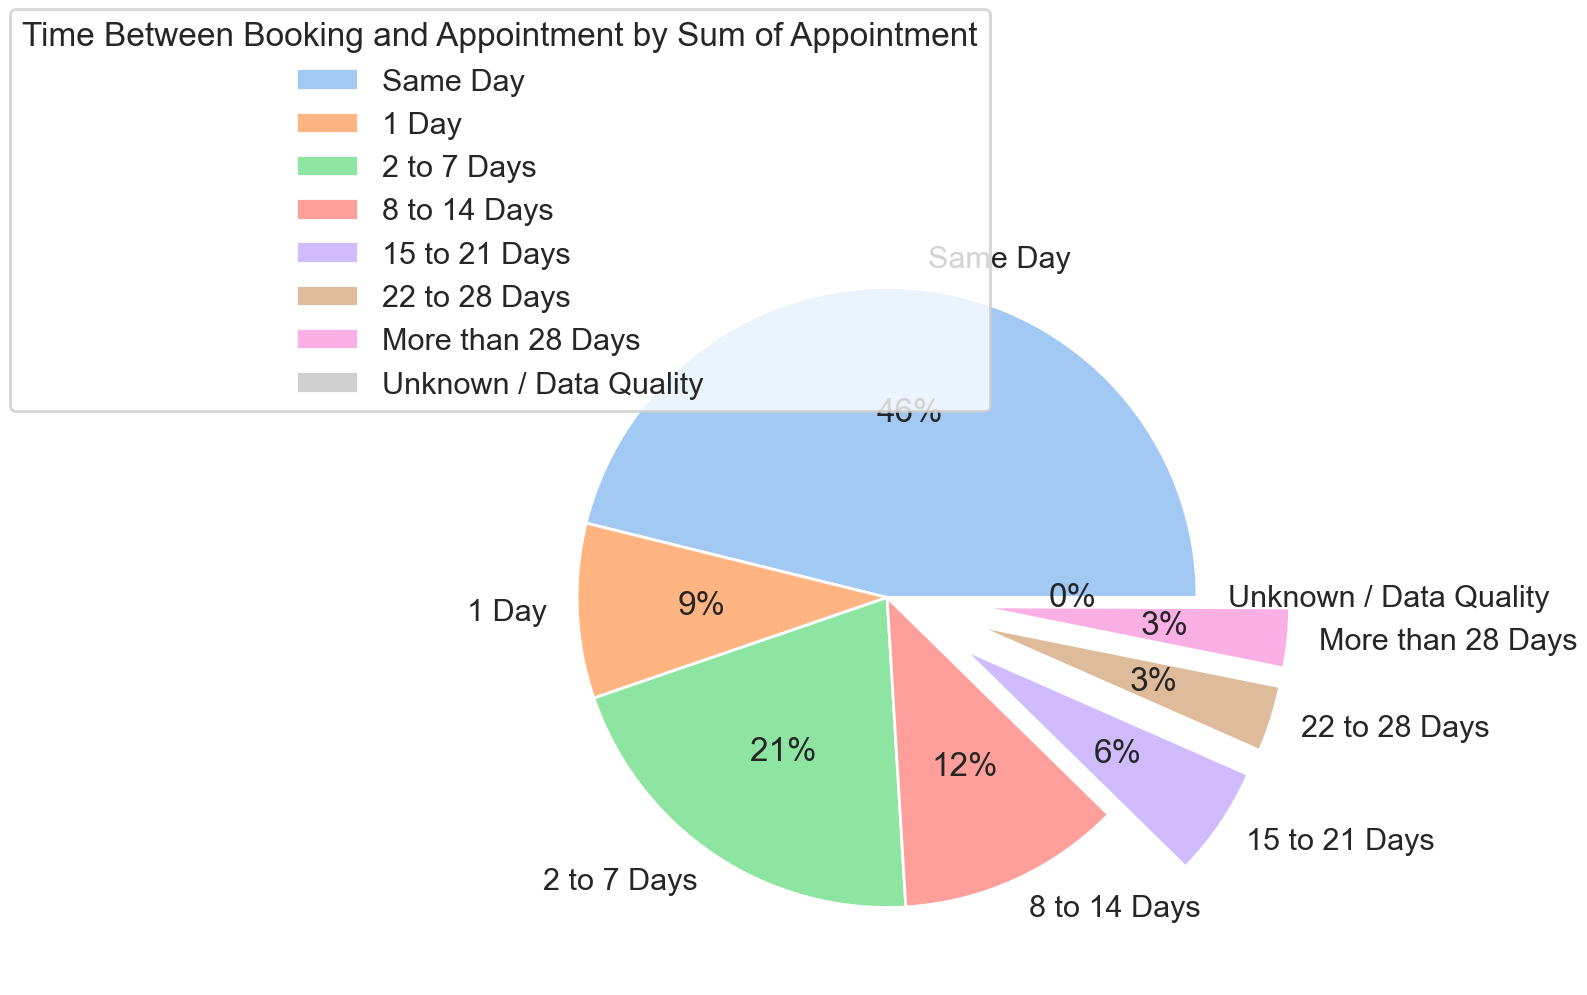

In [588]:
# Pie chart, where the slices will be ordered
# slice of significance have been exploded out for emphasis 


fig = plt.subplots(figsize=(10, 15))
explode = (0.0, 0.0, 0.0, 0.0, 0.3, 0.3, 0.3, 0.0 )

count_of_appointments = [342747171, 67716097, 153794531,86846519,42710574,25536541,23050987, 402105 ]
time_between_book_and_appointment = ['Same Day','1 Day','2 to 7 Days','8 to 14 Days','15 to 21 Days','22 to 28 Days','More than 28 Days','Unknown / Data Quality']


palette_color = sns.color_palette('pastel') 

plt.pie(count_of_appointments, 
        labels=time_between_book_and_appointment, 
        colors=palette_color,
        autopct='%.0f%%',
        explode=explode)

plt.legend(title="Time Between Booking and Appointment by Sum of Appointment",
           loc="center",
           bbox_to_anchor=(0.0, 1, 0.001, 0.0))

sns.set_context("talk")


plt.show()

In [589]:
ar_ct_hcp_t2b

appointment_status                                      Attended       DNA  \
time_between_book_and_appointment hcp_type                                   
1 Day                             GP                    0.941152  0.027854   
                                  Other Practice staff  0.906565  0.051970   
                                  Unknown               0.881144  0.037444   
15  to 21 Days                    GP                    0.871801  0.050850   
                                  Other Practice staff  0.825974  0.090362   
                                  Unknown               0.719587  0.059497   
2 to 7 Days                       GP                    0.925907  0.036562   
                                  Other Practice staff  0.879063  0.071997   
                                  Unknown               0.841312  0.049419   
22  to 28 Days                    GP                    0.842186  0.054054   
                                  Other Practice staff  0.806067  0.089824   
                                  Unknown               0.654232  0.057256   
8  to 14 Days                     GP                    0.897836  0.045387   
                                  Other Practice staff  0.849639  0.085288   
                                  Unknown               0.774524  0.060064   
More than 28 Days                 GP                    0.728244  0.069980   
                                  Other Practice staff  0.730363  0.095098   
                                  Unknown               0.503191  0.054812   
Same Day                          GP                    0.966862  0.014475   
                                  Other Practice staff  0.942618  0.024833   
                                  Unknown               0.935968  0.014379   
Unknown / Data Quality            GP                    0.724121  0.030384   
                                  Other Practice staff  0.685107  0.044350   
                                  Unknown               0.681908  0.008373   
Total                                                   0.912428  0.041614   

appointment_status                                       Unknown  
time_between_book_and_appointment hcp_type                        
1 Day                             GP                    0.030993  
                                  Other Practice staff  0.041465  
                                  Unknown               0.081412  
15  to 21 Days                    GP                    0.077349  
                                  Other Practice staff  0.083664  
                                  Unknown               0.220916  
2 to 7 Days                       GP                    0.037530  
                                  Other Practice staff  0.048940  
                                  Unknown               0.109269  
22  to 28 Days                    GP                    0.103760  
                                  Other Practice staff  0.104109  
                                  Unknown               0.288511  
8  to 14 Days                     GP                    0.056777  
                                  Other Practice staff  0.065073  
                                  Unknown               0.165412  
More than 28 Days                 GP                    0.201776  
                                  Other Practice staff  0.174540  
                                  Unknown               0.441997  
Same Day                          GP                    0.018663  
                                  Other Practice staff  0.032549  
                                  Unknown               0.049653  
Unknown / Data Quality            GP                    0.245495  
                                  Other Practice staff  0.270543  
                                  Unknown               0.309719  
Total                                                   0.045957

In [590]:
ar_ct_hcp_t2b.describe()

appointment_status   Attended        DNA    Unknown
count               25.000000  25.000000  25.000000
mean                 0.817112   0.050645   0.132243
std                  0.114147   0.024057   0.110153
min                  0.503191   0.008373   0.018663
25%                  0.728244   0.036562   0.048940
50%                  0.842186   0.050850   0.083664
75%                  0.906565   0.060064   0.201776
max                  0.966862   0.095098   0.441997

In [591]:
df = ar_ct_hcp_t2b['DNA']
df = pd.DataFrame(df)
df.unstack()

DNA                                 \
hcp_type                                           GP Other Practice staff   
time_between_book_and_appointment                                            
1 Day                                   NaN  0.027854             0.051970   
15  to 21 Days                          NaN  0.050850             0.090362   
2 to 7 Days                             NaN  0.036562             0.071997   
22  to 28 Days                          NaN  0.054054             0.089824   
8  to 14 Days                           NaN  0.045387             0.085288   
More than 28 Days                       NaN  0.069980             0.095098   
Same Day                                NaN  0.014475             0.024833   
Total                              0.041614       NaN                  NaN   
Unknown / Data Quality                  NaN  0.030384             0.044350   

                                             
hcp_type                            Unknown  
time_between_book_and_appointment            
1 Day                              0.037444  
15  to 21 Days                     0.059497  
2 to 7 Days                        0.049419  
22  to 28 Days                     0.057256  
8  to 14 Days                      0.060064  
More than 28 Days                  0.054812  
Same Day                           0.014379  
Total                                   NaN  
Unknown / Data Quality             0.008373

In [592]:
df.unstack().reset_index()

time_between_book_and_appointment       DNA            \
hcp_type                                                    GP   
0                                    1 Day       NaN  0.027854   
1                           15  to 21 Days       NaN  0.050850   
2                              2 to 7 Days       NaN  0.036562   
3                           22  to 28 Days       NaN  0.054054   
4                            8  to 14 Days       NaN  0.045387   
5                        More than 28 Days       NaN  0.069980   
6                                 Same Day       NaN  0.014475   
7                                    Total  0.041614       NaN   
8                   Unknown / Data Quality       NaN  0.030384   

                                         
hcp_type Other Practice staff   Unknown  
0                    0.051970  0.037444  
1                    0.090362  0.059497  
2                    0.071997  0.049419  
3                    0.089824  0.057256  
4                    0.085288  0.060064  
5                    0.095098  0.054812  
6                    0.024833  0.014379  
7                         NaN       NaN  
8                    0.044350  0.008373

In [593]:
ar_merge.columns

Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments', 'icb_ons_code1', 'sub_icb_location_name',
       'sub_icb_location_code', 'Region', 'ICB_name', '_merge'],
      dtype='object')

In [594]:
dfx = ad_merge.groupby('Region')['count_of_appointments'].sum()
dfx = pd.DataFrame(dfx)
dfx.reset_index()

Region  count_of_appointments
0           East of England               46679960
1                    London               24488519
2                  Midlands               58137862
3  North East and Yorkshire              166830810
4                North West              181692422
5                South East               51180171
6                South West               18486437

In [595]:
dfx_sorted = dfx.reset_index().sort_values('count_of_appointments',ascending = False)

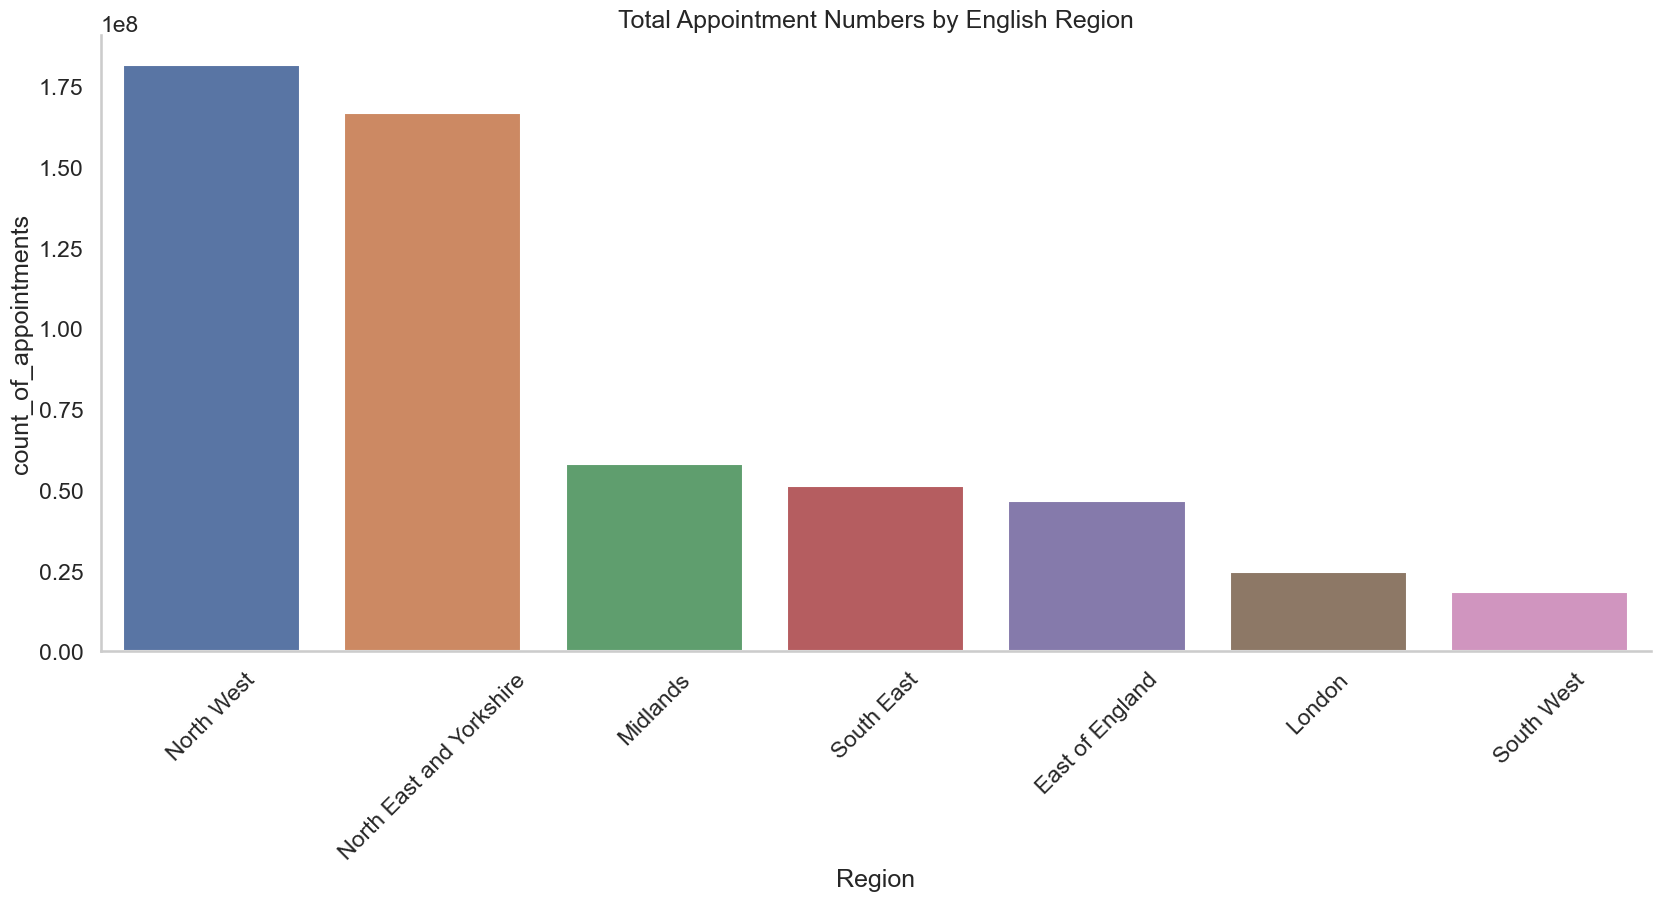

In [596]:
fig = plt.subplots(figsize=(20, 8))

sns.set_context("talk")
plt.xticks(rotation=45)

plt.xlabel('ICB Region')
plt.ylabel('Number of Appointment in Millions')
plt.title('Total Appointment Numbers by English Region')

# Remove the top and right spines
sns.despine()

sns.barplot(x = 'Region',
            y = 'count_of_appointments',
            data = dfx_sorted)
 
# Show the plot
plt.show() 

In [597]:
ar_merge.columns

Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments', 'icb_ons_code1', 'sub_icb_location_name',
       'sub_icb_location_code', 'Region', 'ICB_name', '_merge'],
      dtype='object')

In [598]:
ar_merge_ct = pd.crosstab(ar_merge['Region'],
                            ar['appointment_status'],
                            values=ar['count_of_appointments'],
                            aggfunc='sum',
                            normalize='index')
ar_merge_ct

appointment_status        Attended       DNA   Unknown
Region                                                
East of England           0.910523  0.042912  0.046565
London                    0.910923  0.047354  0.041722
Midlands                  0.910074  0.041937  0.047989
North East and Yorkshire  0.911634  0.042243  0.046122
North West                0.912661  0.041565  0.045774
South East                0.918528  0.037218  0.044255
South West                0.915675  0.037272  0.047053

In [599]:
pd.DataFrame(ar_merge_ct)

appointment_status        Attended       DNA   Unknown
Region                                                
East of England           0.910523  0.042912  0.046565
London                    0.910923  0.047354  0.041722
Midlands                  0.910074  0.041937  0.047989
North East and Yorkshire  0.911634  0.042243  0.046122
North West                0.912661  0.041565  0.045774
South East                0.918528  0.037218  0.044255
South West                0.915675  0.037272  0.047053

In [600]:
ar_merge_ct_plot = pd.DataFrame(ar_merge_ct).drop(['Attended','Unknown'],axis=1)   
ar_merge_ct_plot

appointment_status             DNA
Region                            
East of England           0.042912
London                    0.047354
Midlands                  0.041937
North East and Yorkshire  0.042243
North West                0.041565
South East                0.037218
South West                0.037272

In [601]:
ar_merge_ct_plot_sorted = ar_merge_ct_plot.sort_values('DNA',ascending = False)

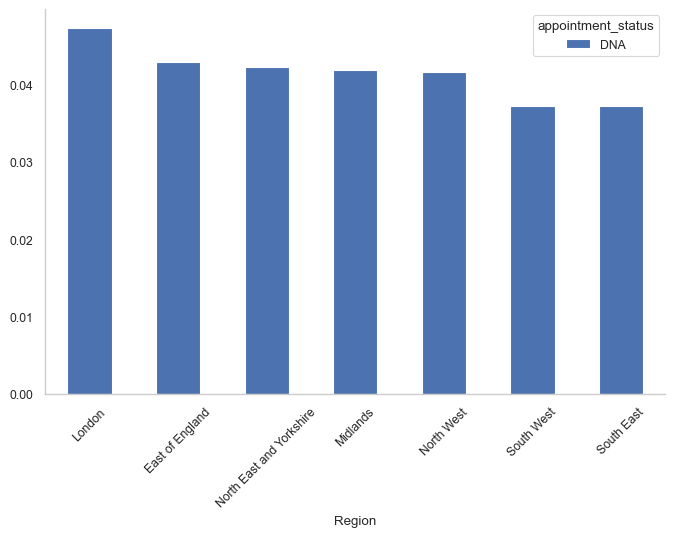

In [602]:
figsize=(20, 8)
sns.set_context("paper")

ar_merge_ct_plot_sorted.plot(kind='bar')
plt.xticks(rotation=45)

# Remove the top and right spines
sns.despine()


In [603]:
df.copy()

DNA
time_between_book_and_appointment hcp_type                      
1 Day                             GP                    0.027854
                                  Other Practice staff  0.051970
                                  Unknown               0.037444
15  to 21 Days                    GP                    0.050850
                                  Other Practice staff  0.090362
                                  Unknown               0.059497
2 to 7 Days                       GP                    0.036562
                                  Other Practice staff  0.071997
                                  Unknown               0.049419
22  to 28 Days                    GP                    0.054054
                                  Other Practice staff  0.089824
                                  Unknown               0.057256
8  to 14 Days                     GP                    0.045387
                                  Other Practice staff  0.085288
                                  Unknown               0.060064
More than 28 Days                 GP                    0.069980
                                  Other Practice staff  0.095098
                                  Unknown               0.054812
Same Day                          GP                    0.014475
                                  Other Practice staff  0.024833
                                  Unknown               0.014379
Unknown / Data Quality            GP                    0.030384
                                  Other Practice staff  0.044350
                                  Unknown               0.008373
Total                                                   0.041614

In [604]:
#ar_merge

df_status_region = pd.crosstab([ar_merge.Region],
            ar_merge.appointment_status,
            values=ad_merge.count_of_appointments,
            aggfunc='sum',
            normalize='all')

df_status_region.reset_index()



appointment_status                    Region  Attended       DNA   Unknown
0                            East of England  0.021309  0.015572  0.018560
1                                     London  0.006682  0.005519  0.007178
2                                   Midlands  0.006125  0.005035  0.005238
3                   North East and Yorkshire  0.169833  0.116284  0.137603
4                                 North West  0.132360  0.091046  0.110586
5                                 South East  0.048690  0.032863  0.043140
6                                 South West  0.010234  0.007354  0.008787

In [605]:
df_status_region.reset_index().describe()

appointment_status  Attended       DNA   Unknown
count               7.000000  7.000000  7.000000
mean                0.056462  0.039096  0.047299
std                 0.067155  0.045724  0.054567
min                 0.006125  0.005035  0.005238
25%                 0.008458  0.006437  0.007983
50%                 0.021309  0.015572  0.018560
75%                 0.090525  0.061955  0.076863
max                 0.169833  0.116284  0.137603

In [606]:
ar_merge.columns

Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments', 'icb_ons_code1', 'sub_icb_location_name',
       'sub_icb_location_code', 'Region', 'ICB_name', '_merge'],
      dtype='object')

In [607]:
ar_merge_subset = ar_merge[['count_of_appointments','appointment_status','Region']]


In [608]:
ar_merge_subset.groupby(['Region','appointment_status'])['count_of_appointments'].sum()

dfx = ar_merge_subset.groupby(['Region','appointment_status'])['count_of_appointments'].sum()


dfx.reset_index()

Region appointment_status  count_of_appointments
0            East of England           Attended              189612033
1            East of England                DNA                6522095
2            East of England            Unknown                9746494
3                     London           Attended               97642875
4                     London                DNA                5457490
5                     London            Unknown                4584497
6                   Midlands           Attended              234131707
7                   Midlands                DNA               10946616
8                   Midlands            Unknown               11802664
9   North East and Yorkshire           Attended              677694372
10  North East and Yorkshire                DNA               26833379
11  North East and Yorkshire            Unknown               35659614
12                North West           Attended              728694838
13                North West                DNA               42105887
14                North West            Unknown               40083267
15                South East           Attended              206560385
16                South East                DNA                8892316
17                South East            Unknown                9898357
18                South West           Attended               75997183
19                South West                DNA                3047210
20                South West            Unknown                3924909

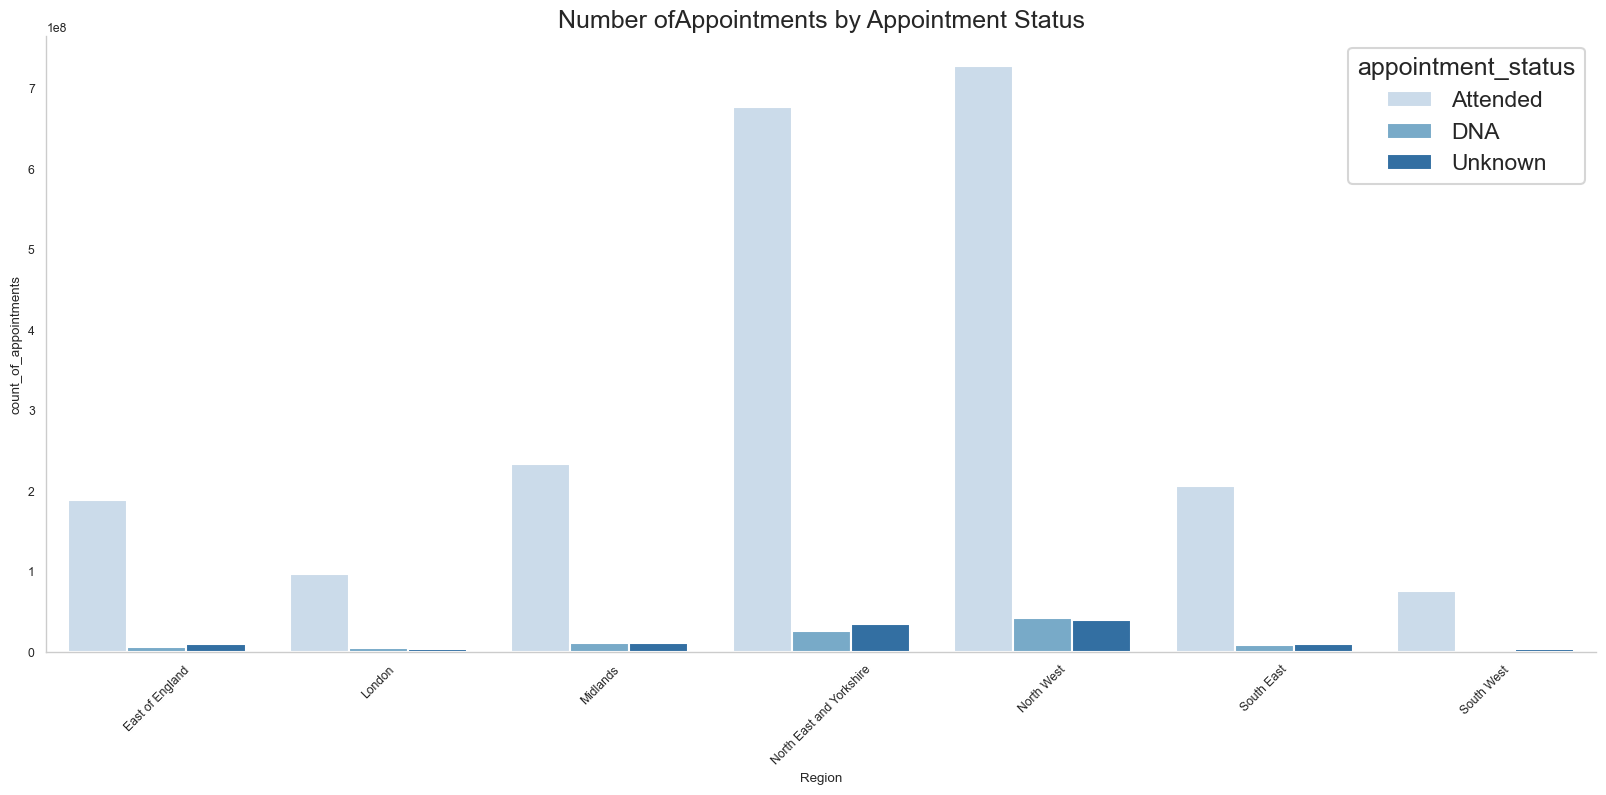

In [609]:
fig = plt.subplots(figsize=(20, 8))
sns.set_context("talk")


plt.title('Number ofAppointments by Appointment Status')

sns.barplot(x = 'Region',
            y = 'count_of_appointments',
            hue = 'appointment_status',
            data = dfx.reset_index(),
            palette = "Blues")

# Remove the top and right spines
sns.despine()
 
# Show the plot
sns.set_context("notebook")
plt.xticks(rotation=45)
plt.show()

# 7.0 Regionalized and Normalised Data  - Python Query

In [610]:
#creating the subset to preserve processing power 

ar_merge_subset2 = ar_merge[['count_of_appointments','appointment_status','Region','ICB_name']]

ar_merge_subset2.reset_index()

index  count_of_appointments appointment_status  \
0              0                   8107           Attended   
1              1                   6791           Attended   
2              2                  20686           Attended   
3              3                   4268           Attended   
4              4                  11971           Attended   
...          ...                    ...                ...   
2790218  2790218                     10            Unknown   
2790219  2790219                     10            Unknown   
2790220  2790220                     10            Unknown   
2790221  2790221                     10            Unknown   
2790222  2790222                     10            Unknown   

                           Region  \
0                      South East   
1                      South East   
2                      South East   
3                      South East   
4                      South East   
...                           ...   
2790218  North East and Yorkshire   
2790219  North East and Yorkshire   
2790220  North East and Yorkshire   
2790221  North East and Yorkshire   
2790222  North East and Yorkshire   

                                                  ICB_name  
0                        NHS Frimley Integrated Care Board  
1                        NHS Frimley Integrated Care Board  
2                        NHS Frimley Integrated Care Board  
3                        NHS Frimley Integrated Care Board  
4                        NHS Frimley Integrated Care Board  
...                                                    ...  
2790218  NHS North East and North Cumbria Integrated Ca...  
2790219  NHS North East and North Cumbria Integrated Ca...  
2790220  NHS North East and North Cumbria Integrated Ca...  
2790221  NHS North East and North Cumbria Integrated Ca...  
2790222  NHS North East and North Cumbria Integrated Ca...  

[2790223 rows x 5 columns]

In [611]:
#crosstab to obtianed normalized data for ease of comparison 

df_status_region = pd.crosstab([ar_merge.Region],
            ar_merge.appointment_status,
            values=ad_merge.count_of_appointments,
            aggfunc='sum',normalize='index')

df_status_region

appointment_status        Attended       DNA   Unknown
Region                                                
East of England           0.384361  0.280874  0.334765
London                    0.344795  0.284804  0.370402
Midlands                  0.373509  0.307074  0.319416
North East and Yorkshire  0.400815  0.274435  0.324750
North West                0.396296  0.272600  0.331104
South East                0.390477  0.263555  0.345968
South West                0.388007  0.278828  0.333165

In [612]:



 

ar_merge_sub_ct_tb2 = pd.crosstab([ar_merge.Region,ar_merge.time_between_book_and_appointment],
            ar_merge.appointment_status,
            values=ad_merge.count_of_appointments,
            aggfunc='sum',margins='True')

ar_merge_sub_ct_tb2.reset_index()



appointment_status                    Region  \
0                            East of England   
1                            East of England   
2                            East of England   
3                            East of England   
4                            East of England   
5                            East of England   
6                            East of England   
7                            East of England   
8                                     London   
9                                     London   
10                                    London   
11                                    London   
12                                    London   
13                                    London   
14                                    London   
15                                    London   
16                                  Midlands   
17                                  Midlands   
18                                  Midlands   
19                                  Midlands   
20                                  Midlands   
21                                  Midlands   
22                                  Midlands   
23                                  Midlands   
24                  North East and Yorkshire   
25                  North East and Yorkshire   
26                  North East and Yorkshire   
27                  North East and Yorkshire   
28                  North East and Yorkshire   
29                  North East and Yorkshire   
30                  North East and Yorkshire   
31                  North East and Yorkshire   
32                                North West   
33                                North West   
34                                North West   
35                                North West   
36                                North West   
37                                North West   
38                                North West   
39                                North West   
40                                South East   
41                                South East   
42                                South East   
43                                South East   
44                                South East   
45                                South East   
46                                South East   
47                                South East   
48                                South West   
49                                South West   
50                                South West   
51                                South West   
52                                South West   
53                                South West   
54                                South West   
55                                South West   
56                                       All   

appointment_status time_between_book_and_appointment     Attended  \
0                                              1 Day    1718970.0   
1                                     15  to 21 Days    1410301.0   
2                                        2 to 7 Days    1705227.0   
3                                     22  to 28 Days    1328775.0   
4                                      8  to 14 Days    1617881.0   
5                                  More than 28 Days    1262384.0   
6                                           Same Day    1785333.0   
7                             Unknown / Data Quality     837961.0   
8                                              1 Day     531034.0   
9                                     15  to 21 Days     451774.0   
10                                       2 to 7 Days     521864.0   
11                                    22  to 28 Days     402970.0   
12                                     8  to 14 Days     466652.0   
13                                 More than 28 Days     393385.0   
14                                          Same Day     533018.0   
15                            Unknown / Data Quality     357738.0   
16                                        

In [613]:
ar_merge_sub_ct_tb2 = pd.crosstab([ar_merge.Region,ar_merge.time_between_book_and_appointment],
            ar_merge.appointment_status,
            values=ad_merge.count_of_appointments,
            aggfunc='sum',normalize='index')

ar_merge_sub_ct_tb2.reset_index()

appointment_status                    Region  \
0                            East of England   
1                            East of England   
2                            East of England   
3                            East of England   
4                            East of England   
5                            East of England   
6                            East of England   
7                            East of England   
8                                     London   
9                                     London   
10                                    London   
11                                    London   
12                                    London   
13                                    London   
14                                    London   
15                                    London   
16                                  Midlands   
17                                  Midlands   
18                                  Midlands   
19                                  Midlands   
20                                  Midlands   
21                                  Midlands   
22                                  Midlands   
23                                  Midlands   
24                  North East and Yorkshire   
25                  North East and Yorkshire   
26                  North East and Yorkshire   
27                  North East and Yorkshire   
28                  North East and Yorkshire   
29                  North East and Yorkshire   
30                  North East and Yorkshire   
31                  North East and Yorkshire   
32                                North West   
33                                North West   
34                                North West   
35                                North West   
36                                North West   
37                                North West   
38                                North West   
39                                North West   
40                                South East   
41                                South East   
42                                South East   
43                                South East   
44                                South East   
45                                South East   
46                                South East   
47                                South East   
48                                South West   
49                                South West   
50                                South West   
51                                South West   
52                                South West   
53                                South West   
54                                South West   
55                                South West   

appointment_status time_between_book_and_appointment  Attended       DNA  \
0                                              1 Day  0.379029  0.288096   
1                                     15  to 21 Days  0.380144  0.285369   
2                                        2 to 7 Days  0.360955  0.295211   
3                                     22  to 28 Days  0.385622  0.278889   
4                                      8  to 14 Days  0.384911  0.269902   
5                                  More than 28 Days  0.386481  0.276355   
6                                           Same Day  0.357473  0.328241   
7                             Unknown / Data Quality  0.568184  0.086948   
8                                              1 Day  0.342922  0.296116   
9                                     15  to 21 Days  0.348603  0.286097   
10                                       2 to 7 Days  0.331646  0.307155   
11                                    22  to 28 Days  0.341235  0.277861   
12                                     8  to 14 Days  0.330975  0.299077   
13                                 More than 28 Days  0.343256  0.273155   
14                                          Same Day  0.334070  0.304077   
15                            Unknown / Data Qu

In [614]:


ar_merge_sub_ct_tb3 = pd.crosstab([ar_merge.Region,ar_merge.hcp_type,ar_merge.time_between_book_and_appointment],
            ar_merge.appointment_status,
            values=ad_merge.count_of_appointments,
            aggfunc='sum',normalize='index')

ar_merge_sub_ct_tb3.reset_index()

appointment_status           Region hcp_type  \
0                   East of England       GP   
1                   East of England       GP   
2                   East of England       GP   
3                   East of England       GP   
4                   East of England       GP   
..                              ...      ...   
163                      South West  Unknown   
164                      South West  Unknown   
165                      South West  Unknown   
166                      South West  Unknown   
167                      South West  Unknown   

appointment_status time_between_book_and_appointment  Attended       DNA  \
0                                              1 Day  0.375679  0.302423   
1                                     15  to 21 Days  0.361516  0.296818   
2                                        2 to 7 Days  0.345282  0.321087   
3                                     22  to 28 Days  0.372684  0.291780   
4                                      8  to 14 Days  0.362124  0.285738   
..                                               ...       ...       ...   
163                                   22  to 28 Days  0.423386  0.211877   
164                                    8  to 14 Days  0.396680  0.271255   
165                                More than 28 Days  0.393922  0.241527   
166                                         Same Day  0.349035  0.317227   
167                           Unknown / Data Quality  0.532503  0.004765   

appointment_status   Unknown  
0                   0.321897  
1                   0.341666  
2                   0.333631  
3                   0.335536  
4                   0.352138  
..                       ...  
163                 0.364737  
164                 0.332065  
165                 0.364551  
166                 0.333738  
167                 0.462732  

[168 rows x 6 columns]

In [615]:
ar_merge_sub_ct_tb3.reset_index().describe()

appointment_status    Attended         DNA     Unknown
count               168.000000  168.000000  168.000000
mean                  0.399593    0.256444    0.343963
std                   0.068955    0.080679    0.045972
min                   0.290649    0.000000    0.234550
25%                   0.361993    0.243850    0.321080
50%                   0.379352    0.285533    0.334088
75%                   0.404923    0.304748    0.358639
max                   0.686679    0.356448    0.628131

In [616]:
dfx10 =  ar_merge_sub_ct_tb3.reset_index().query('DNA > 0.304748')
dfx10

appointment_status                    Region              hcp_type  \
2                            East of England                    GP   
6                            East of England                    GP   
13                           East of England  Other Practice staff   
14                           East of England  Other Practice staff   
24                                    London                    GP   
32                                    London  Other Practice staff   
34                                    London  Other Practice staff   
36                                    London  Other Practice staff   
38                                    London  Other Practice staff   
50                                  Midlands                    GP   
52                                  Midlands                    GP   
54                                  Midlands                    GP   
56                                  Midlands  Other Practice staff   
57                                  Midlands  Other Practice staff   
58                                  Midlands  Other Practice staff   
59                                  Midlands  Other Practice staff   
60                                  Midlands  Other Practice staff   
61                                  Midlands  Other Practice staff   
62                                  Midlands  Other Practice staff   
64                                  Midlands               Unknown   
65                                  Midlands               Unknown   
66                                  Midlands               Unknown   
67                                  Midlands               Unknown   
70                                  Midlands               Unknown   
82                  North East and Yorkshire  Other Practice staff   
86                  North East and Yorkshire  Other Practice staff   
102                               North West                    GP   
106                               North West  Other Practice staff   
110                               North West  Other Practice staff   
122                               South East                    GP   
128                               South East  Other Practice staff   
130                               South East  Other Practice staff   
133                               South East  Other Practice staff   
134                               South East  Other Practice staff   
150                               South West                    GP   
152                               South West  Other Practice staff   
153                               South West  Other Practice staff   
154                               South West  Other Practice staff   
155                               South West  Other Practice staff   
156                               South West  Other Practice staff   
158                               South West  Other Practice staff   
166                               South West               Unknown   

appointment_status time_between_book_and_appointment  Attended       DNA  \
2                                        2 to 7 Days  0.345282  0.321087   
6                                           Same Day  0.347443  0.356448   
13                                 More than 28 Days  0.364976  0.312968   
14                                          Same Day  0.374591  0.314188   
24                                             1 Day  0.356027  0.311051   
32                                             1 Day  0.313997  0.320173   
34                                       2 to 7 Days  0.300793  0.323455   
36                                     8  to 14 Days  0.290649  0.329613   
38                                          Same Day  0.295822  0.323793   
50                                       2 to 7 Days  0.362216  0.312982   
52                                     8  to 14 Days  0.368426  0.305125   
54                                          Same Day  0.378468  0.305074   
5

In [617]:
dfx11 = ar_merge_sub_ct_tb3.reset_index().query('DNA > 0.304748')
dfx11

appointment_status                    Region              hcp_type  \
2                            East of England                    GP   
6                            East of England                    GP   
13                           East of England  Other Practice staff   
14                           East of England  Other Practice staff   
24                                    London                    GP   
32                                    London  Other Practice staff   
34                                    London  Other Practice staff   
36                                    London  Other Practice staff   
38                                    London  Other Practice staff   
50                                  Midlands                    GP   
52                                  Midlands                    GP   
54                                  Midlands                    GP   
56                                  Midlands  Other Practice staff   
57                                  Midlands  Other Practice staff   
58                                  Midlands  Other Practice staff   
59                                  Midlands  Other Practice staff   
60                                  Midlands  Other Practice staff   
61                                  Midlands  Other Practice staff   
62                                  Midlands  Other Practice staff   
64                                  Midlands               Unknown   
65                                  Midlands               Unknown   
66                                  Midlands               Unknown   
67                                  Midlands               Unknown   
70                                  Midlands               Unknown   
82                  North East and Yorkshire  Other Practice staff   
86                  North East and Yorkshire  Other Practice staff   
102                               North West                    GP   
106                               North West  Other Practice staff   
110                               North West  Other Practice staff   
122                               South East                    GP   
128                               South East  Other Practice staff   
130                               South East  Other Practice staff   
133                               South East  Other Practice staff   
134                               South East  Other Practice staff   
150                               South West                    GP   
152                               South West  Other Practice staff   
153                               South West  Other Practice staff   
154                               South West  Other Practice staff   
155                               South West  Other Practice staff   
156                               South West  Other Practice staff   
158                               South West  Other Practice staff   
166                               South West               Unknown   

appointment_status time_between_book_and_appointment  Attended       DNA  \
2                                        2 to 7 Days  0.345282  0.321087   
6                                           Same Day  0.347443  0.356448   
13                                 More than 28 Days  0.364976  0.312968   
14                                          Same Day  0.374591  0.314188   
24                                             1 Day  0.356027  0.311051   
32                                             1 Day  0.313997  0.320173   
34                                       2 to 7 Days  0.300793  0.323455   
36                                     8  to 14 Days  0.290649  0.329613   
38                                          Same Day  0.295822  0.323793   
50                                       2 to 7 Days  0.362216  0.312982   
52                                     8  to 14 Days  0.368426  0.305125   
54                                          Same Day  0.378468  0.305074   
5

In [618]:
dfx12 = ar_merge_sub_ct_tb3.reset_index().query("(Region == 'London') and (hcp_type == 'Other Practice staff')")

dfx12

appointment_status  Region              hcp_type  \
32                  London  Other Practice staff   
33                  London  Other Practice staff   
34                  London  Other Practice staff   
35                  London  Other Practice staff   
36                  London  Other Practice staff   
37                  London  Other Practice staff   
38                  London  Other Practice staff   
39                  London  Other Practice staff   

appointment_status time_between_book_and_appointment  Attended       DNA  \
32                                             1 Day  0.313997  0.320173   
33                                    15  to 21 Days  0.319194  0.297931   
34                                       2 to 7 Days  0.300793  0.323455   
35                                    22  to 28 Days  0.309752  0.304706   
36                                     8  to 14 Days  0.290649  0.329613   
37                                 More than 28 Days  0.315058  0.291170   
38                                          Same Day  0.295822  0.323793   
39                            Unknown / Data Quality  0.373756  0.239310   

appointment_status   Unknown  
32                  0.365830  
33                  0.382875  
34                  0.375752  
35                  0.385542  
36                  0.379738  
37                  0.393772  
38                  0.380385  
39                  0.386934

In [619]:
dfx13 = ar_merge_sub_ct_tb3.reset_index().query("(Region == 'East of England') and (hcp_type == 'Other Practice staff')")

dfx13

appointment_status           Region              hcp_type  \
8                   East of England  Other Practice staff   
9                   East of England  Other Practice staff   
10                  East of England  Other Practice staff   
11                  East of England  Other Practice staff   
12                  East of England  Other Practice staff   
13                  East of England  Other Practice staff   
14                  East of England  Other Practice staff   
15                  East of England  Other Practice staff   

appointment_status time_between_book_and_appointment  Attended       DNA  \
8                                              1 Day  0.390834  0.304409   
9                                     15  to 21 Days  0.395587  0.294980   
10                                       2 to 7 Days  0.376152  0.291699   
11                                    22  to 28 Days  0.374532  0.294015   
12                                     8  to 14 Days  0.388820  0.289389   
13                                 More than 28 Days  0.364976  0.312968   
14                                          Same Day  0.374591  0.314188   
15                            Unknown / Data Quality  0.513583  0.119748   

appointment_status   Unknown  
8                   0.304757  
9                   0.309434  
10                  0.332149  
11                  0.331453  
12                  0.321791  
13                  0.322056  
14                  0.311221  
15                  0.366669

In [620]:
dfx14 =  ar_merge_sub_ct_tb3.reset_index().query('Region.str.contains("East of England")')

dfx14

appointment_status           Region              hcp_type  \
0                   East of England                    GP   
1                   East of England                    GP   
2                   East of England                    GP   
3                   East of England                    GP   
4                   East of England                    GP   
5                   East of England                    GP   
6                   East of England                    GP   
7                   East of England                    GP   
8                   East of England  Other Practice staff   
9                   East of England  Other Practice staff   
10                  East of England  Other Practice staff   
11                  East of England  Other Practice staff   
12                  East of England  Other Practice staff   
13                  East of England  Other Practice staff   
14                  East of England  Other Practice staff   
15                  East of England  Other Practice staff   
16                  East of England               Unknown   
17                  East of England               Unknown   
18                  East of England               Unknown   
19                  East of England               Unknown   
20                  East of England               Unknown   
21                  East of England               Unknown   
22                  East of England               Unknown   
23                  East of England               Unknown   

appointment_status time_between_book_and_appointment  Attended       DNA  \
0                                              1 Day  0.375679  0.302423   
1                                     15  to 21 Days  0.361516  0.296818   
2                                        2 to 7 Days  0.345282  0.321087   
3                                     22  to 28 Days  0.372684  0.291780   
4                                      8  to 14 Days  0.362124  0.285738   
5                                  More than 28 Days  0.389671  0.274596   
6                                           Same Day  0.347443  0.356448   
7                             Unknown / Data Quality  0.581324  0.084915   
8                                              1 Day  0.390834  0.304409   
9                                     15  to 21 Days  0.395587  0.294980   
10                                       2 to 7 Days  0.376152  0.291699   
11                                    22  to 28 Days  0.374532  0.294015   
12                                     8  to 14 Days  0.388820  0.289389   
13                                 More than 28 Days  0.364976  0.312968   
14                                          Same Day  0.374591  0.314188   
15                            Unknown / Data Quality  0.513583  0.119748   
16                                             1 Day  0.363451  0.228560   
17                                    15  to 21 Days  0.387585  0.233109   
18                                       2 to 7 Days  0.364109  0.248528   
19                                    22  to 28 Days  0.446423  0.208132   
20                                     8  to 14 Days  0.425154  0.196376   
21                                 More than 28 Days  0.429737  0.194363   
22                                          Same Day  0.348581  0.298455   
23                            Unknown / Data Quality  0.686679  0.000000   

appointment_status   Unknown  
0                   0.321897  
1                   0.341666  
2                   0.333631  
3                   0.335536  
4                   0.352138  
5                   0.335733  
6                   0.296109  
7                   0.333761  
8                   0.304757  
9                   0.309434  
10                  0.332149  
11                  0.331453  
12                  0.321791  
13                  0.322056  
14                  0.311221  
15                  0.366669  
16                  0.407989  
17             

In [621]:
ar_merge_sub_ct_tb4 = pd.crosstab([ar_merge.Region,ar_merge.hcp_type,],
            ar_merge.appointment_status,
            values=ad_merge.count_of_appointments,
            aggfunc='sum',normalize='index')

ar_merge_sub_ct_tb4.reset_index()

appointment_status                    Region              hcp_type  Attended  \
0                            East of England                    GP  0.373788   
1                            East of England  Other Practice staff  0.388172   
2                            East of England               Unknown  0.399309   
3                                     London                    GP  0.374082   
4                                     London  Other Practice staff  0.311906   
5                                     London               Unknown  0.348530   
6                                   Midlands                    GP  0.387429   
7                                   Midlands  Other Practice staff  0.352917   
8                                   Midlands               Unknown  0.383449   
9                   North East and Yorkshire                    GP  0.415526   
10                  North East and Yorkshire  Other Practice staff  0.389924   
11                  North East and Yorkshire               Unknown  0.397754   
12                                North West                    GP  0.382324   
13                                North West  Other Practice staff  0.382586   
14                                North West               Unknown  0.472209   
15                                South East                    GP  0.384299   
16                                South East  Other Practice staff  0.363117   
17                                South East               Unknown  0.457743   
18                                South West                    GP  0.400125   
19                                South West  Other Practice staff  0.374335   
20                                South West               Unknown  0.390293   

appointment_status       DNA   Unknown  
0                   0.296562  0.329650  
1                   0.290571  0.321257  
2                   0.226920  0.373770  
3                   0.277548  0.348370  
4                   0.307377  0.380717  
5                   0.257838  0.393632  
6                   0.284830  0.327740  
7                   0.330489  0.316594  
8                   0.304557  0.311994  
9                   0.265522  0.318952  
10                  0.287593  0.322484  
11                  0.263757  0.338489  
12                  0.275751  0.341924  
13                  0.290883  0.326531  
14                  0.212007  0.315784  
15                  0.274025  0.341676  
16                  0.306074  0.330810  
17                  0.157248  0.385009  
18                  0.269991  0.329884  
19                  0.302672  0.322993  
20                  0.260945  0.348762

In [622]:
df_min_max_scaled =  df.copy()

for column in df_min_max_scaled.columns: 
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())  
print(df_min_max_scaled)

                                                             DNA
time_between_book_and_appointment hcp_type                      
1 Day                             GP                    0.224630
                                  Other Practice staff  0.502699
                                  Unknown               0.335211
15  to 21 Days                    GP                    0.489793
                                  Other Practice staff  0.945399
                                  Unknown               0.589492
2 to 7 Days                       GP                    0.325042
                                  Other Practice staff  0.733634
                                  Unknown               0.473295
22  to 28 Days                    GP                    0.526737
                                  Other Practice staff  0.939187
                                  Unknown               0.563661
8  to 14 Days                     GP                    0.426795
                         

In [623]:
# copy the data 
df_min_max_scaled = df.copy() 
  
# apply normalization techniques 
for column in df_min_max_scaled.columns: 
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())      
  
# view normalized data 
print(df_min_max_scaled)

                                                             DNA
time_between_book_and_appointment hcp_type                      
1 Day                             GP                    0.224630
                                  Other Practice staff  0.502699
                                  Unknown               0.335211
15  to 21 Days                    GP                    0.489793
                                  Other Practice staff  0.945399
                                  Unknown               0.589492
2 to 7 Days                       GP                    0.325042
                                  Other Practice staff  0.733634
                                  Unknown               0.473295
22  to 28 Days                    GP                    0.526737
                                  Other Practice staff  0.939187
                                  Unknown               0.563661
8  to 14 Days                     GP                    0.426795
                         

In [624]:
df.copy() 

DNA
time_between_book_and_appointment hcp_type                      
1 Day                             GP                    0.027854
                                  Other Practice staff  0.051970
                                  Unknown               0.037444
15  to 21 Days                    GP                    0.050850
                                  Other Practice staff  0.090362
                                  Unknown               0.059497
2 to 7 Days                       GP                    0.036562
                                  Other Practice staff  0.071997
                                  Unknown               0.049419
22  to 28 Days                    GP                    0.054054
                                  Other Practice staff  0.089824
                                  Unknown               0.057256
8  to 14 Days                     GP                    0.045387
                                  Other Practice staff  0.085288
                                  Unknown               0.060064
More than 28 Days                 GP                    0.069980
                                  Other Practice staff  0.095098
                                  Unknown               0.054812
Same Day                          GP                    0.014475
                                  Other Practice staff  0.024833
                                  Unknown               0.014379
Unknown / Data Quality            GP                    0.030384
                                  Other Practice staff  0.044350
                                  Unknown               0.008373
Total                                                   0.041614